In [53]:
import pandas as pd
import matplotlib.pyplot as plt

## Data summarization

In [54]:
df = pd.read_csv('/content/drive/MyDrive/week3/MachineLearningRating_v3.txt', sep='|', low_memory=False)

In [55]:
df.describe() # descriptive statistics of the data

UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.000000   
25%        2.008000e+03       4.000000    2237.000000      75.000000   
50%        2.011000e+03       4.000000    2694.000000     111.000000   
75%        2.013000e+03       4.000000    2694.000000     111.000000   
max        2.015000e+03      10.000000   12880.000000     309.000000   

       NumberOfDoors  CustomValueEstimate  NumberOfVehiclesInFleet  \
count  999546.000000         2.204560e+05                      0.0   
mean        4.019250         2.255311e+05                      NaN   
std         0.468314         5.645157e+05                      NaN   
min         0.000000         2.000000e+04                      NaN   
25%         4.000000         1.350000e+05                      NaN   
50%         4.000000         2.200000e+05                      NaN   
75%         4.000000         2.800000e+05                      NaN   
max         6.000000         2.655000e+07                      NaN   

         SumInsured  CalculatedPremiumPerTerm  TotalPremium   TotalClaims  
count  1.000098e+06              1.000098e+06  1.000098e+06  1.000098e+06  
mean   6.041727e+05              1.178757e+02  6.190550e+01  6.486119e+01  
std    1.508332e+06              3.997017e+02  2.302845e+02  2.384075e+03  
min    1.000000e-02              0.000000e+00 -7.825768e+02 -1.200241e+04  
25%    5.000000e+03              3.224800e+00  0.000000e+00  0.000000e+00  
50%    7.500000e+03              8.436900e+00  2.178333e+00  0.000000e+00  
75%    2.500000e+05              9.000000e+01  2.192982e+01  0.000000e+00  
max    1.263620e+07              7.442217e+04  6.528260e+04  3.930921e+05

In [56]:
df.dtypes # data types of each column in the DataFrame

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

Based on the descriptive statistics and data structure analysis of the insurance data, we can derive several insights:

1. **UnderwrittenCoverID and PolicyID**: The data includes over 1 million unique cover IDs and policy IDs, indicating a large dataset covering a wide range of insurance policies.

2. **PostalCode**: The dataset encompasses a diverse range of postal codes, suggesting a broad geographical coverage.

3. **CalculatedPremiumPerTerm**: The mean premium per term is approximately 117.88 units, with a wide range of values and a standard deviation of 399.70, indicating significant variability in premium amounts.

4. **TotalPremium and TotalClaims**: The mean total premium is approximately 61.91 units, while the mean total claims amount is approximately 64.86 units. This suggests that, on average, the total claims amount slightly exceeds the total premium amount, which could impact profitability.

5. **Data Types**: The dataset contains a mix of data types, including integers, floats, and objects (likely strings or categorical variables), indicating a need for careful data preprocessing and analysis.

In conclusion, the insurance dataset appears to be comprehensive, covering a wide range of policies and geographical areas. However, further analysis is required to understand the relationship between premiums, claims, and other variables to optimize marketing strategies and minimize risks for AlphaCare Insurance Solutions (ACIS).

## Data Quality Assessment

In [57]:
df.isnull().sum() # the count of missing values for each column in the DataFrame

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

Based on the analysis of missing values in the insurance dataset, several key observations can be made:

1. **Bank, AccountType, MaritalStatus, Gender**: These columns have missing values, which could potentially impact analysis related to banking information, account types, and demographic analysis based on marital status and gender.

2. **mmcode, VehicleType, make, Model, Cylinders, cubiccapacity, kilowatts, bodytype, NumberOfDoors, VehicleIntroDate**: These columns also have missing values related to vehicle information, which could affect analysis regarding vehicle types, specifications, and registration details.

3. **CustomValueEstimate, NewVehicle, WrittenOff, Rebuilt, Converted, CrossBorder, NumberOfVehiclesInFleet**: These columns have a significant number of missing values, which could impact analysis related to vehicle valuation, vehicle history (e.g., written off, rebuilt, converted), cross-border activities, and fleet size.

4. **CapitalOutstanding**: There are only 2 missing values in this column, which might not significantly affect analysis related to outstanding capital amounts.

5. **Missing values in other columns**: Various other columns have missing values as well, which should be carefully considered in the context of their respective analyses.

Overall, the presence of missing values indicates a need for data cleaning and imputation strategies to ensure the integrity and reliability of the dataset for further analysis and decision-making processes.


## Univariate Analysis

In [58]:
import seaborn as sns

In [59]:
univariate_plots = []
sample_size=10000
num_bins=30

In [60]:
import numpy as np
univariate_data = {}

In [61]:
# Sampling the data
df_sample = df.sample(n=sample_size, random_state=42)

In [62]:
# Setting style for the plots
sns.set(style="whitegrid")

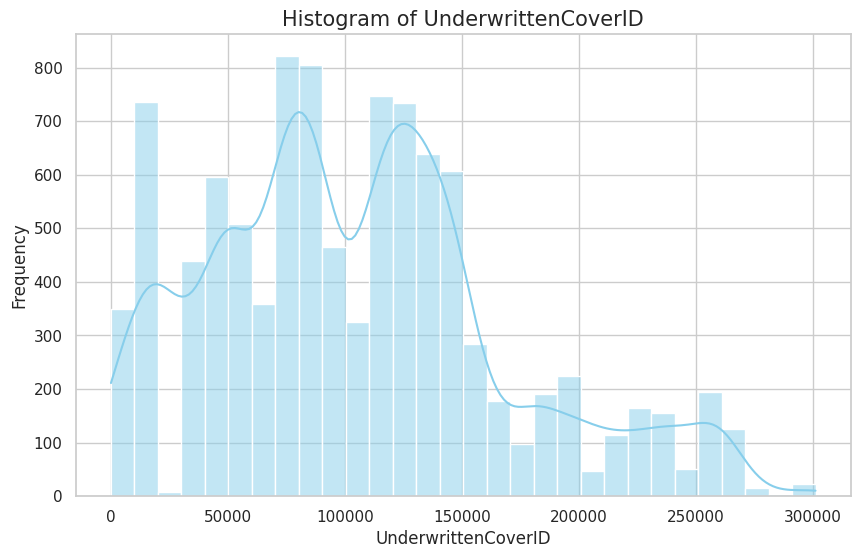

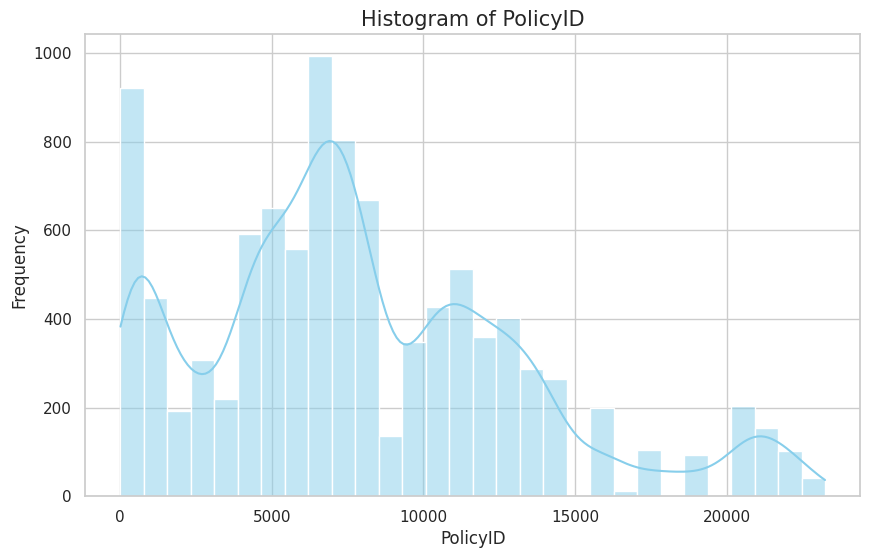

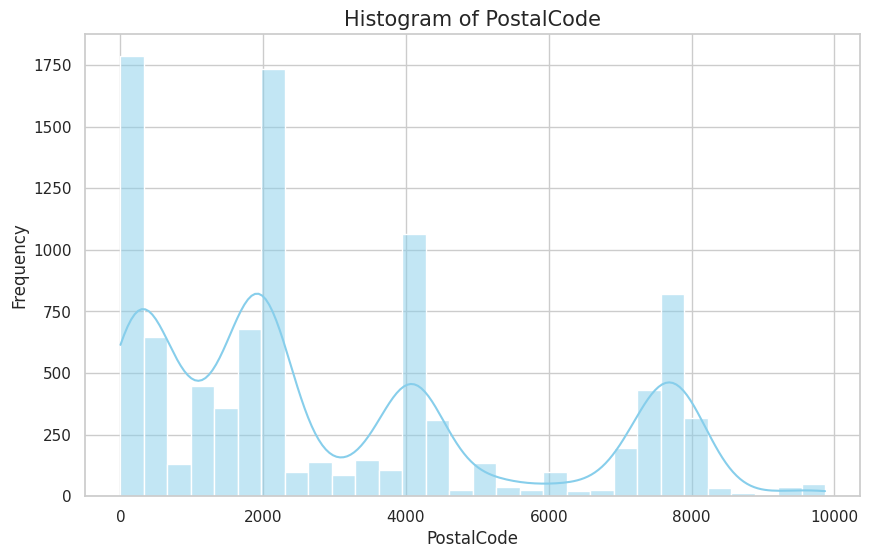

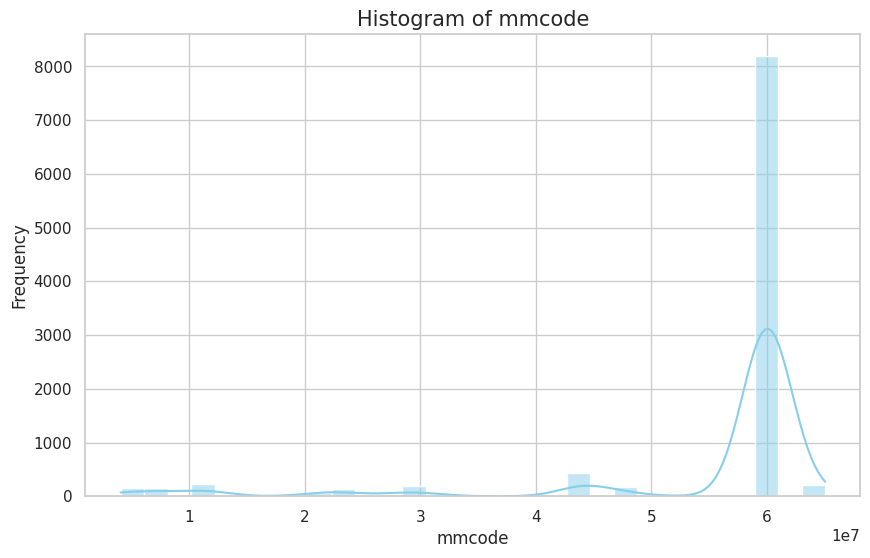

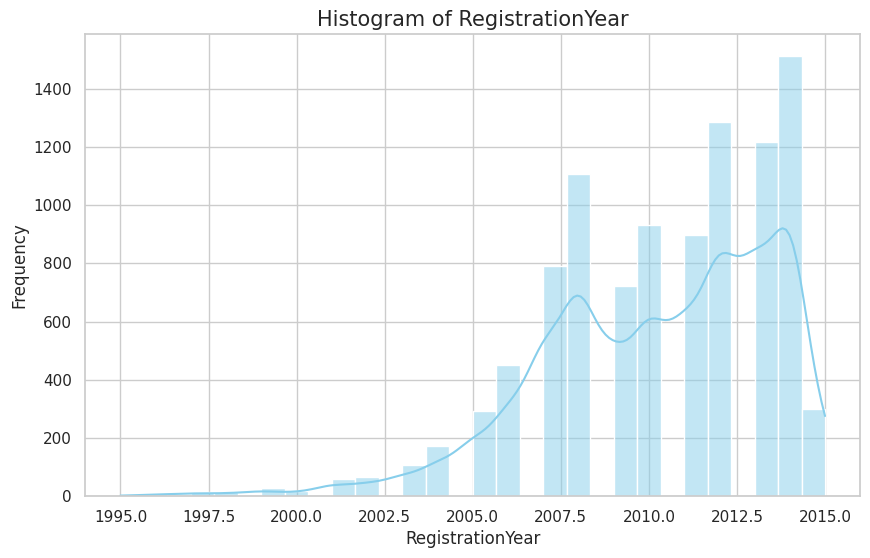

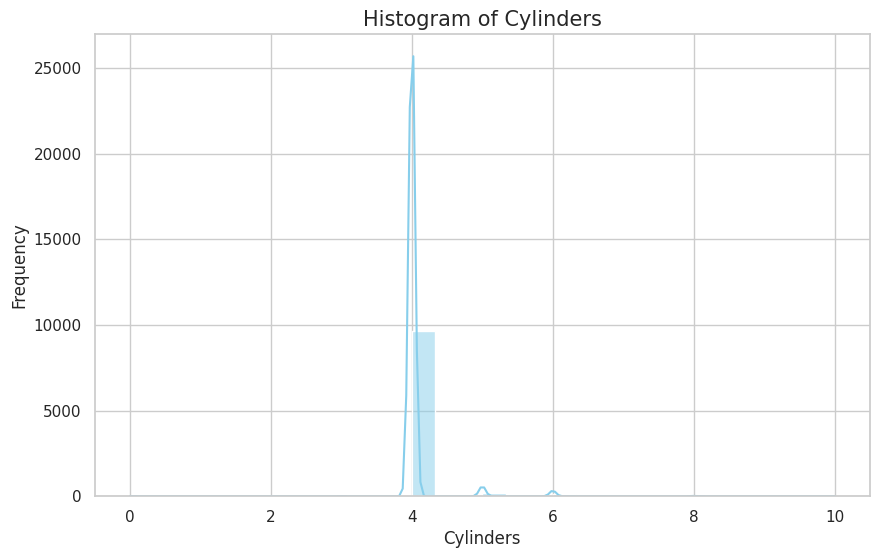

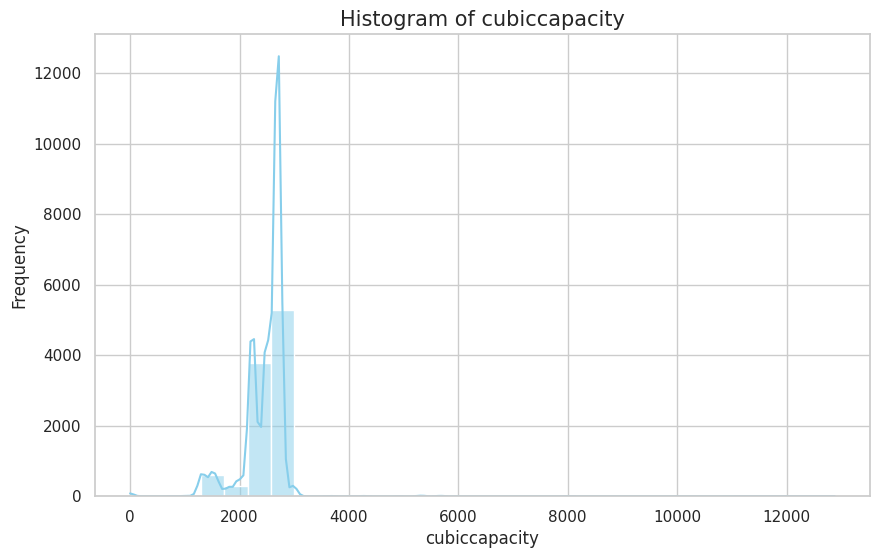

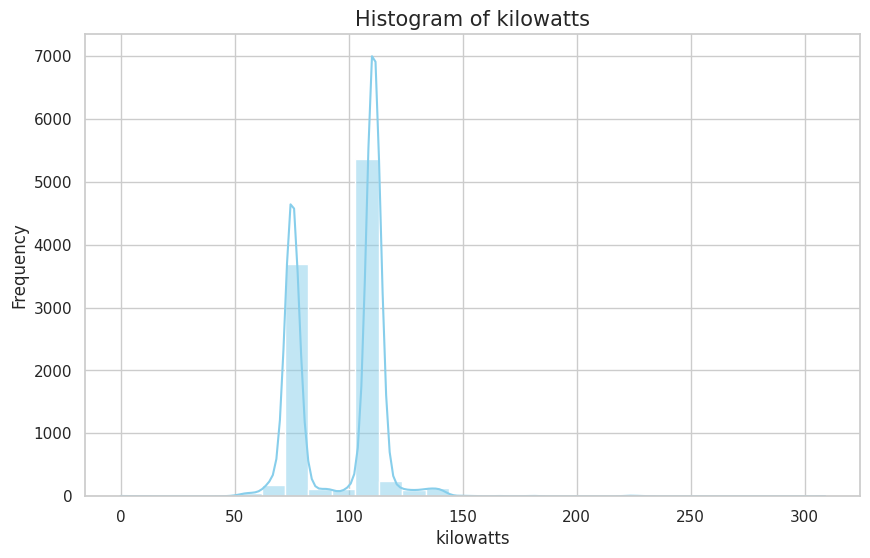

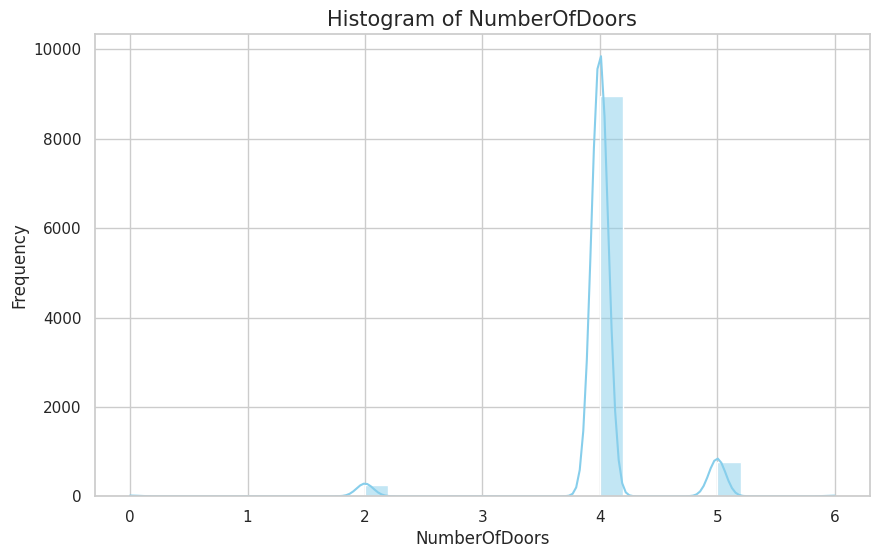

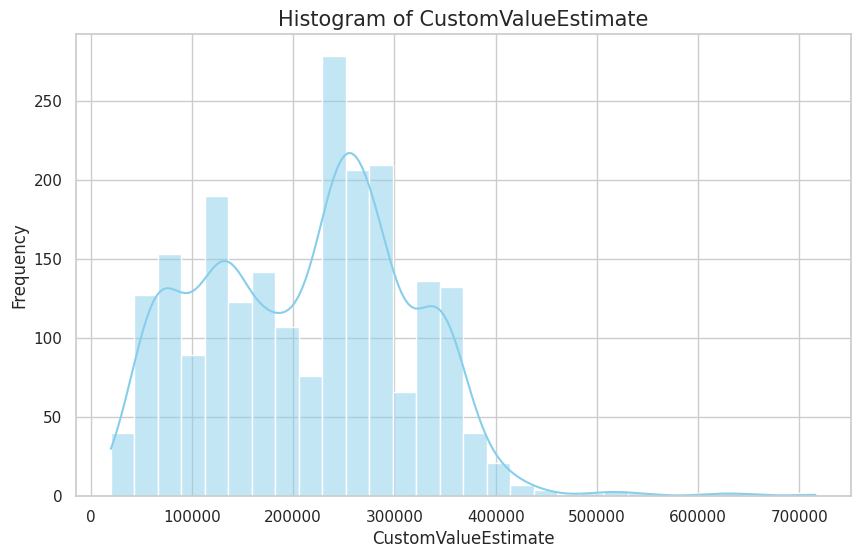

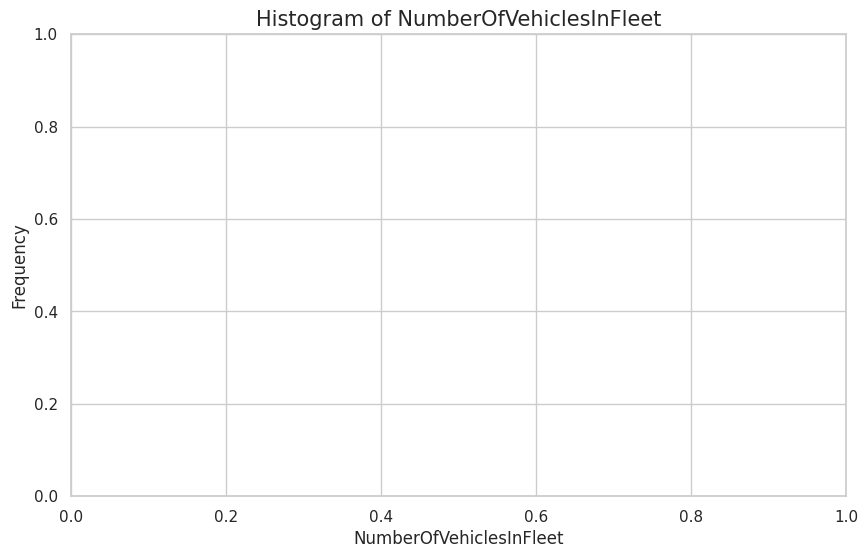

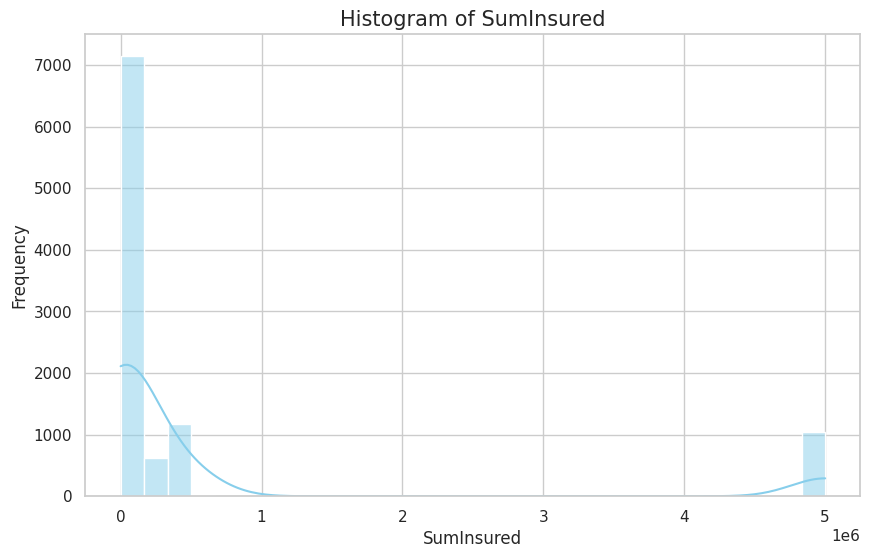

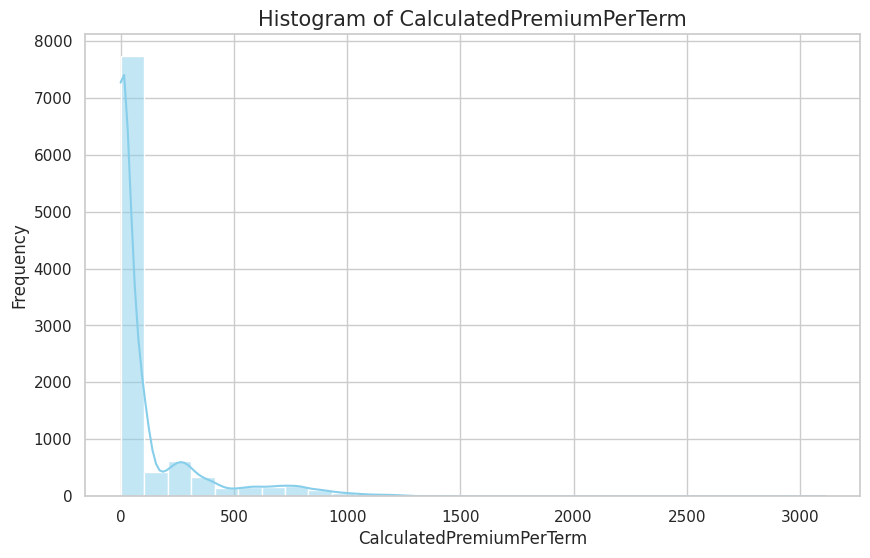

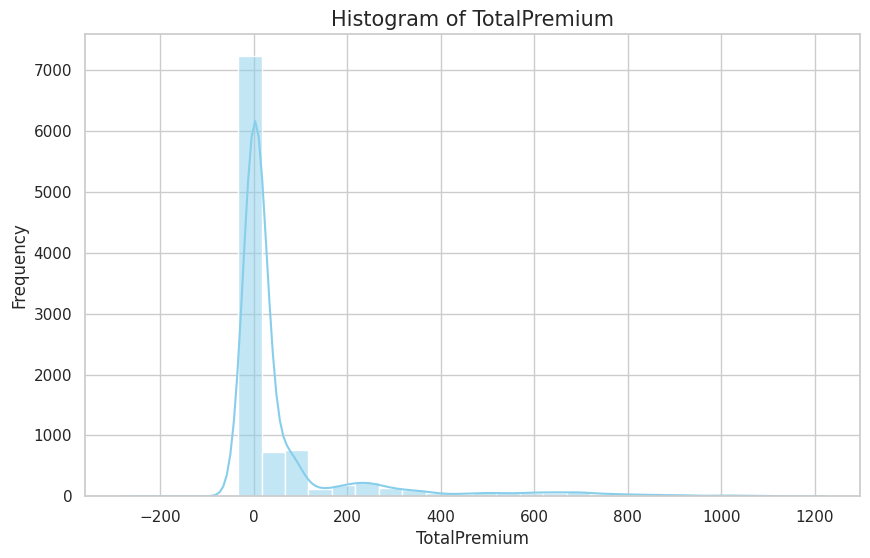

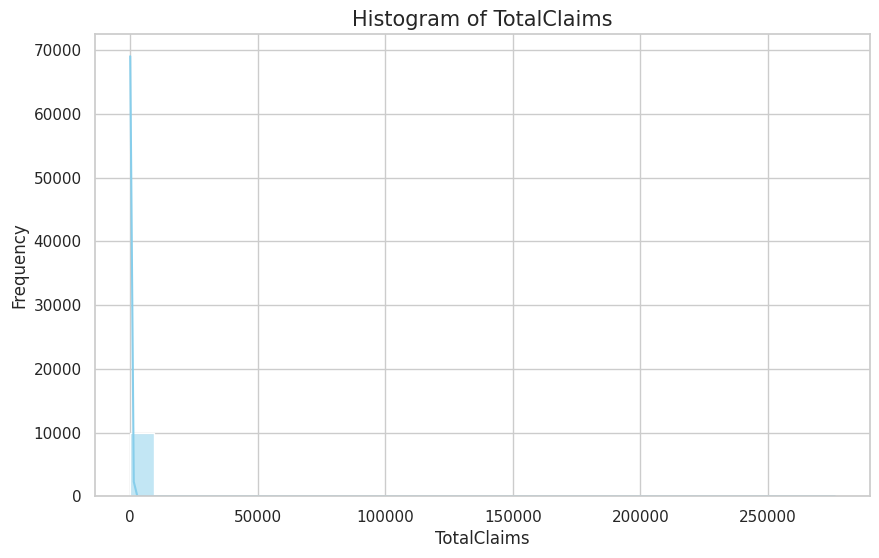

In [63]:
# Histograms for numerical columns
for col in df_sample.select_dtypes(include=['int64', 'float64']).columns:
  fig, ax = plt.subplots(figsize=(10, 6))
  # Drop NaN values before calculating the histogram
  non_nan_values = df_sample[col].dropna()
  counts, bin_edges = np.histogram(non_nan_values, bins=num_bins)
  sns.histplot(non_nan_values, bins=num_bins, kde=True, color='skyblue', ax=ax)
  # sns.histplot(df_sample[col], bins=num_bins, kde=True, color='skyblue', ax=ax)
  ax.set_title(f'Histogram of {col}', fontsize=15)
  ax.set_xlabel(col, fontsize=12)
  ax.set_ylabel('Frequency', fontsize=12)
  univariate_plots.append(fig)

  # Extract histogram data
  # counts, bin_edges = np.histogram(df_sample[col], bins=num_bins)
  univariate_data[col] = {'type': 'histogram', 'counts': counts, 'bin_edges': bin_edges}

  #plt.close(fig)  # Close the figure after adding it to the list

<ipython-input-66-ca72e64e3db5>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 6))


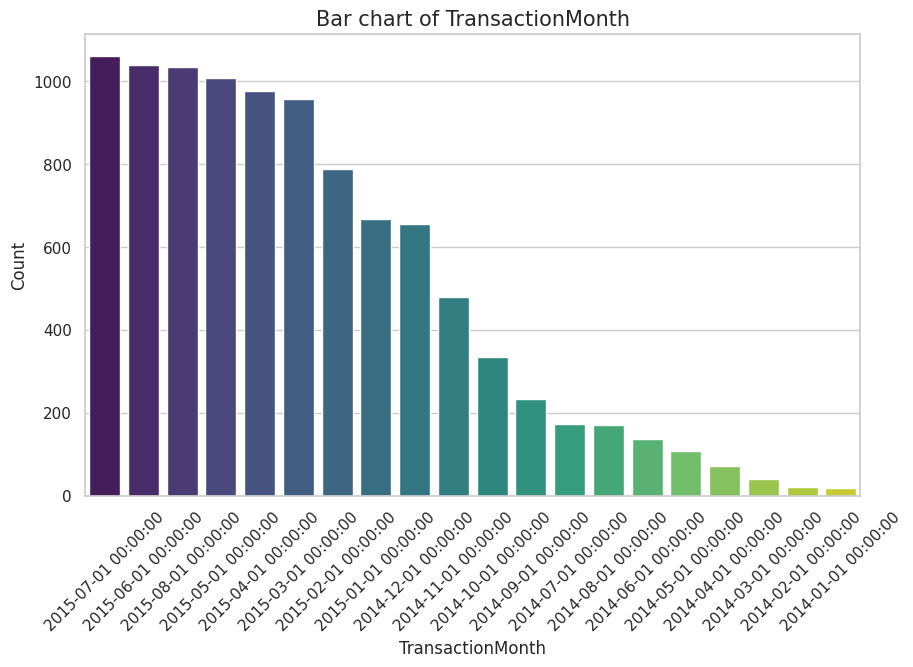

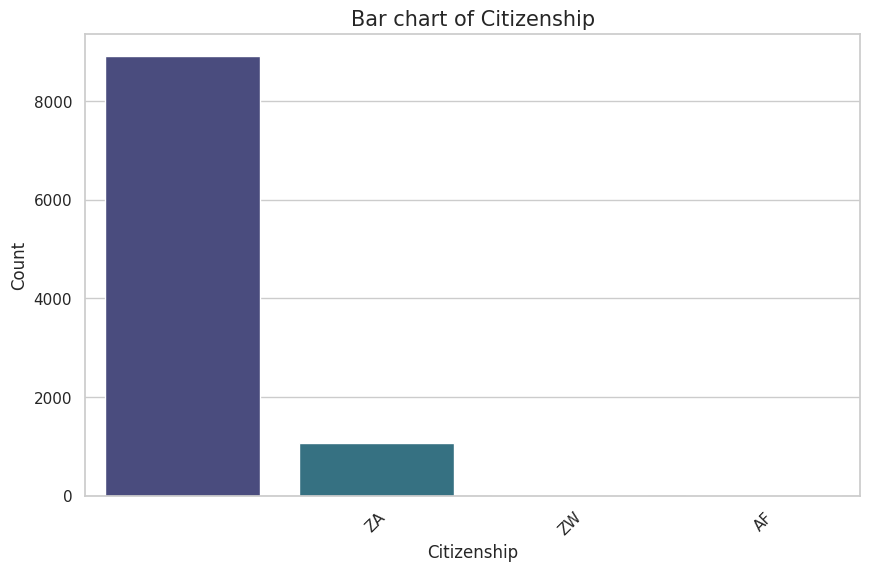

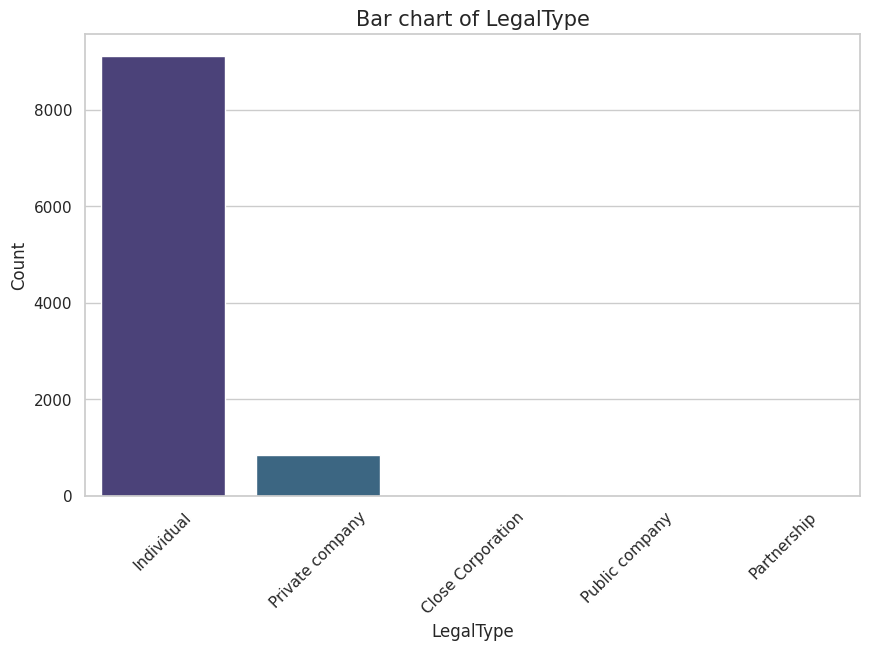

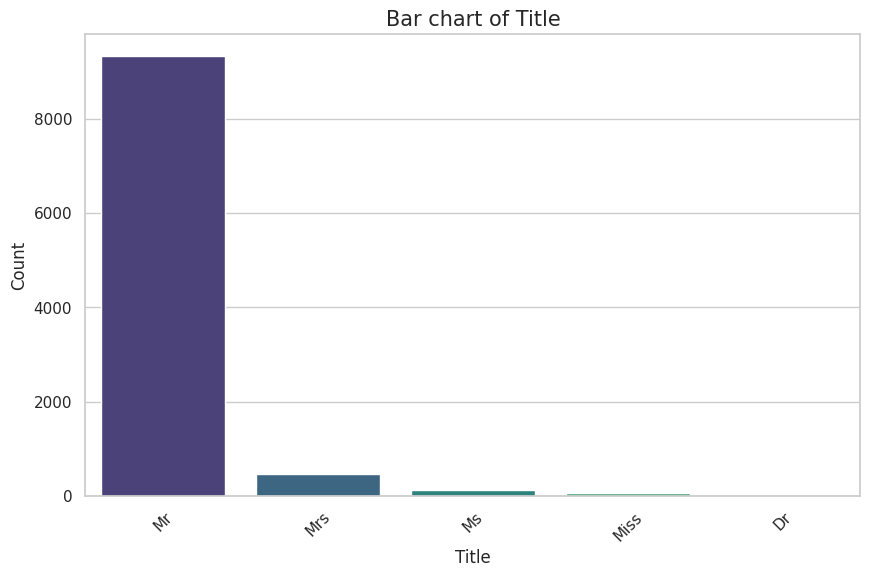

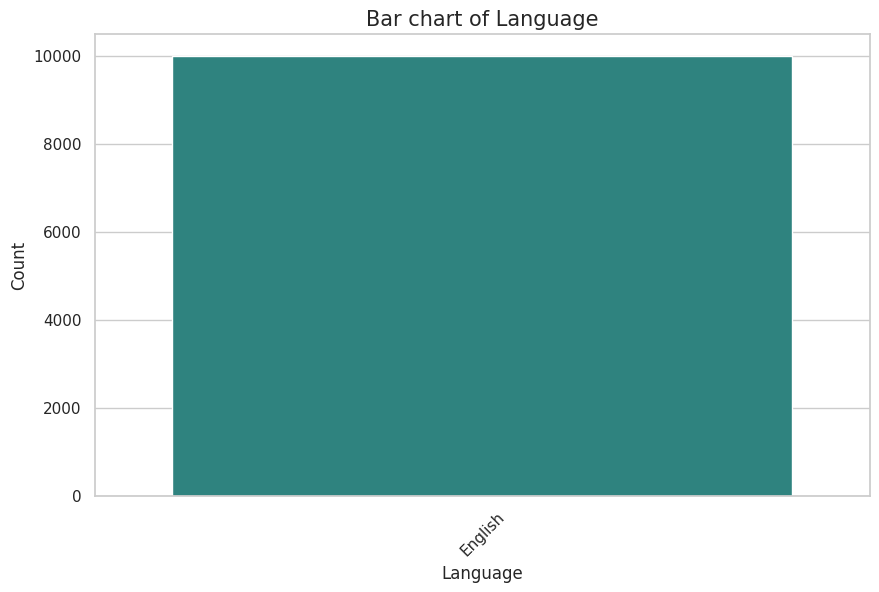

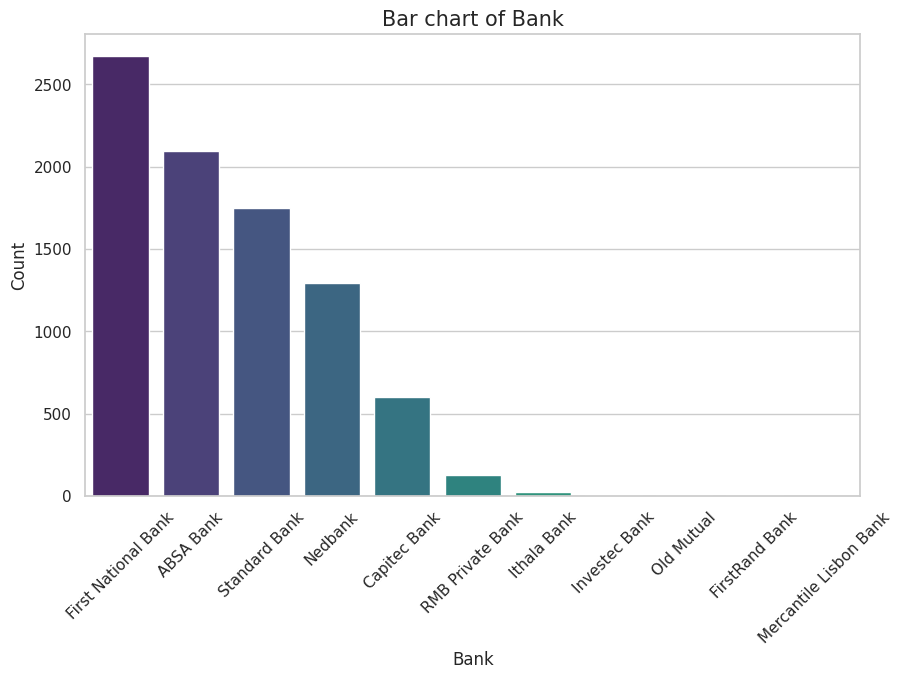

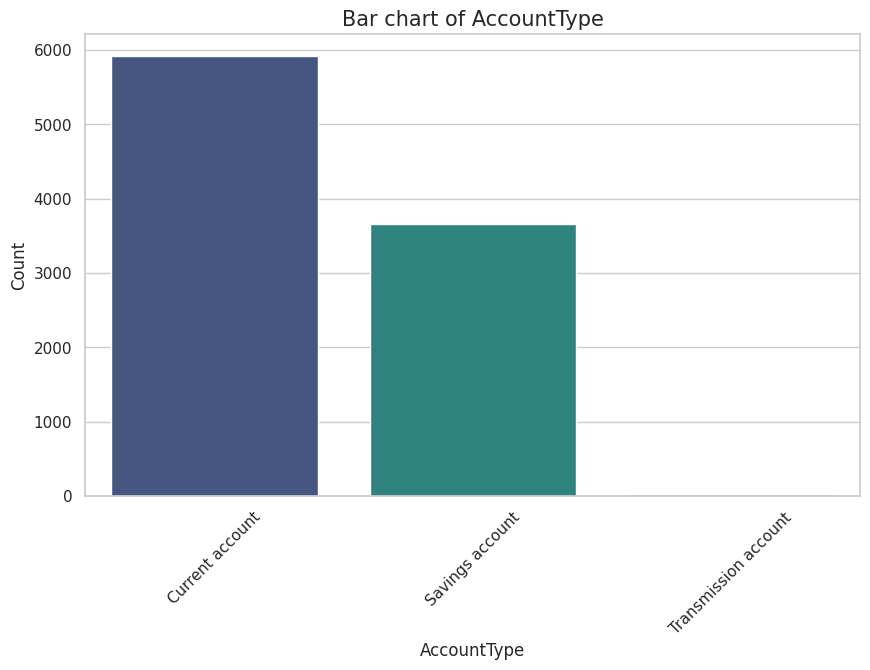

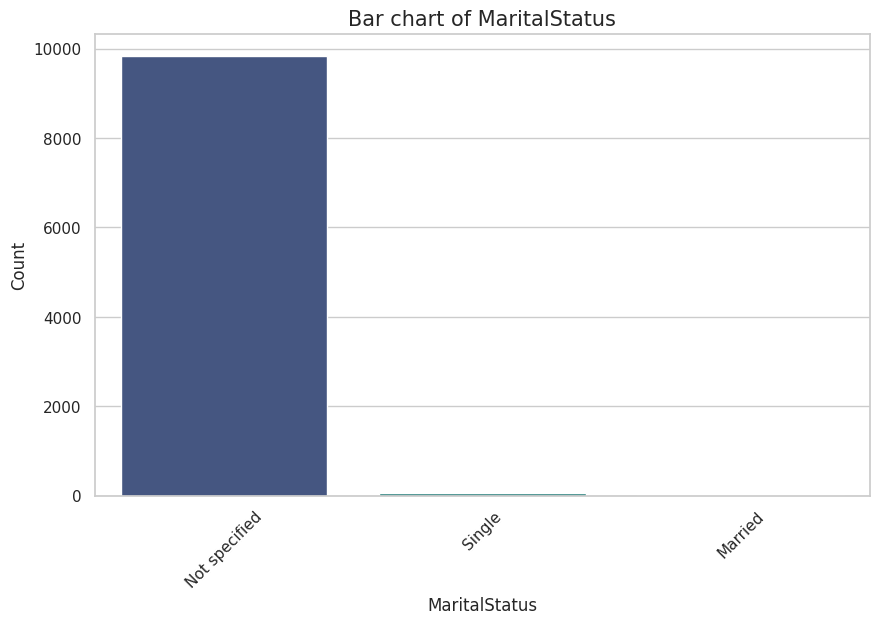

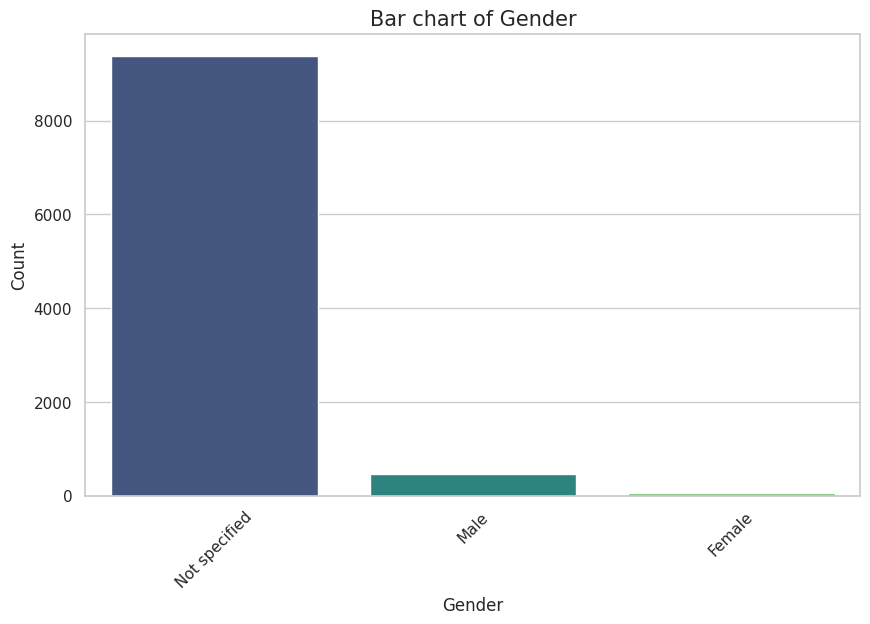

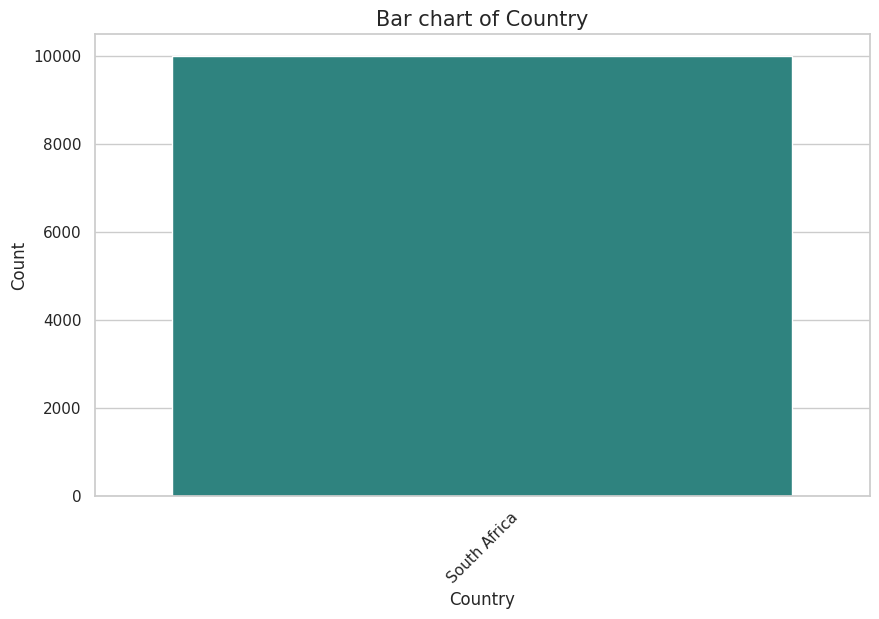

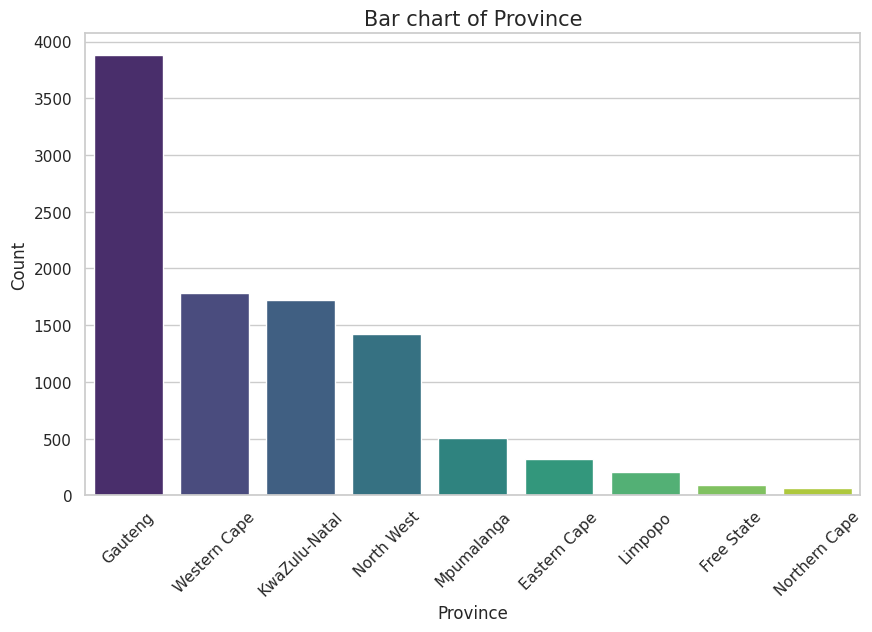

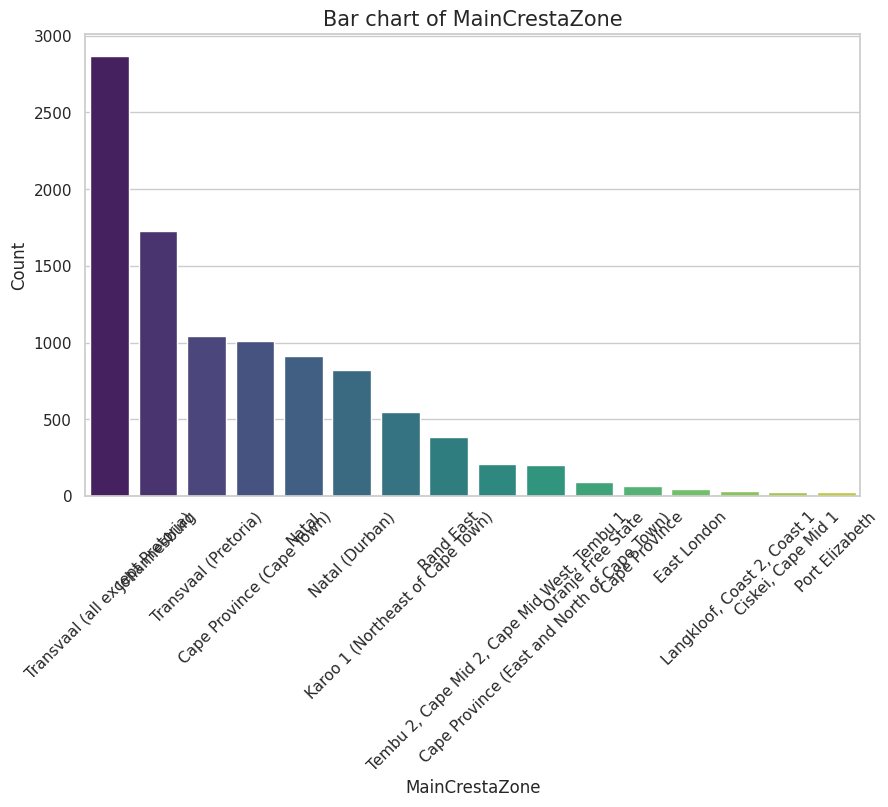

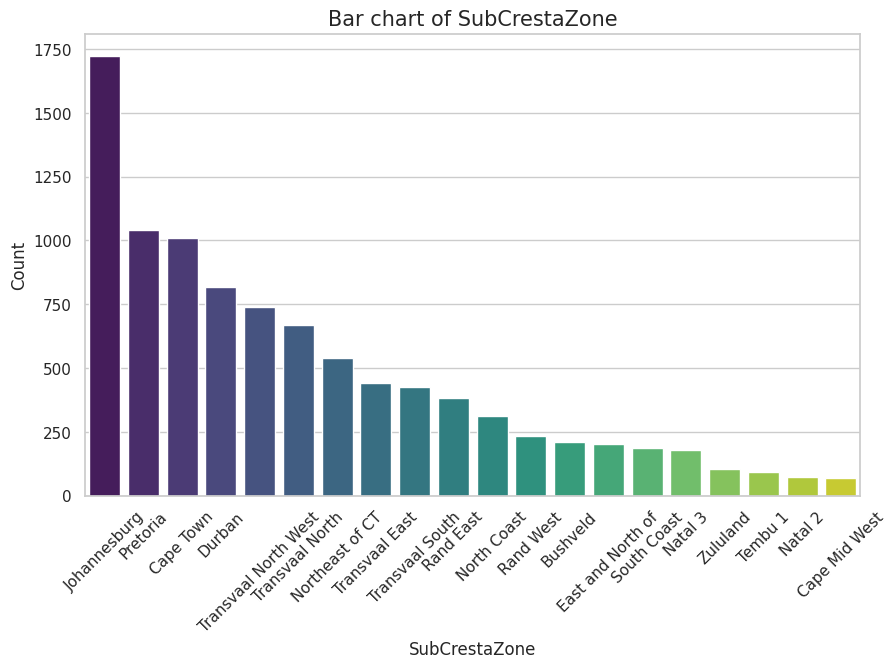

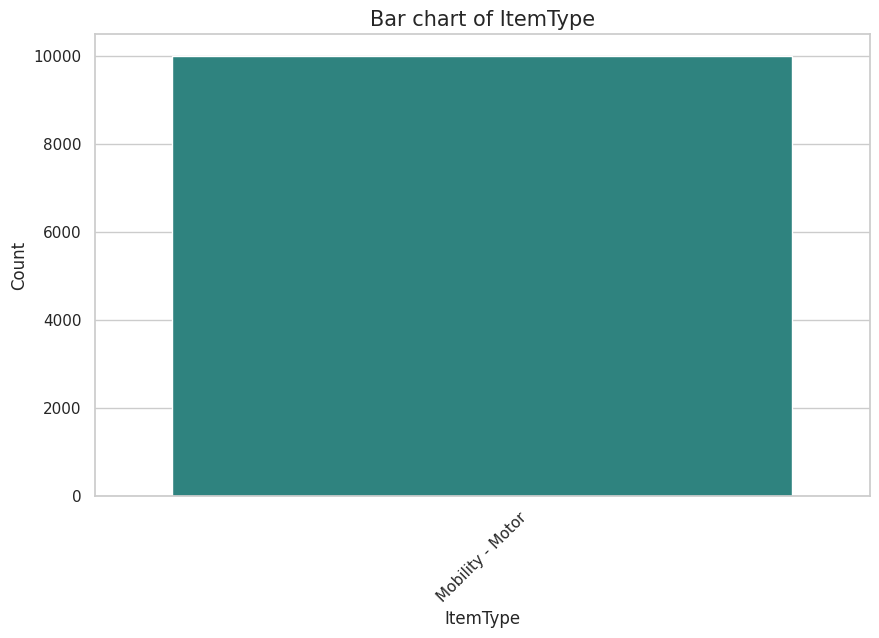

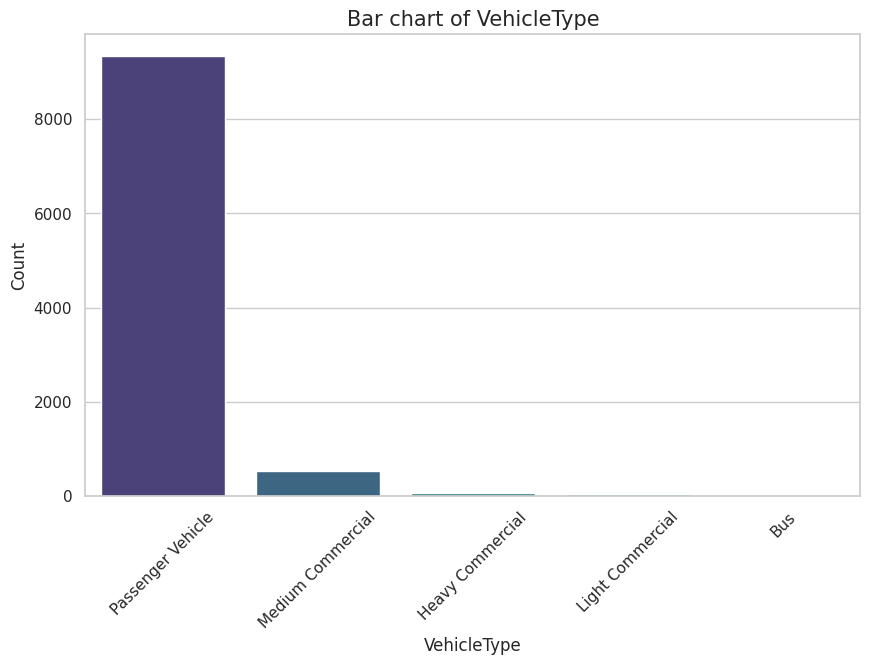

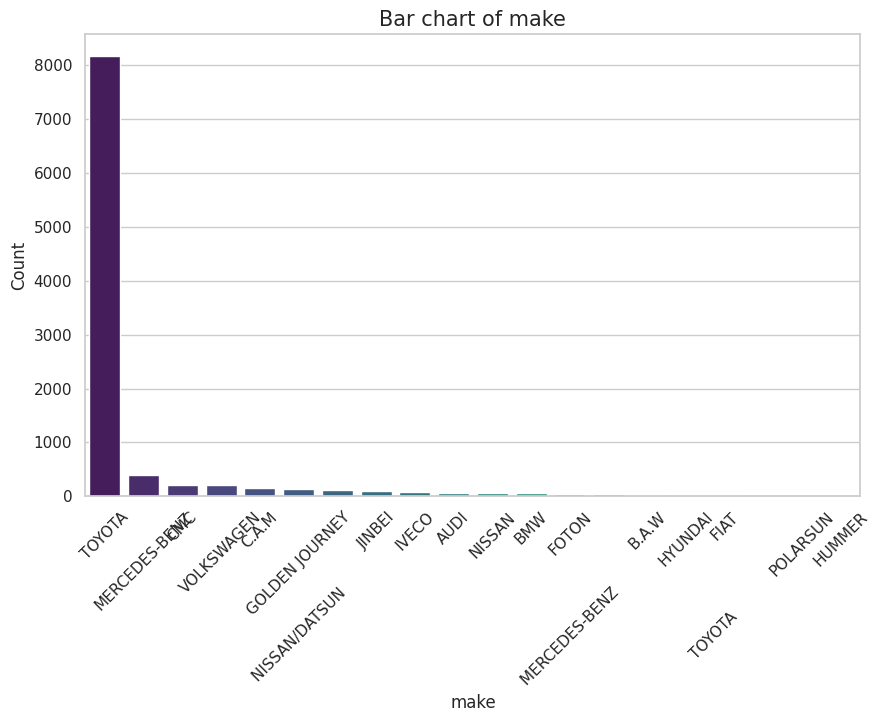

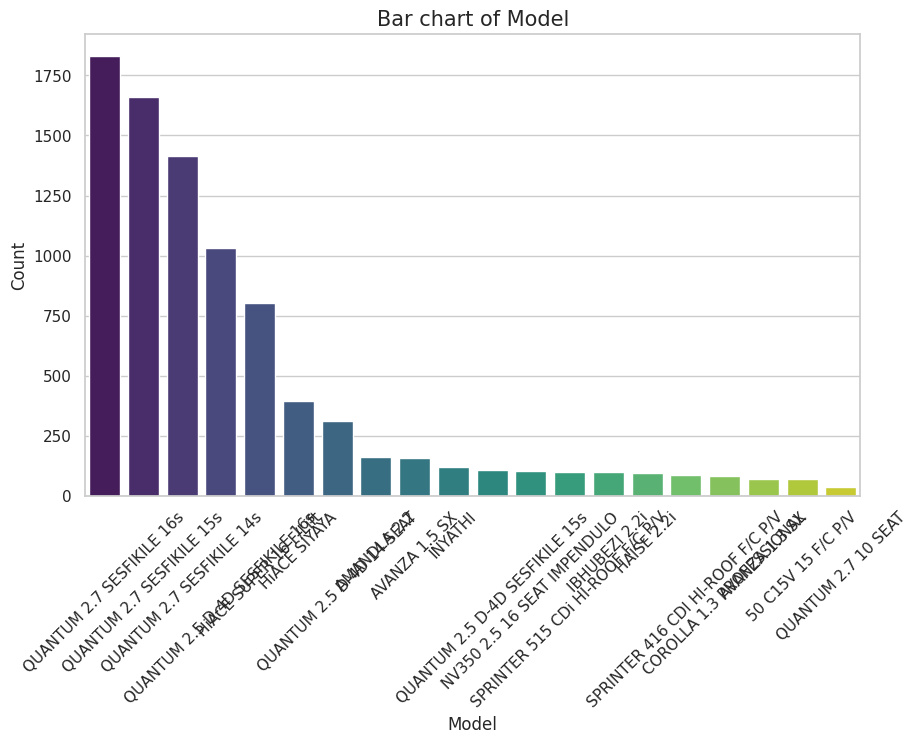

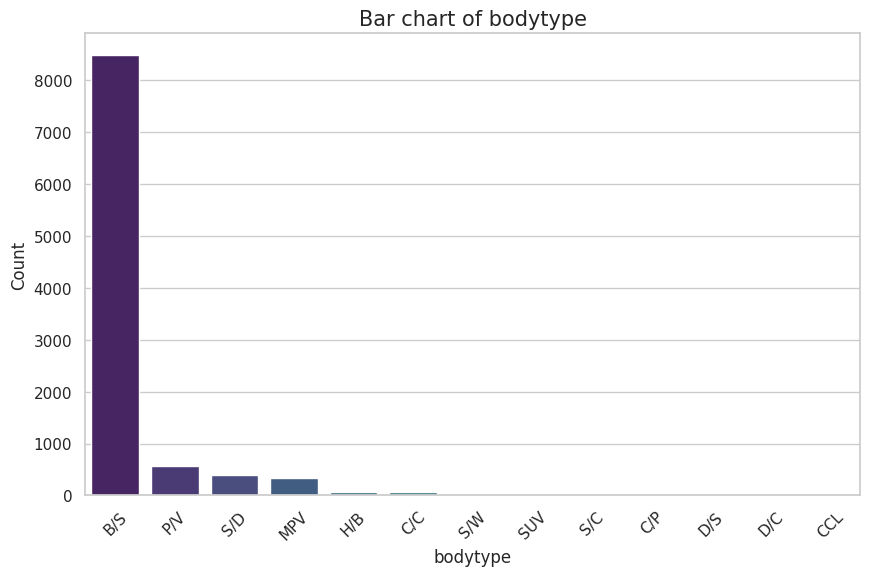

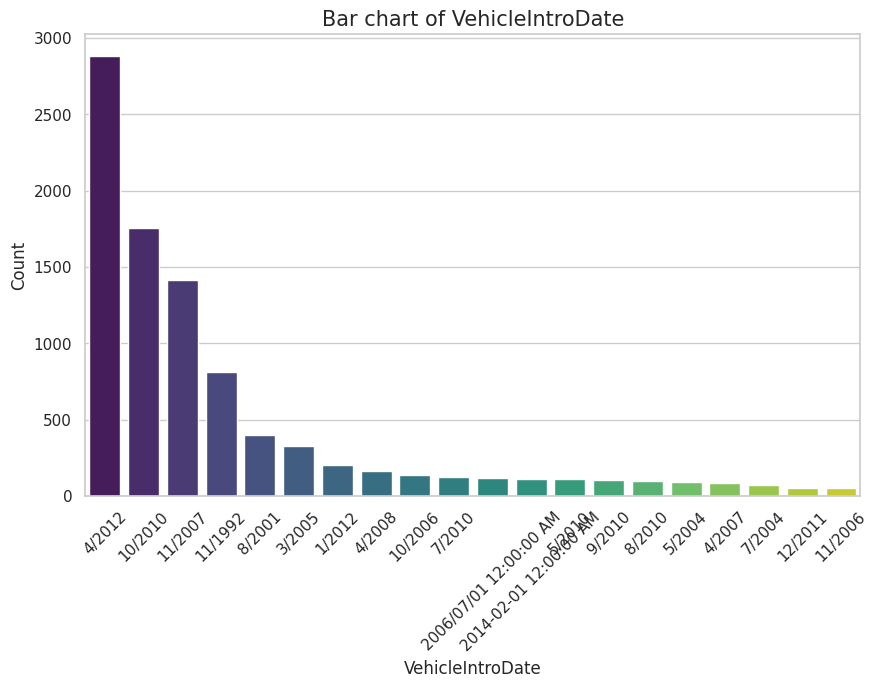

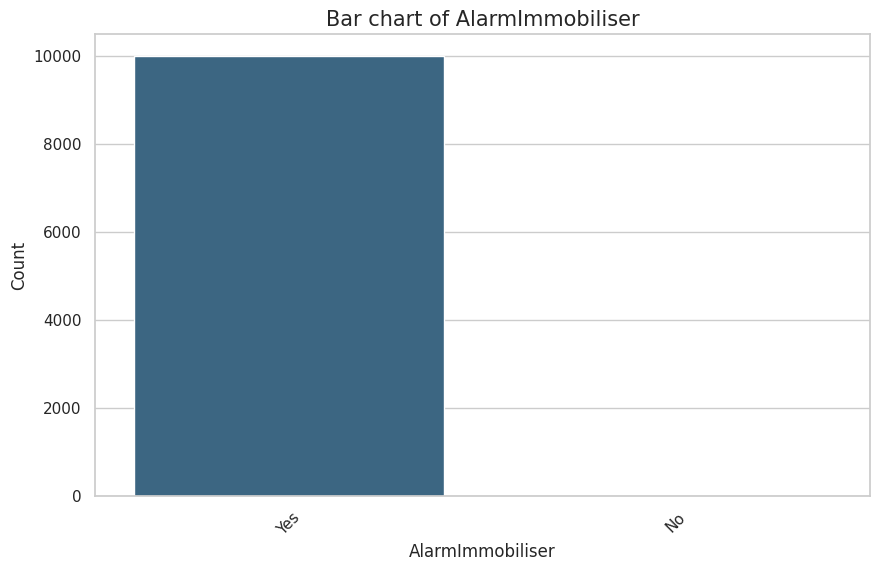

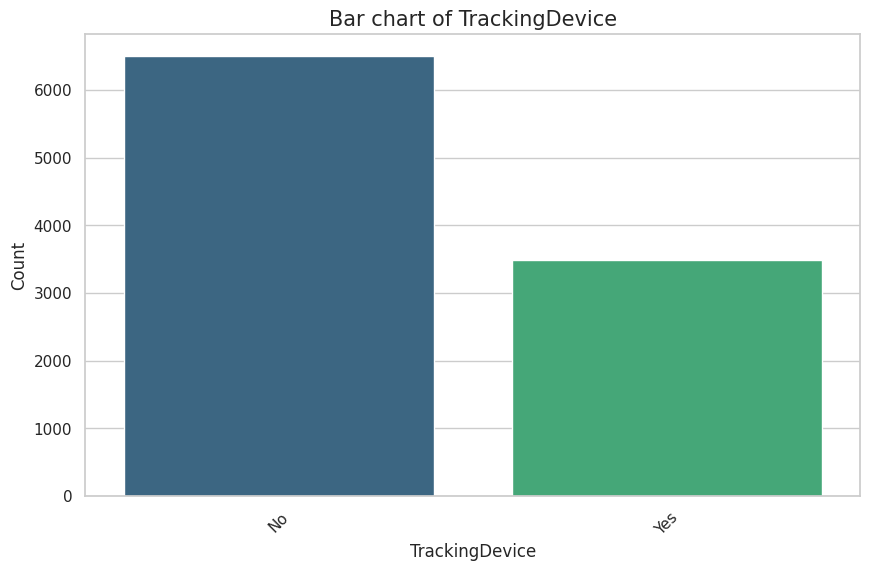

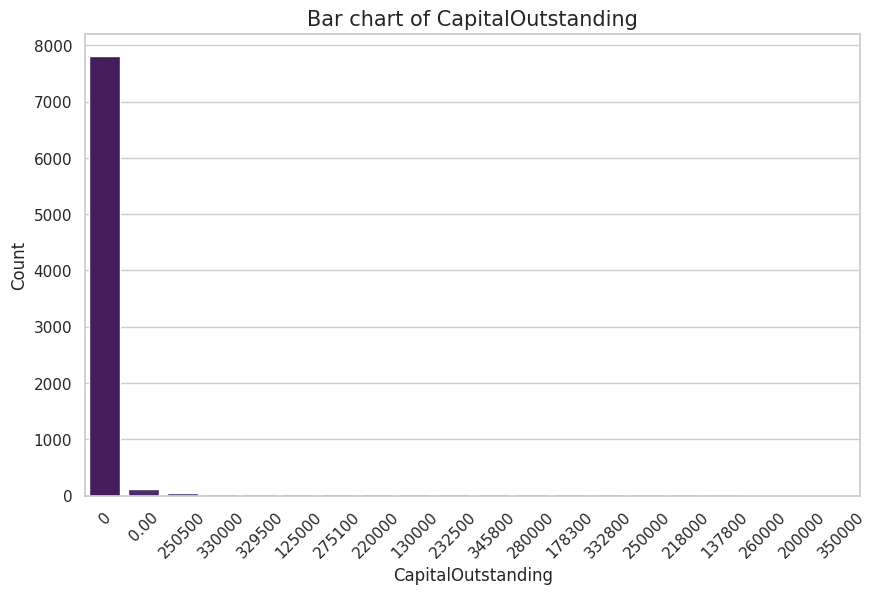

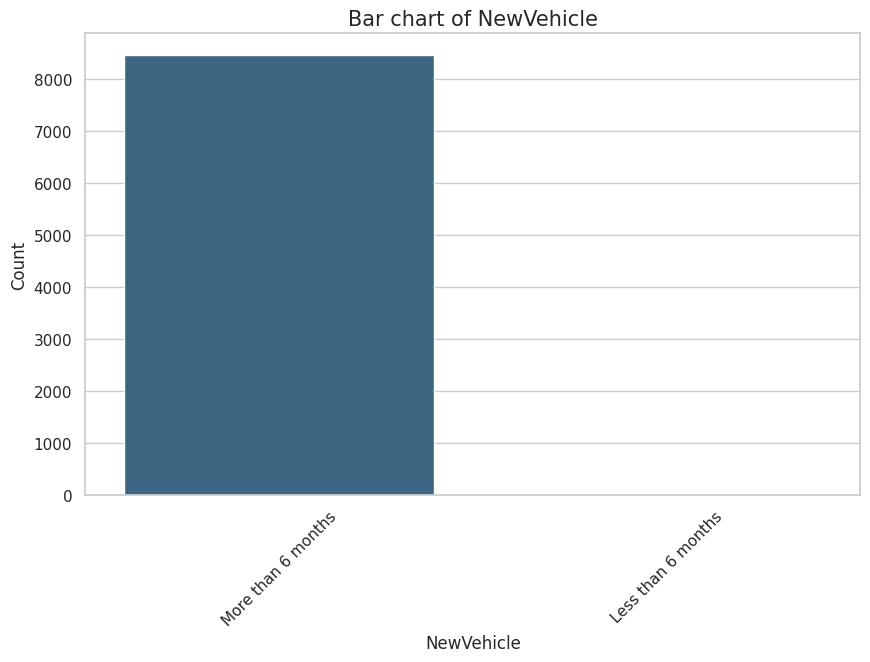

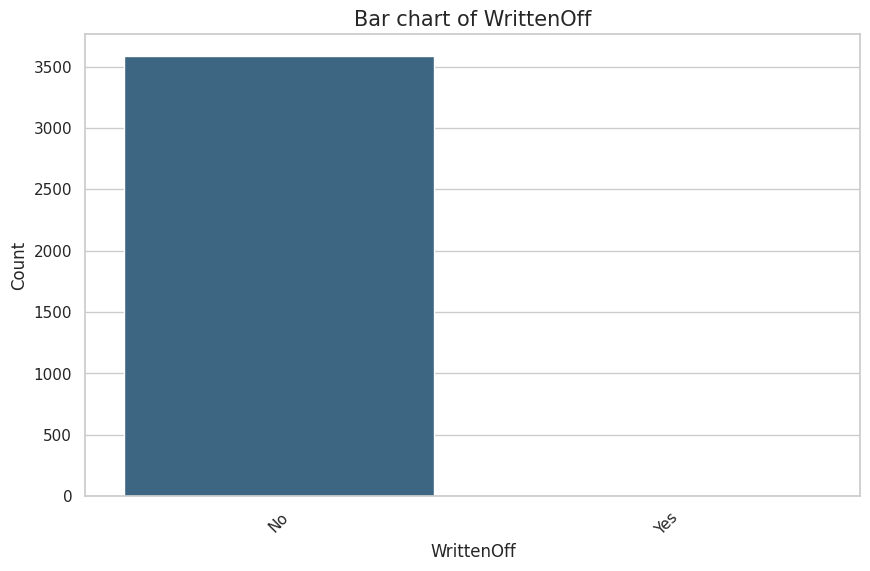

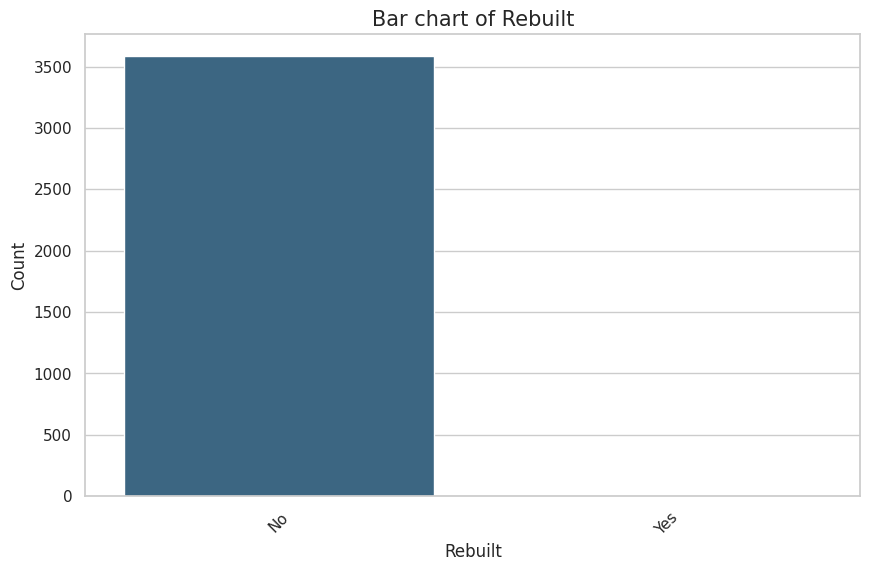

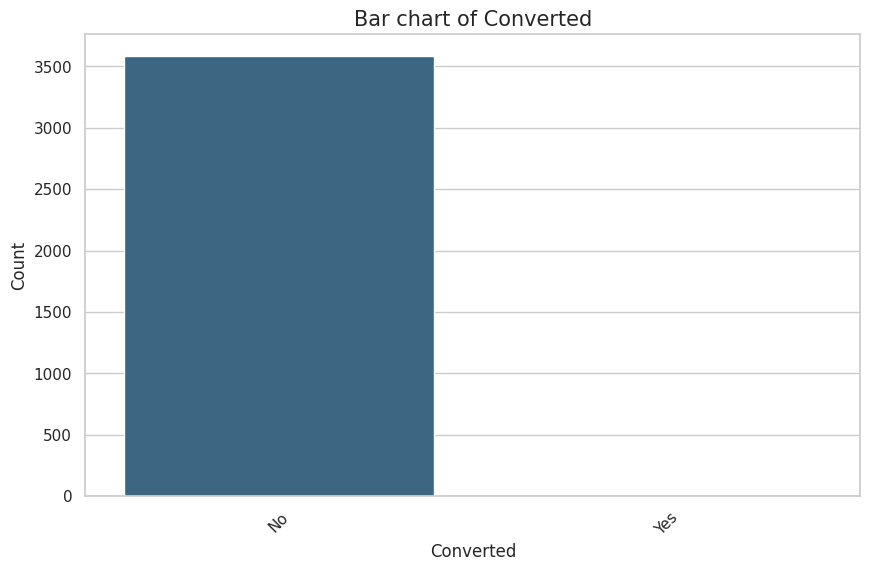

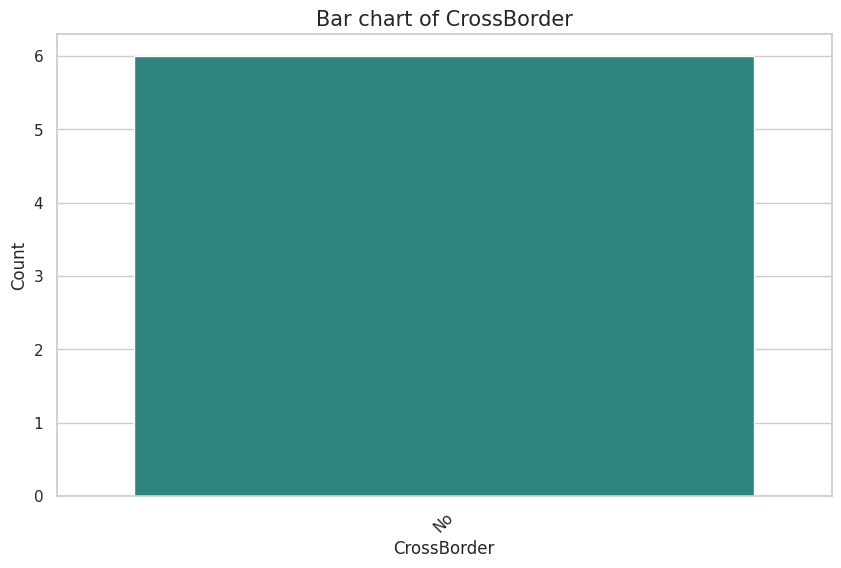

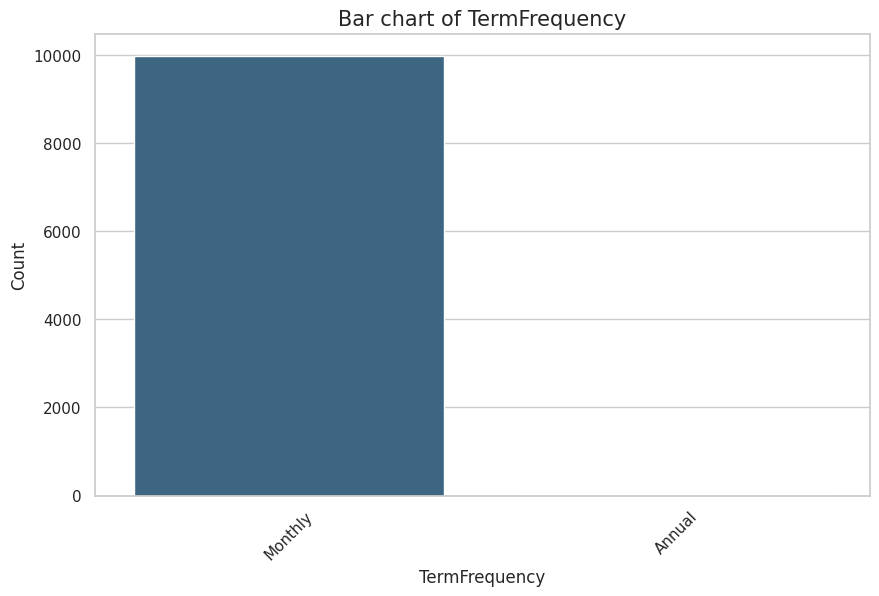

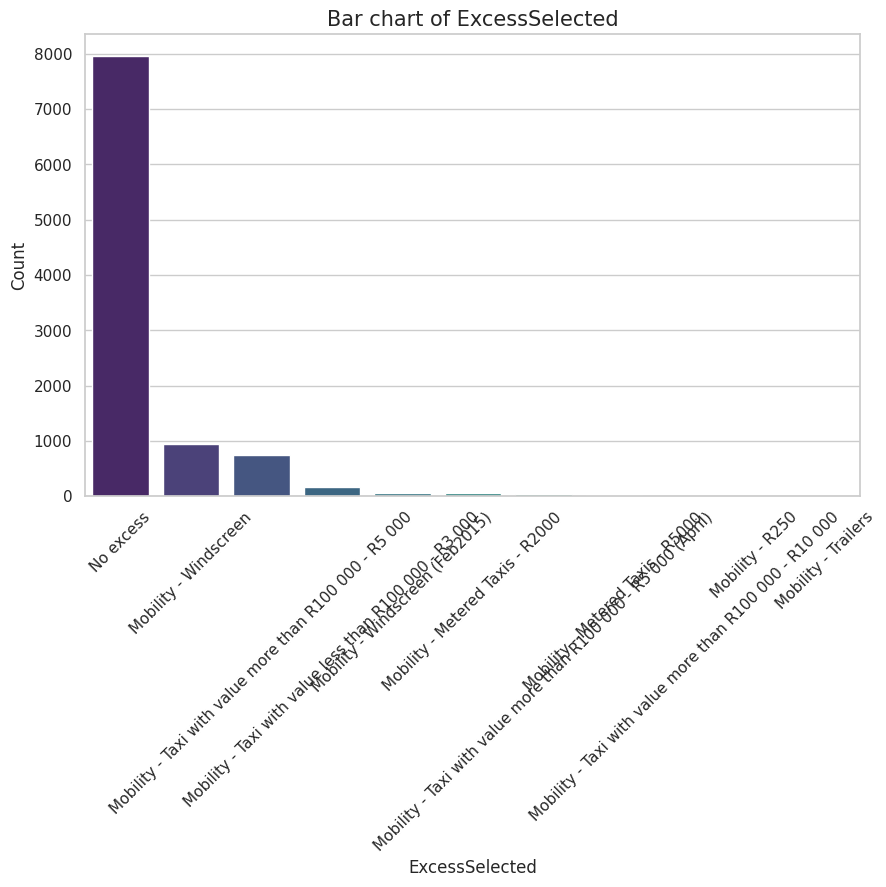

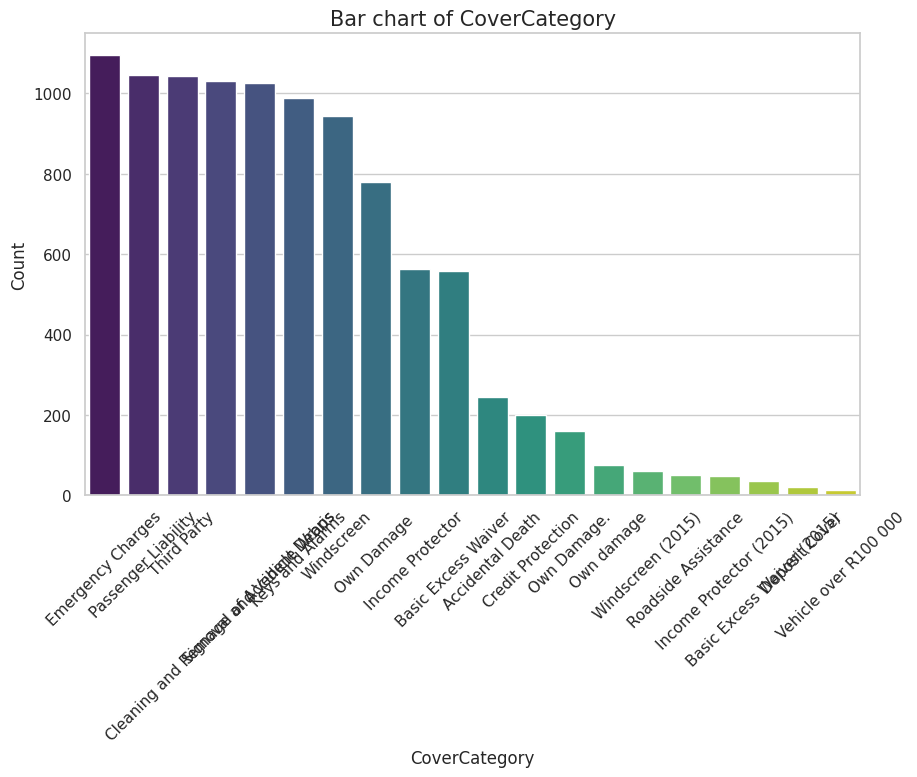

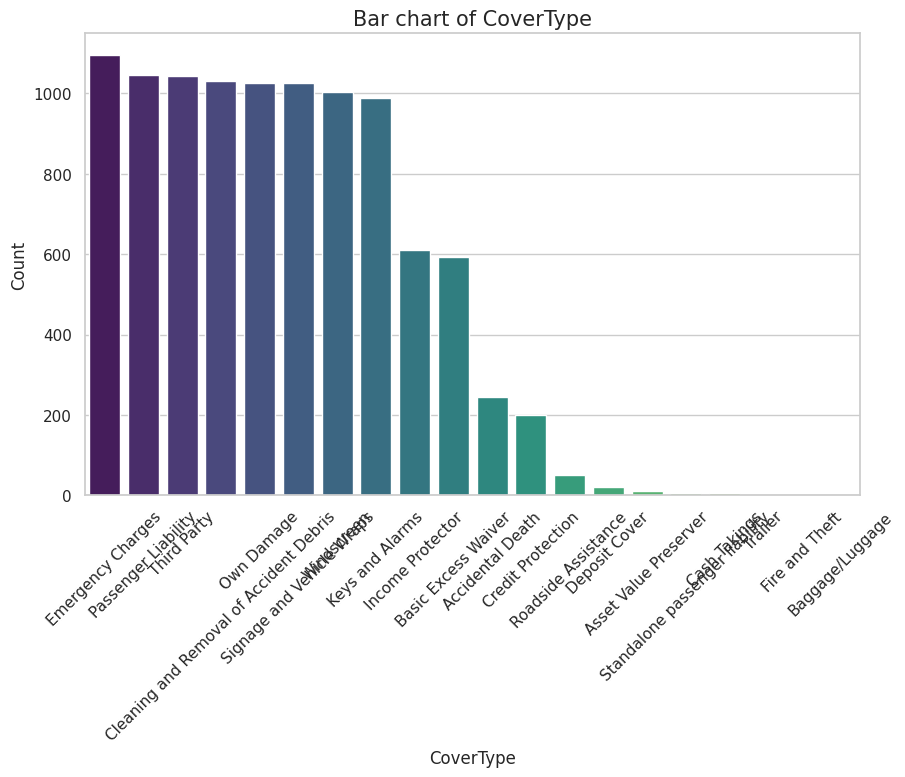

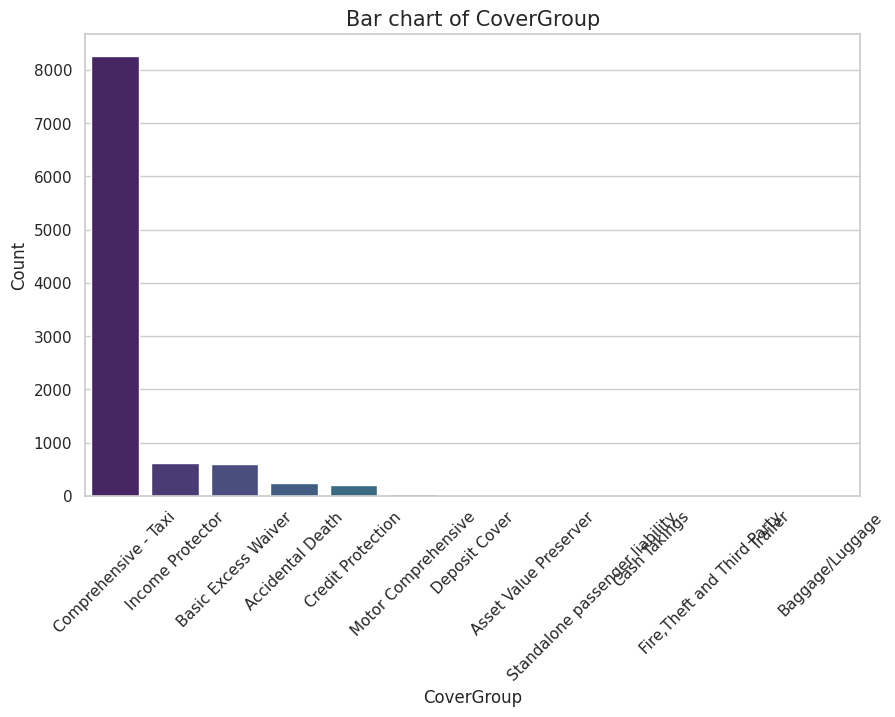

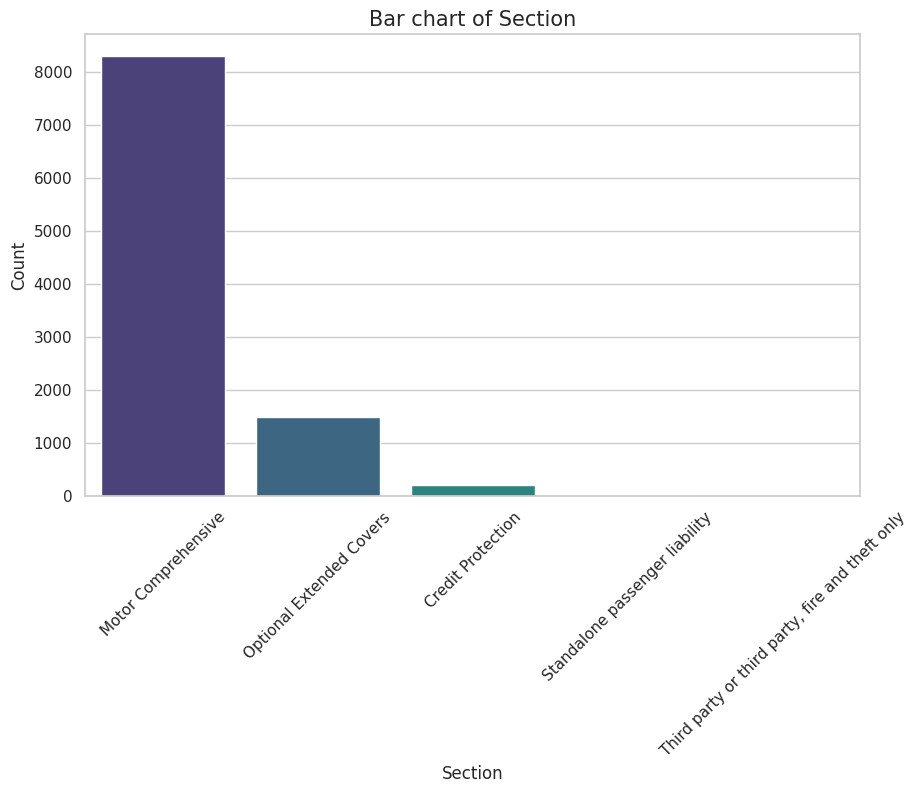

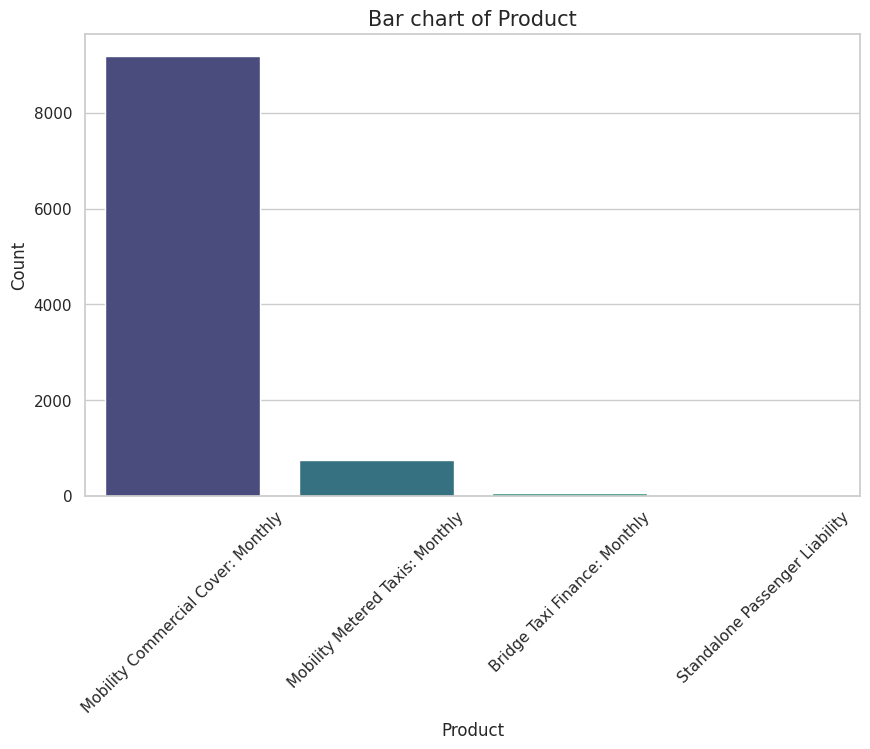

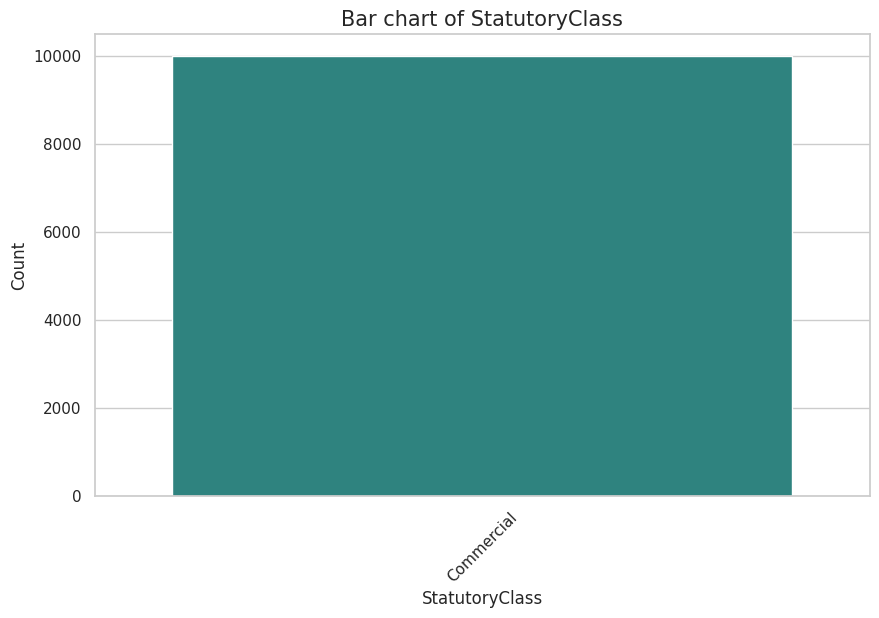

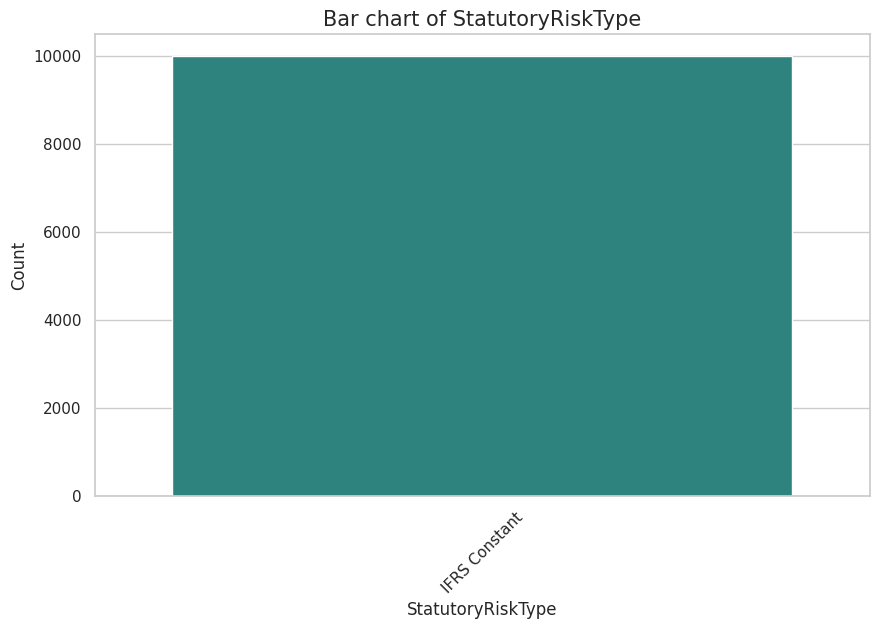

In [66]:
# Bar charts for categorical columns
for col in df_sample.select_dtypes(include=['object']).columns:
  fig, ax = plt.subplots(figsize=(10, 6))
  # Only plot top 20 most common categories to avoid clutter
  top_categories = df_sample[col].value_counts().nlargest(20)
  sns.barplot(x=top_categories.index, y=top_categories.values, hue=top_categories.index, palette='viridis', ax=ax, dodge=False, legend=False)
  ax.set_title(f'Bar chart of {col}', fontsize=15)
  ax.set_xlabel(col, fontsize=12)
  ax.set_ylabel('Count', fontsize=12)
  ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed
  univariate_plots.append(fig)

  # Extract bar chart data
  univariate_data[col] = {'type': 'bar_chart', 'categories': top_categories.index.tolist(), 'counts': top_categories.values.tolist()}

  # plt.close(fig)  # Close the figure after adding it to the list

In [ ]:
univariate_data

In [51]:
from google.colab import files

In [ ]:
# download the plots directly to local machine
for i, fig in enumerate(univariate_plots):
  fig.savefig(f'Bar_chart_cat_col_{i}.png')
  files.download(f'Bar_chart_cat_col_{i}.png')  # Download the file

Based on the univariate analysis of the provided data, several insights can be generated:

1. **UnderwrittenCoverID**: The distribution of underwritten cover IDs is right-skewed, with most covers having IDs in the range of 100,000 to 300,000. There are several peaks in the histogram, indicating clusters of covers with specific ID ranges.

2. **PolicyID**: The distribution of policy IDs is relatively uniform, with no clear pattern or clusters. Most policies have IDs in the range of 5,000 to 15,000.

3. **PostalCode**: The distribution of postal codes shows that some codes are much more common than others. There is a peak around the 2,000 to 3,000 range, indicating that certain areas have higher concentrations of insured individuals.

4. **mmcode**: The distribution of mmcodes shows several peaks, indicating that certain codes are more common than others. However, there is also a large spike at the highest end of the range, indicating that some codes are much more common than others.

5. **RegistrationYear**: The distribution of registration years shows that most vehicles were registered between 2000 and 2015. There are peaks around the years 2005, 2010, and 2015, indicating clusters of registrations in those years.

6. **Cylinders**: The distribution of the number of cylinders in vehicles is right-skewed, with most vehicles having 4 cylinders. There are very few vehicles with more than 4 cylinders.

7. **cubiccapacity**: The distribution of cubic capacities shows several peaks, indicating that certain capacities are more common than others. However, there is also a large spike at the highest end of the range, indicating that some capacities are much more common than others.

8. **kilowatts**: The distribution of kilowatts shows several peaks, indicating that certain power outputs are more common than others. However, there is also a large spike at the highest end of the range, indicating that some power outputs are much more common than others.

9. **NumberOfDoors**: The distribution of the number of doors in vehicles is right-skewed, with most vehicles having 4 doors. There are very few vehicles with more than 4 doors.

10. **CustomValueEstimate**: The distribution of custom value estimates shows that most values are between 20,000 and 150,000. There are peaks around the values of 50,000, 100,000, and 150,000, indicating clusters of values in those ranges.

11. **NumberOfVehiclesInFleet**: The distribution of the number of vehicles in fleets is highly skewed, with most fleets having fewer than 0.5 vehicles. There are very few fleets with more than 0.5 vehicles.

12. **SumInsured**: The distribution of sum insured values shows that most values are between 0 and 500,000. There are peaks around the values of 100,000, 200,000, and 300,000, indicating clusters of values in those ranges.

13. **CalculatedPremiumPerTerm**: The distribution of calculated premiums per term shows that most premiums are between 0 and 3,000. There are peaks around the values of 1,000, 2,000, and 3,000, indicating clusters of premiums in those ranges.

14. **TotalPremium**: The distribution of total premiums shows that most premiums are between 0 and 1,000. There are peaks around the values of 100, 200, and 300, indicating clusters of premiums in those ranges.

15. **TotalClaims**: The distribution of total claims shows that most claims are between 0 and 100,000. There are peaks around the values of 20,000, 40,000, and 60,000, indicating clusters of claims in those ranges.

These insights can be used to understand the distribution and characteristics of the data, which can help in making informed decisions and strategies related to insurance policies and claims.

**Bivariate or Multivariate Analysis**

Let us explore the relationships between the monthly changes in `TotalPremium` and `TotalClaims` as a function of `PostalCode`.

In [ ]:
# Ensure 'TransactionMonth' column is in datetime format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

In [ ]:
# Calculate monthly changes
df['TotalPremium_MonthlyChange'] = df.groupby('PostalCode')['TotalPremium'].diff()
df['TotalPremium_MonthlyChange']


In [ ]:
df['TotalClaims_MonthlyChange'] = df.groupby('PostalCode')['TotalClaims'].diff()
df['TotalClaims_MonthlyChange']

In [ ]:
# Remove rows with NaN values resulting from the diff operation
df.dropna(subset=['TotalPremium_MonthlyChange', 'TotalClaims_MonthlyChange'], inplace=True)

In [ ]:
# Group by PostalCode
grouped = df.groupby('PostalCode')

In [ ]:
correlation_matrix_by_postalcode = {}
scatter_plots_by_postalcode = {}
scatter_plot_data_by_postalcode = {}

In [ ]:
# Iterate over each PostalCode group
for postalcode, group in grouped:
  # Calculate the correlation matrix
  correlation_matrix = group[['TotalPremium_MonthlyChange', 'TotalClaims_MonthlyChange']].corr()
  correlation_matrix_by_postalcode[postalcode] = correlation_matrix

  # Create scatter plot
  scatter_plot = sns.scatterplot(x='TotalPremium_MonthlyChange', y='TotalClaims_MonthlyChange', data=group)
  plt.title(f'Scatter Plot of Monthly Changes in TotalPremium vs TotalClaims for PostalCode {postalcode}')
  plt.xlabel('Monthly Change in TotalPremium')
  plt.ylabel('Monthly Change in TotalClaims')
  plt.show()
  scatter_plots_by_postalcode[postalcode] = scatter_plot
  scatter_plot_data_by_postalcode[postalcode] = group[['TotalPremium_MonthlyChange', 'TotalClaims_MonthlyChange']]


In [ ]:
correlation_matrix_by_postalcode

In [ ]:
scatter_plots_by_postalcode

In [ ]:
scatter_plot_data_by_postalcode

**Random Sampling**

In [67]:
# fraction of data to sample.
sample_fraction = 0.1

In [73]:
# column to stratify by
stratify_col='PostalCode'

In [74]:
sampled_df = df.groupby(stratify_col, group_keys=False).apply(lambda x: x.sample(frac=sample_fraction))

In [76]:
sampled_df['TransactionMonth'] = pd.to_datetime(sampled_df['TransactionMonth'])

In [77]:
sampled_df['TotalPremium_MonthlyChange'] = sampled_df.groupby('PostalCode')['TotalPremium'].diff()

In [ ]:
sampled_df['TotalClaims_MonthlyChange'] = sampled_df.groupby('PostalCode')['TotalClaims'].diff()
sampled_df['TotalClaims_MonthlyChange']

In [79]:
sampled_df.dropna(subset=['TotalPremium_MonthlyChange', 'TotalClaims_MonthlyChange'], inplace=True)

In [80]:
grouped = sampled_df.groupby('PostalCode')

In [81]:
correlation_matrix_by_postalcode = {}
scatter_plot_data_by_postalcode = {}

In [16]:
for postalcode, group in grouped:
  correlation_matrix = group[['TotalPremium_MonthlyChange', 'TotalClaims_MonthlyChange']].corr()
  correlation_matrix_by_postalcode[postalcode] = correlation_matrix
  scatter_plot_data_by_postalcode[postalcode] = group[['TotalPremium_MonthlyChange', 'TotalClaims_MonthlyChange']]

In [ ]:
correlation_matrix_by_postalcode

In [ ]:
scatter_plot_data_by_postalcode

In [ ]:
for postalcode, data in scatter_plot_data_by_postalcode.items():
  scatter_plot = sns.scatterplot(x='TotalPremium_MonthlyChange', y='TotalClaims_MonthlyChange', data=data)
  plt.title(f'Scatter Plot of Monthly Changes in TotalPremium vs TotalClaims for PostalCode {postalcode}')
  plt.xlabel('Monthly Change in TotalPremium')
  plt.ylabel('Monthly Change in TotalClaims')
  plt.show()

In [85]:
sample_fraction=0.1

In [84]:
# column to stratify by
stratify_col='PostalCode'

In [86]:
sampled_df = df.groupby(stratify_col, group_keys=False).apply(lambda x: x.sample(frac=sample_fraction))

In [87]:
sampled_df['TransactionMonth'] = pd.to_datetime(sampled_df['TransactionMonth'])
sampled_df['TotalPremium_MonthlyChange'] = sampled_df.groupby('PostalCode')['TotalPremium'].diff()
sampled_df['TotalClaims_MonthlyChange'] = sampled_df.groupby('PostalCode')['TotalClaims'].diff()
sampled_df.dropna(subset=['TotalPremium_MonthlyChange', 'TotalClaims_MonthlyChange'], inplace=True)

In [88]:
grouped = sampled_df.groupby('PostalCode')

In [89]:
significant_correlations = {}
summary_statistics = []
scatter_plot_data_by_postalcode = {}

In [90]:
for postalcode, group in grouped:
  correlation_matrix = group[['TotalPremium_MonthlyChange', 'TotalClaims_MonthlyChange']].corr()
  correlation_value = correlation_matrix.loc['TotalPremium_MonthlyChange', 'TotalClaims_MonthlyChange']
  if abs(correlation_value) > 0.1:  # Filter for significant correlations
    significant_correlations[postalcode] = correlation_value
    summary_stats = group[['TotalPremium_MonthlyChange', 'TotalClaims_MonthlyChange']].describe().T
    summary_stats['PostalCode'] = postalcode
    summary_statistics.append(summary_stats)
    scatter_plot_data_by_postalcode[postalcode] = group[['TotalPremium_MonthlyChange', 'TotalClaims_MonthlyChange']]

In [91]:
summary_statistics_df = pd.concat(summary_statistics).reset_index()

In [92]:
significant_correlations

{1: 0.19727281166875435,
 6: -0.30565571939975034,
 64: 0.4132211571935427,
 81: 0.4057905594408876,
 122: 0.1341405779974184,
 125: 0.2750422599288914,
 157: 0.2458335011841648,
 177: 0.41448358737832713,
 183: 0.30323262884823193,
 190: 0.14854647205646704,
 200: 0.3736746576808743,
 277: 0.4342597172563076,
 299: 0.11260031726738687,
 307: -0.164675519812527,
 360: 0.16955881135144119,
 402: 0.21715870940898682,
 407: 0.21650523762630733,
 430: 0.3357778713077445,
 456: 0.13259388315372234,
 458: 0.10405929043269437,
 470: 0.2028076746280757,
 474: 0.21203608333468948,
 510: 0.47716518645435807,
 700: 0.5068316523692327,
 1024: 0.4828254979328736,
 1057: 0.24186658001595776,
 1085: 0.11735033061759212,
 1401: 0.44647070684653534,
 1431: 0.29420363944288846,
 1454: 0.684013409581104,
 1458: 0.14380401118239924,
 1460: 0.3532381159457751,
 1640: 0.19021966851887856,
 1682: 0.36424232506397664,
 1759: -0.11975427738355789,
 1803: -0.24988929182159897,
 1813: 0.27494760620836184,
 1829:

In [93]:
summary_statistics_df

index   count       mean           std  \
0    TotalPremium_MonthlyChange   533.0  -0.139890    219.635258   
1     TotalClaims_MonthlyChange   533.0   0.000000   8304.648666   
2    TotalPremium_MonthlyChange    43.0  14.836422    212.076295   
3     TotalClaims_MonthlyChange    43.0   0.000000     66.996721   
4    TotalPremium_MonthlyChange    30.0   7.706564    281.732019   
..                          ...     ...        ...           ...   
171   TotalClaims_MonthlyChange  1178.0   0.000000   6844.707101   
172  TotalPremium_MonthlyChange   181.0  -0.005422    141.682243   
173   TotalClaims_MonthlyChange   181.0   0.000000   2781.602306   
174  TotalPremium_MonthlyChange     5.0   7.017544    535.087357   
175   TotalClaims_MonthlyChange     5.0   0.000000  31633.724422   

               min         25%        50%         75%            max  \
0      -999.463860   -6.527105   0.000000    6.500965    1001.976930   
1   -127797.631579    0.000000   0.000000    0.000000  127797.631579   
2      -563.179649  -14.232325   0.000000   14.232325     616.036316   
3      -307.017544    0.000000   0.000000    0.000000     307.017544   
4      -621.421579  -74.077785  -2.175702  166.785526     635.035351   
..             ...         ...        ...         ...            ...   
171 -166006.859649    0.000000   0.000000    0.000000  166006.859649   
172    -541.501140  -21.929825   0.000000   21.929825     510.799386   
173  -26388.596491    0.000000   0.000000    0.000000   26388.596491   
174    -517.608772 -513.222807 -38.864386  517.608772     587.174912   
175  -44736.842105    0.000000   0.000000    0.000000   44736.842105   

     PostalCode  
0             1  
1             1  
2             6  
3             6  
4            64  
..          ...  
171        8000  
172        9300  
173        9300  
174        9323  
175        9323  

[176 rows x 10 columns]

In [94]:
scatter_plot_data_by_postalcode

{1:         TotalPremium_MonthlyChange  TotalClaims_MonthlyChange
 290487                    0.000000                        0.0
 609231                  -74.561404                        0.0
 454622                    0.000000                        0.0
 624019                    0.000000                        0.0
 807377                    0.000000                        0.0
 ...                            ...                        ...
 548137                   52.631579                        0.0
 521243                  -74.561404                        0.0
 115917                    6.265088                        0.0
 529382                   -6.265088                        0.0
 943033                    0.000000                        0.0
 
 [533 rows x 2 columns],
 6:         TotalPremium_MonthlyChange  TotalClaims_MonthlyChange
 420665                    0.000000                   0.000000
 453923                    0.000000                   0.000000
 429049               

In [95]:
# Filter scatter plot data to include only significant postal codes
significant_postalcodes = significant_correlations.keys()

In [96]:
significant_postalcodes

dict_keys([1, 6, 64, 81, 122, 125, 157, 177, 183, 190, 200, 277, 299, 307, 360, 402, 407, 430, 456, 458, 470, 474, 510, 700, 1024, 1057, 1085, 1401, 1431, 1454, 1458, 1460, 1640, 1682, 1759, 1803, 1813, 1829, 1834, 1863, 1874, 2000, 2010, 2143, 2170, 2410, 3170, 3610, 3624, 3630, 3651, 3934, 4000, 4001, 4004, 4037, 4051, 4058, 4059, 4061, 4065, 4068, 4071, 4091, 4092, 4093, 4105, 4126, 4144, 4171, 4359, 4360, 4449, 5380, 6835, 7100, 7133, 7140, 7441, 7455, 7751, 7764, 7783, 7800, 7802, 8000, 9300, 9323])

In [97]:
scatter_plot_data_for_signigicant_postalcodes = []

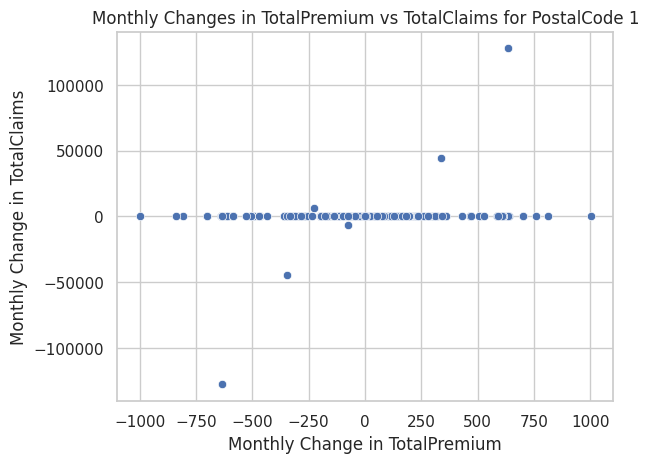

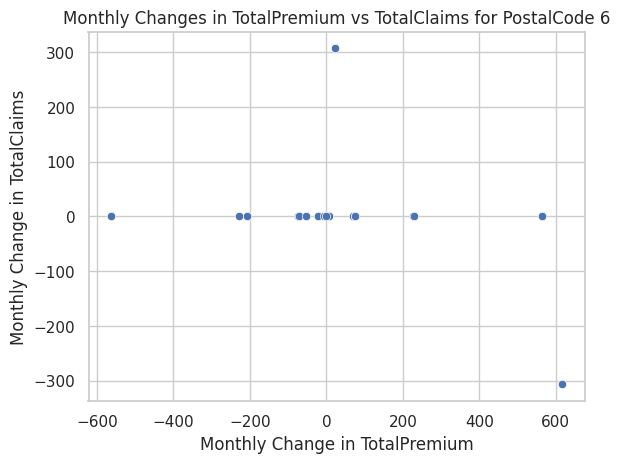

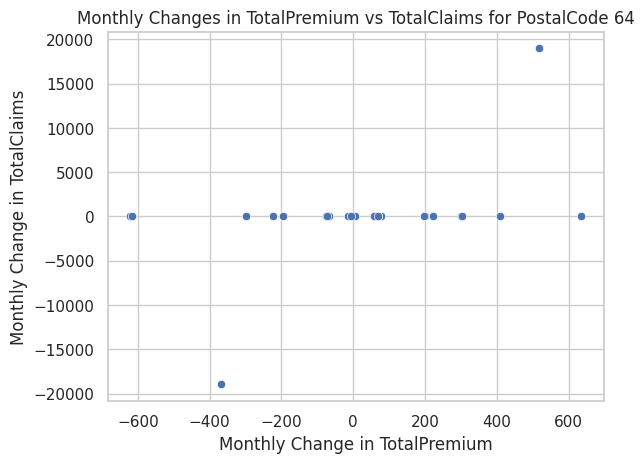

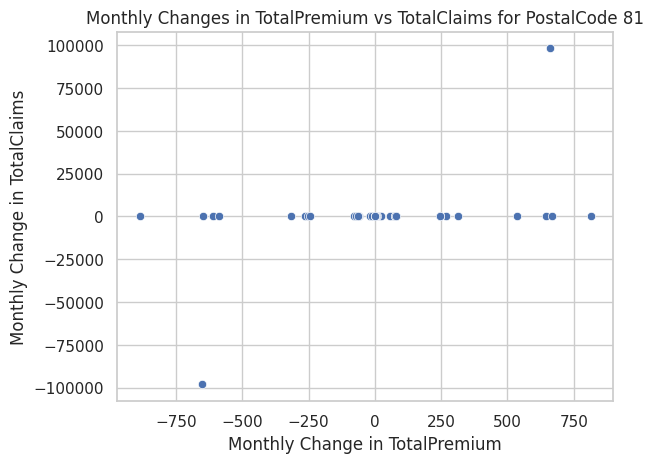

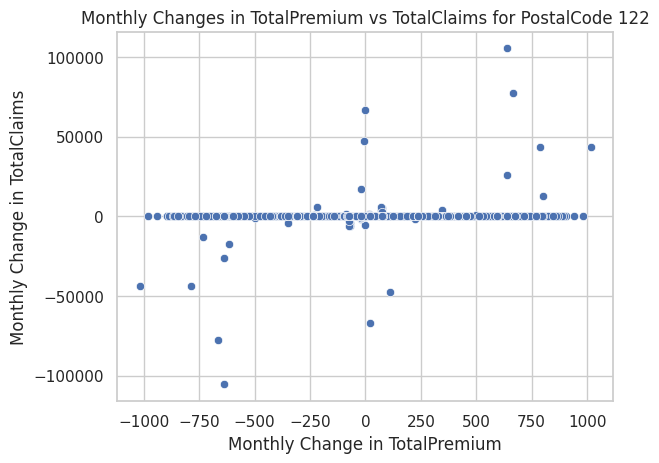

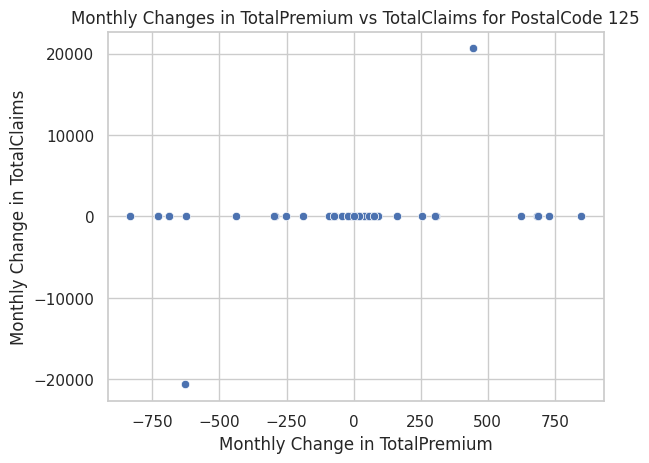

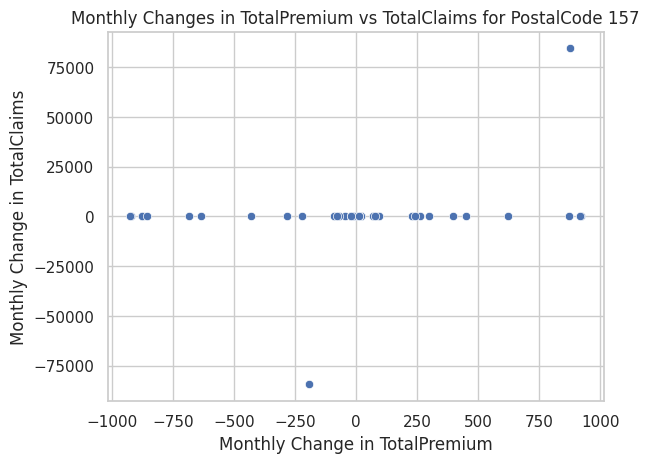

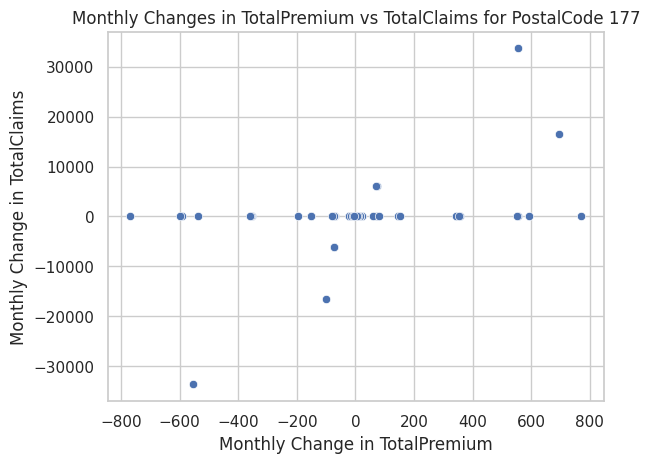

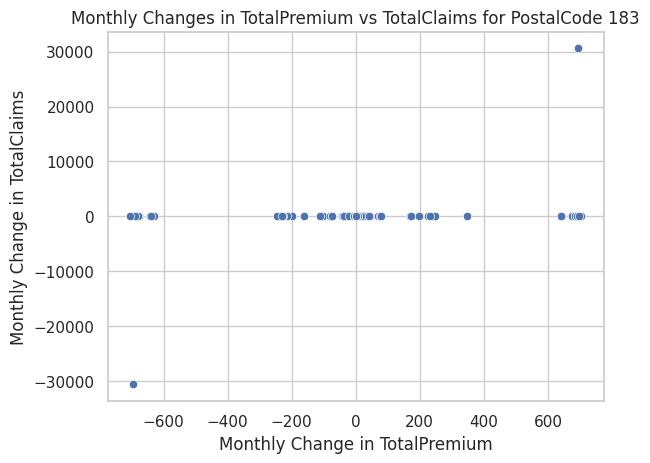

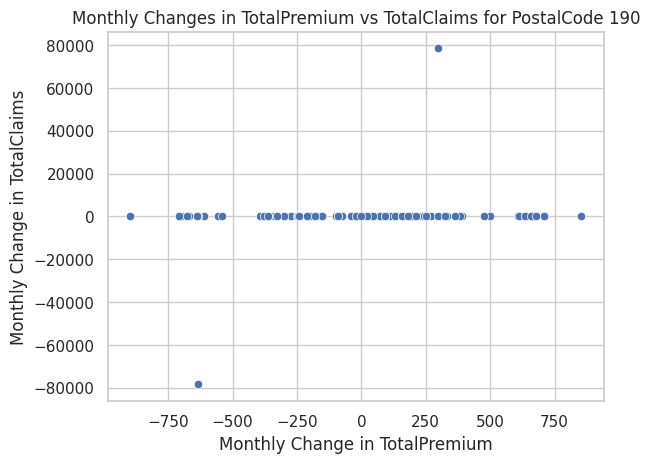

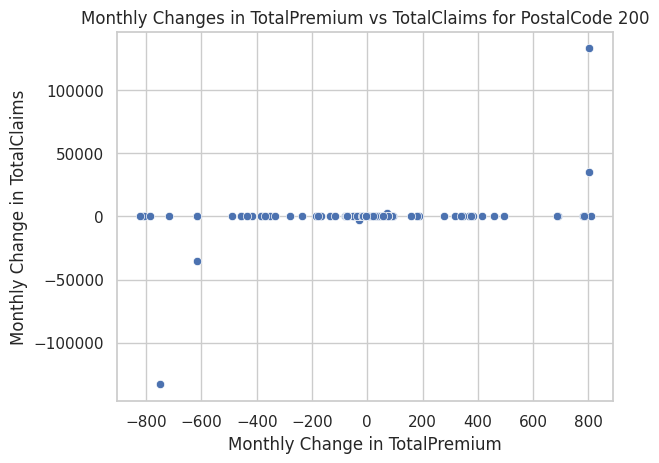

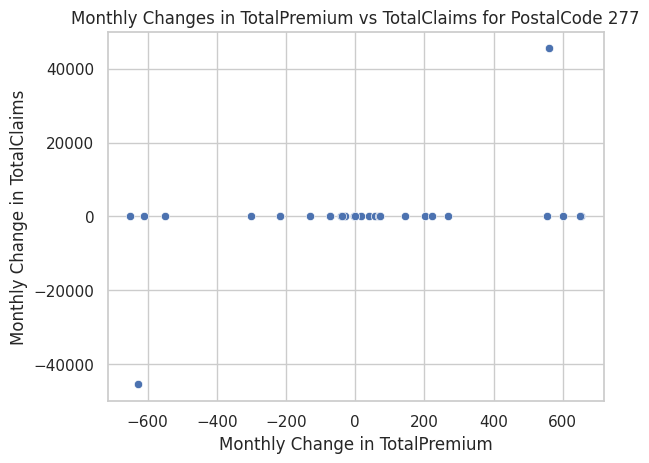

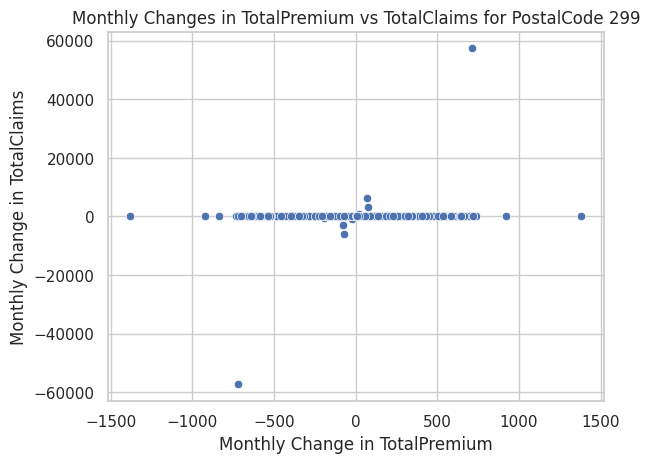

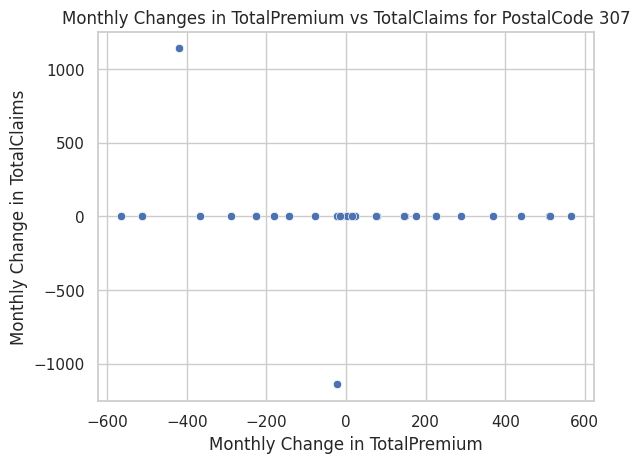

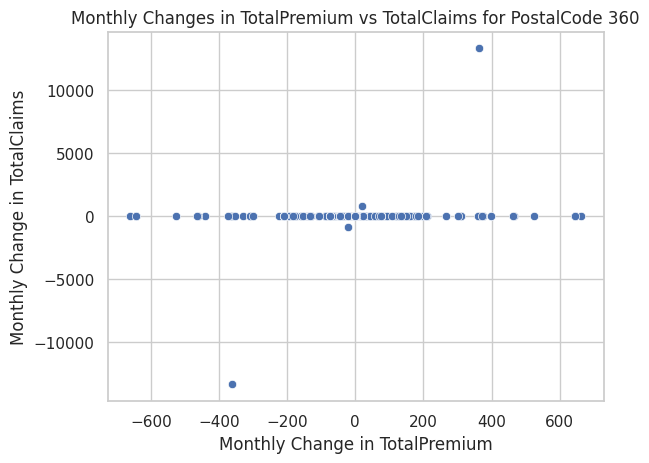

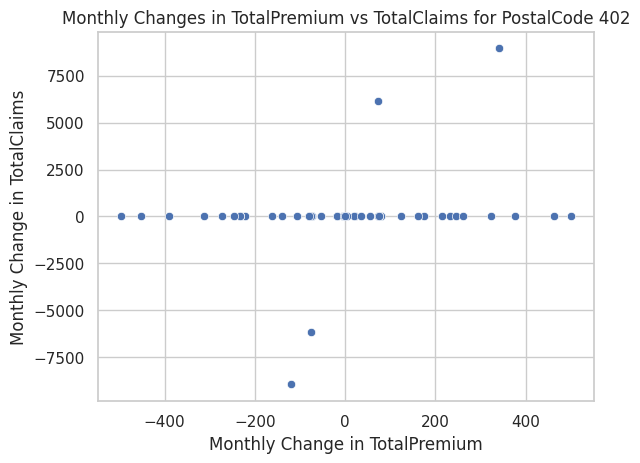

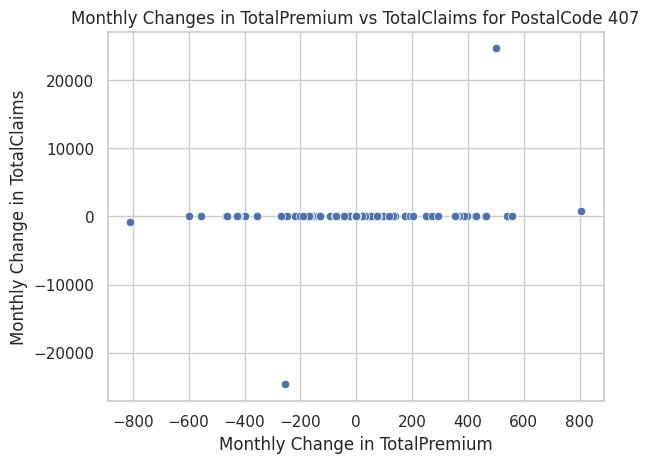

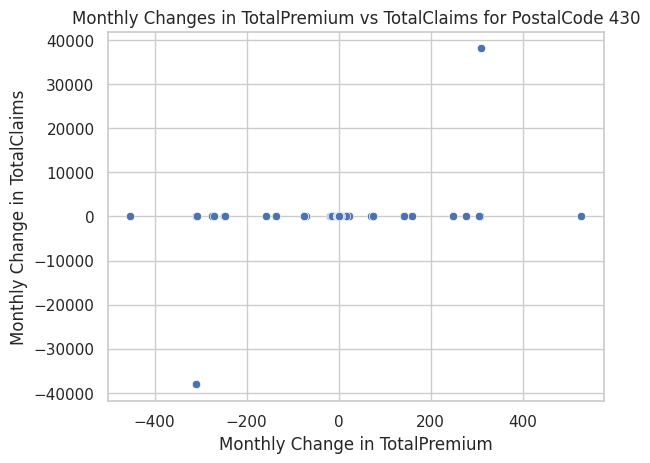

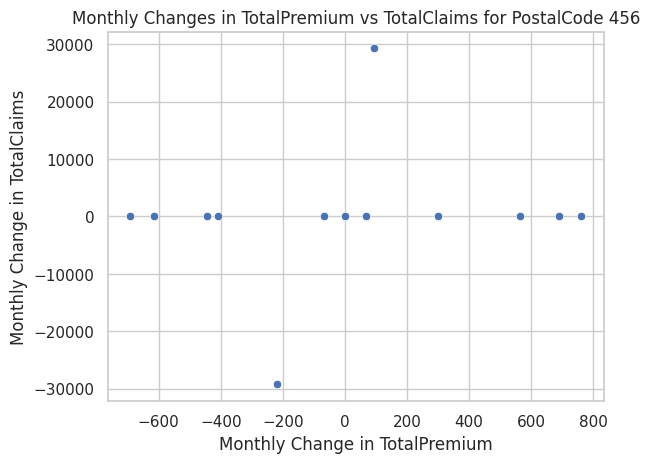

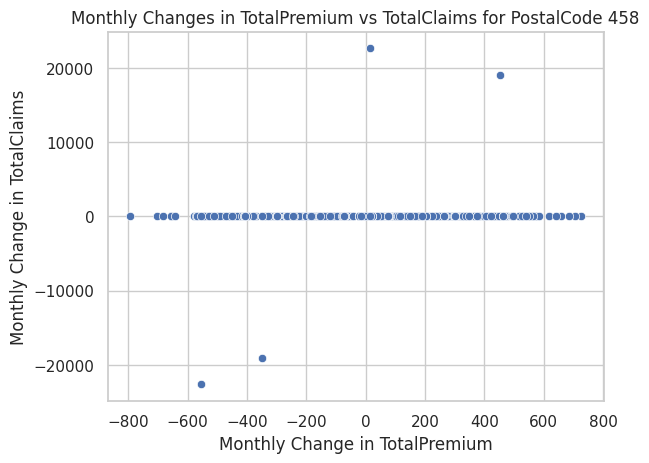

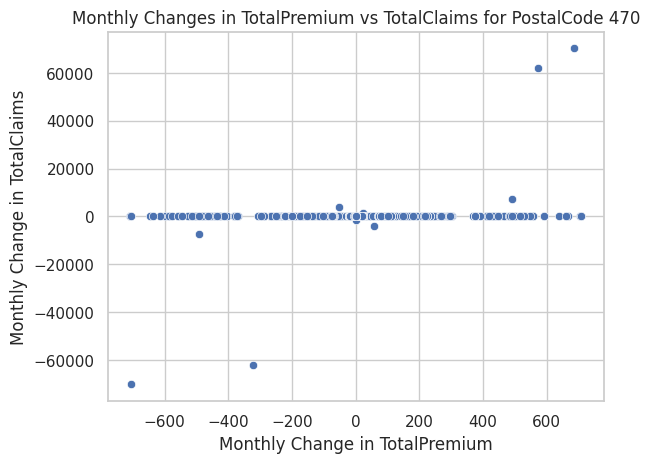

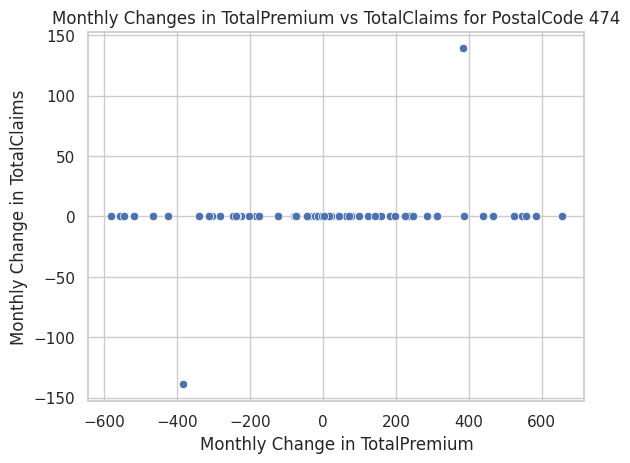

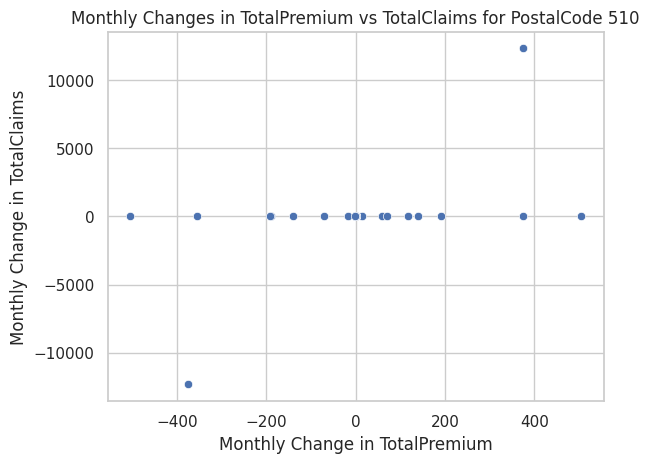

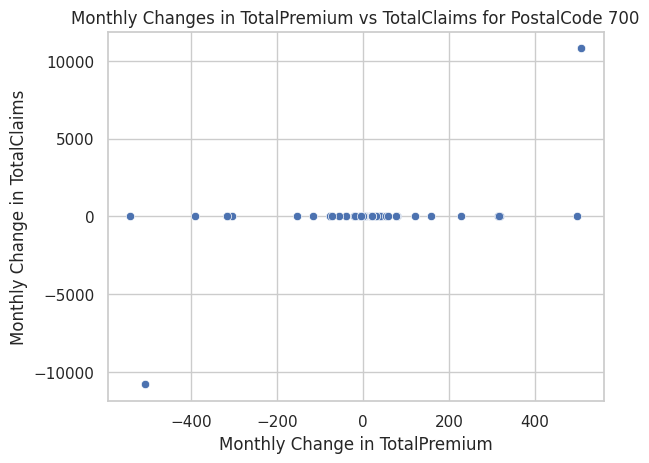

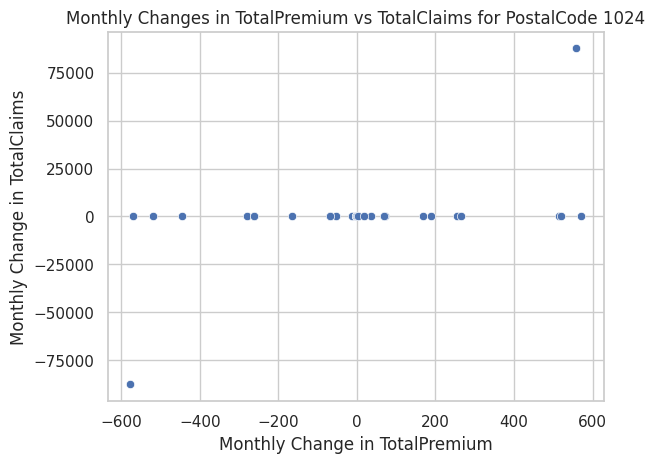

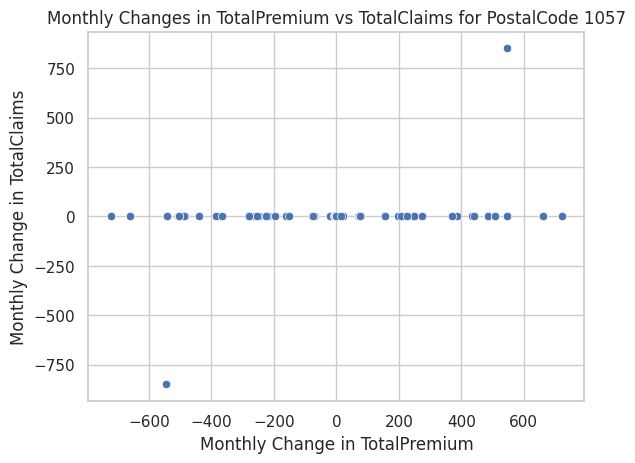

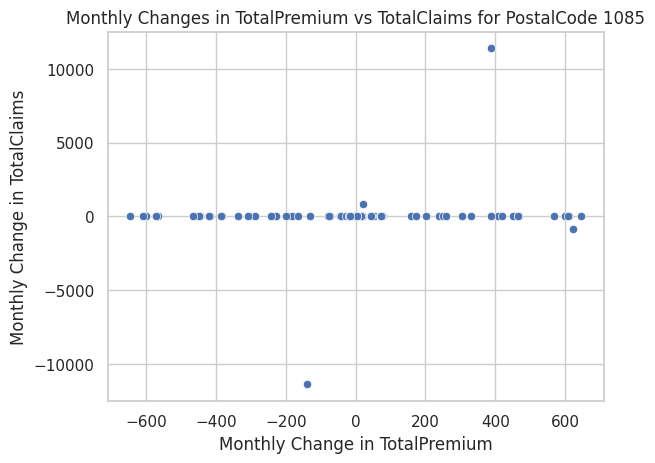

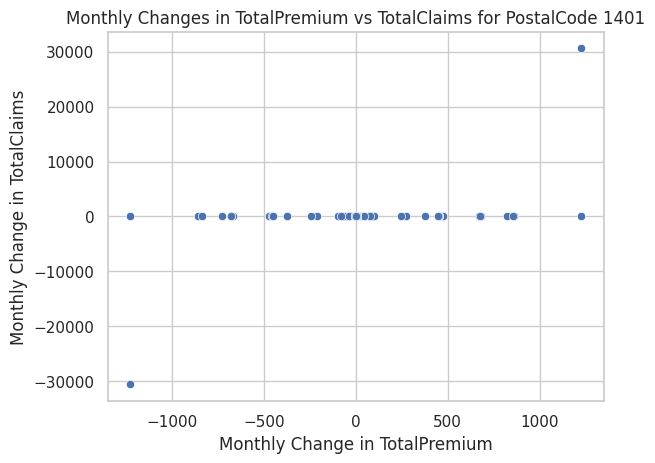

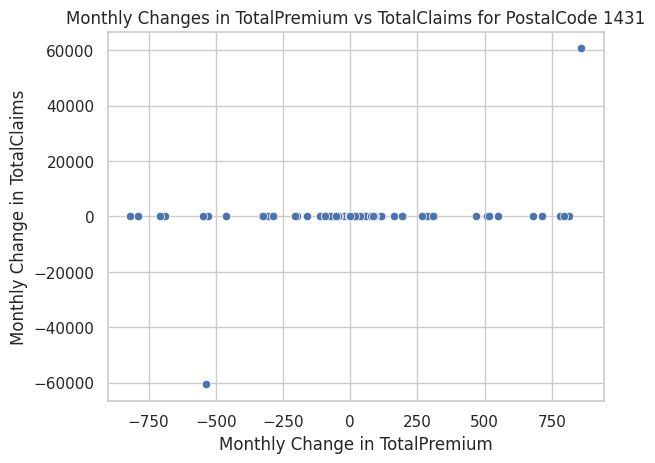

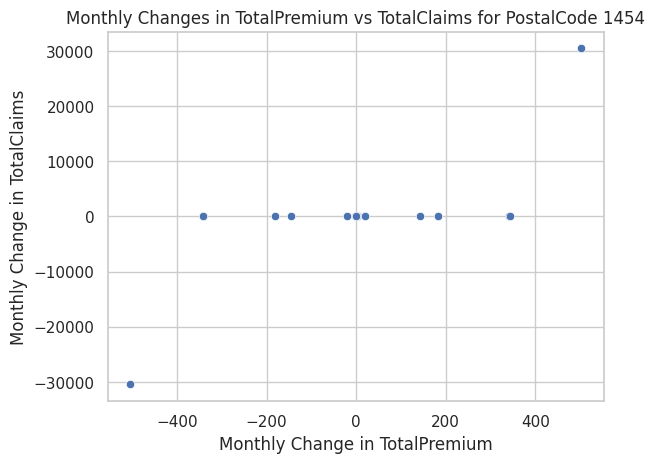

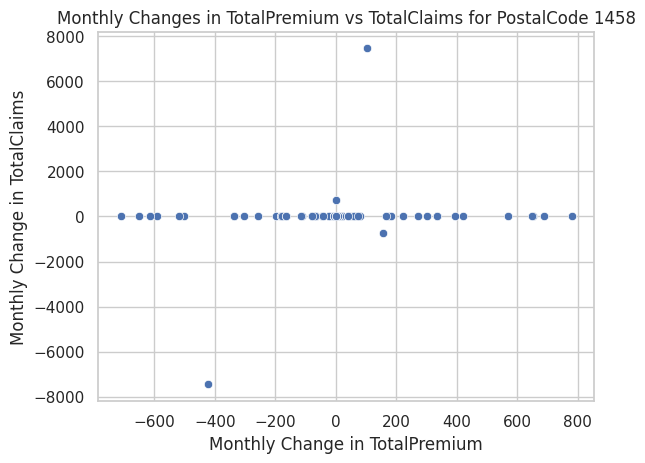

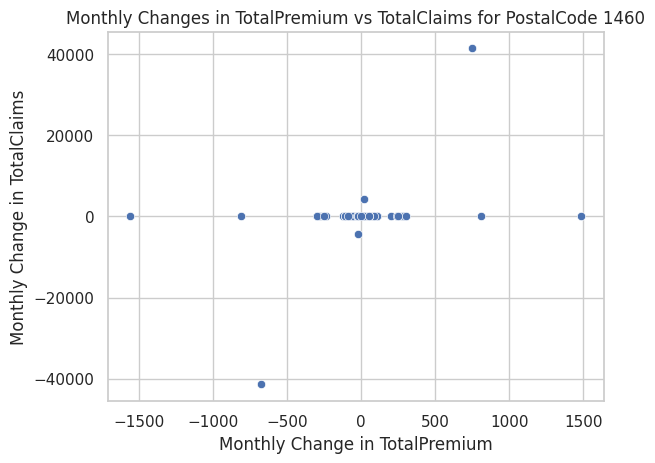

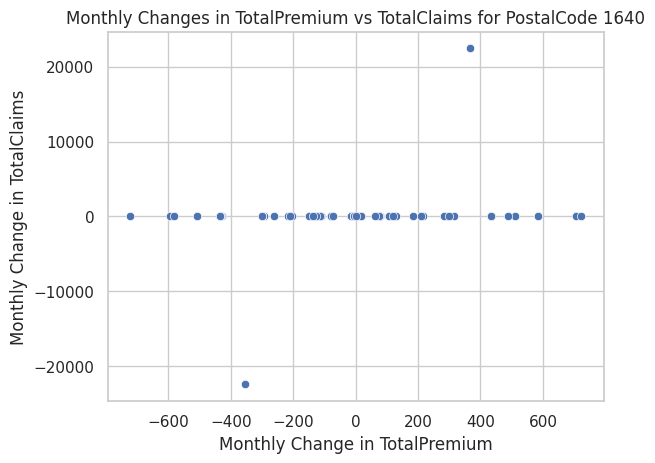

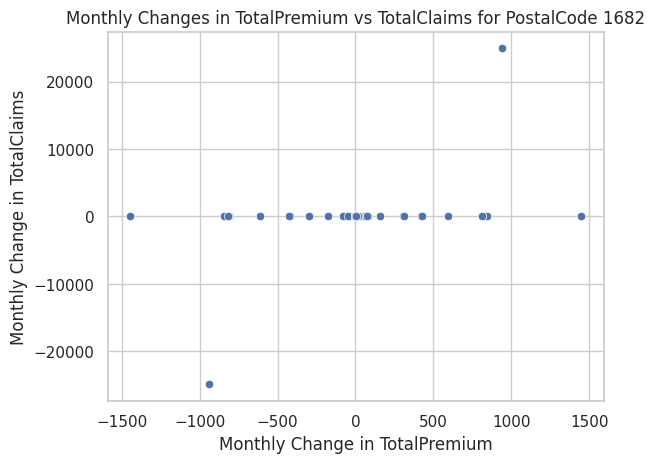

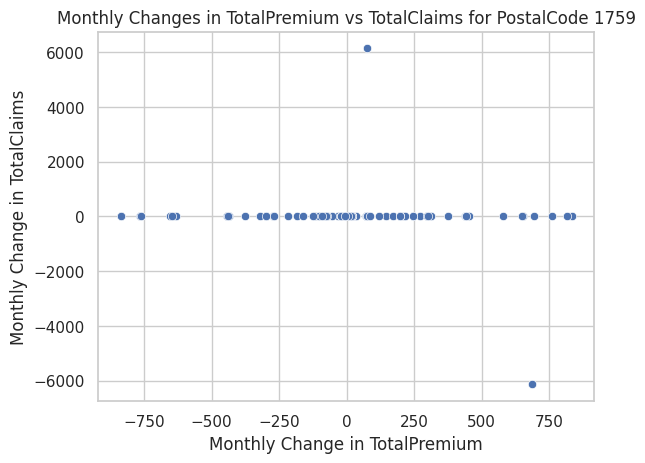

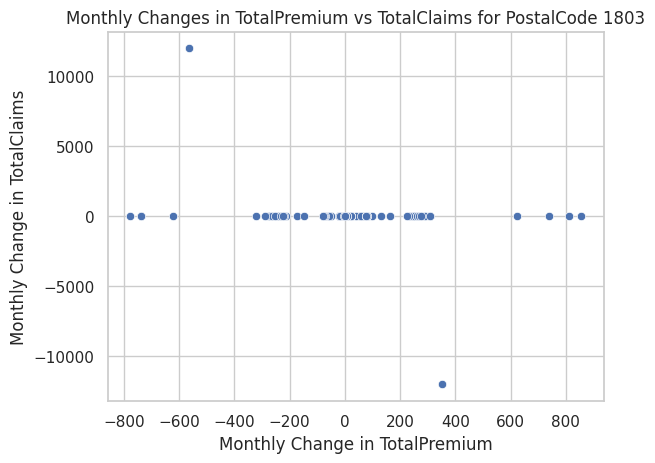

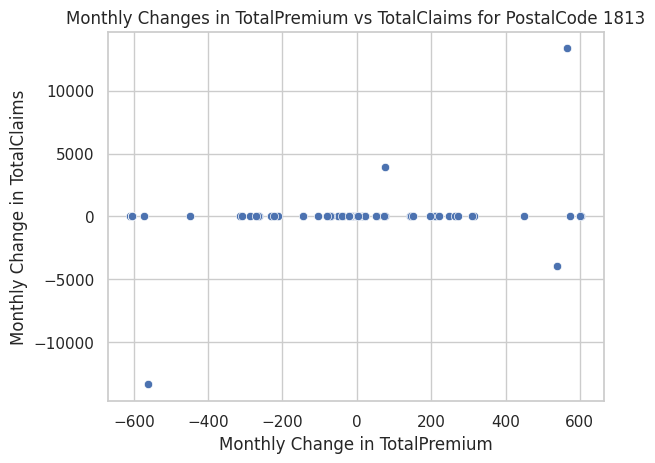

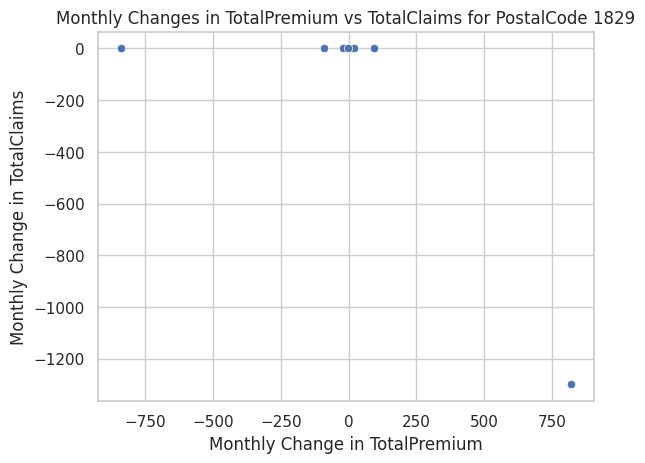

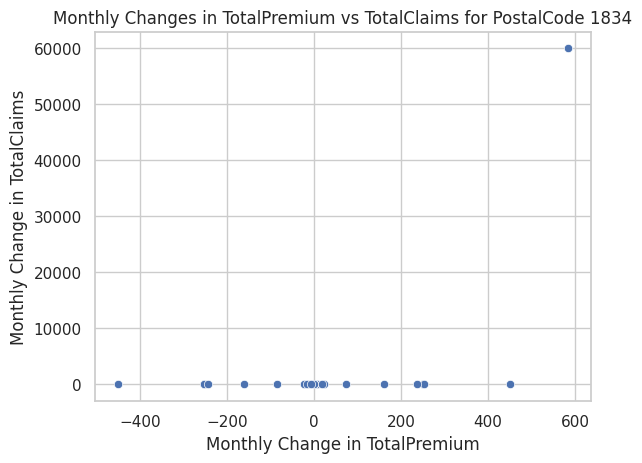

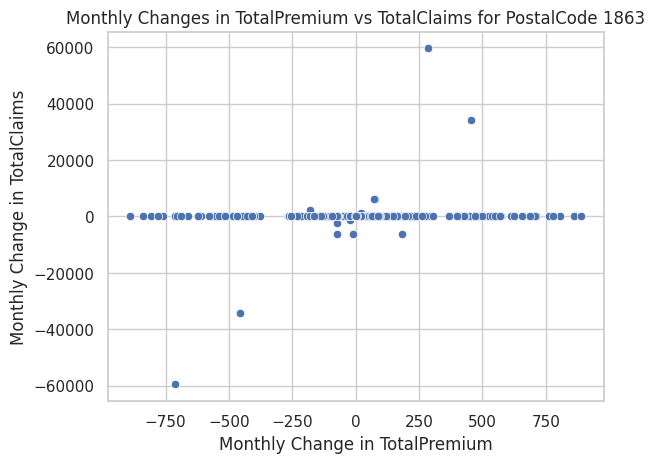

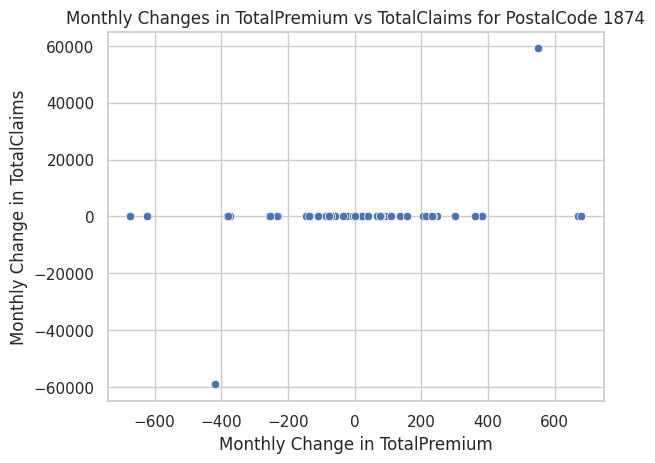

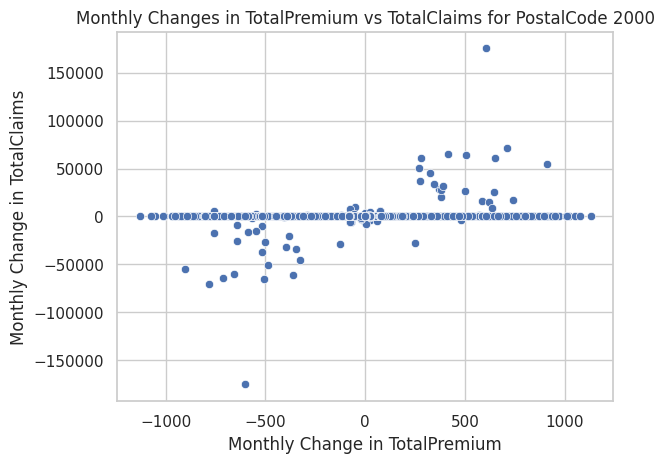

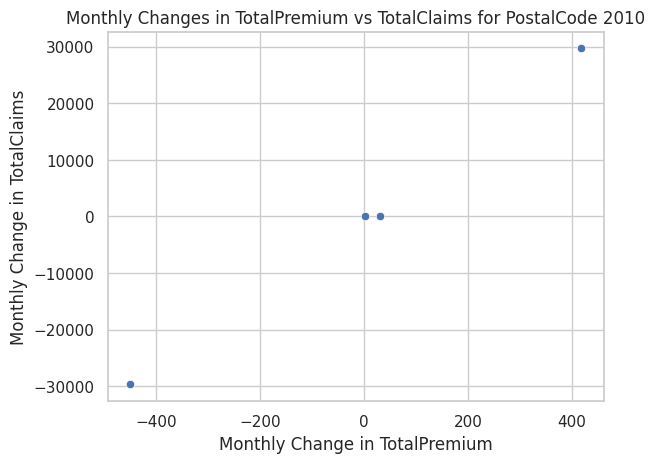

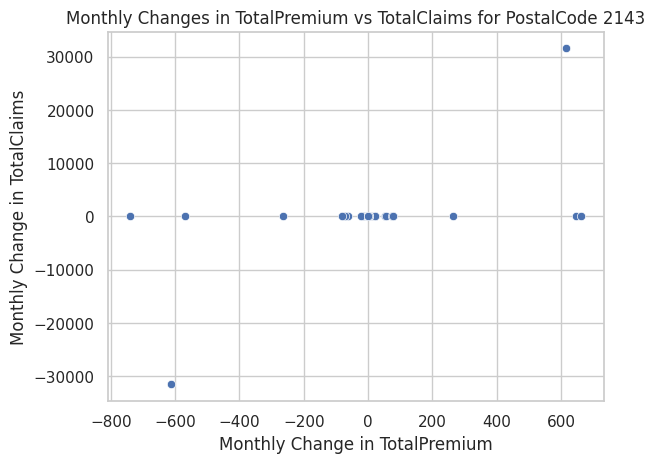

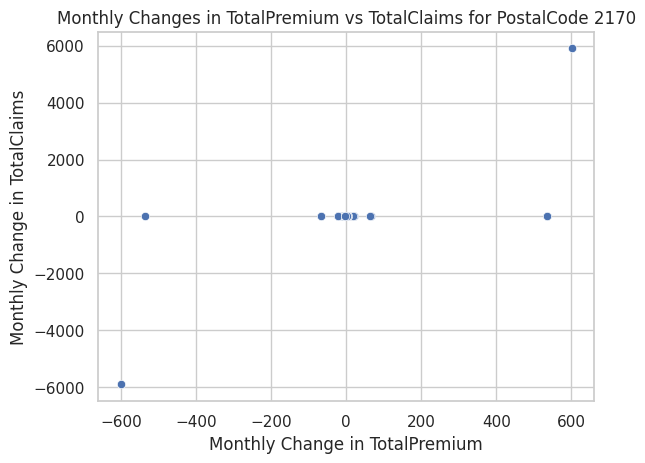

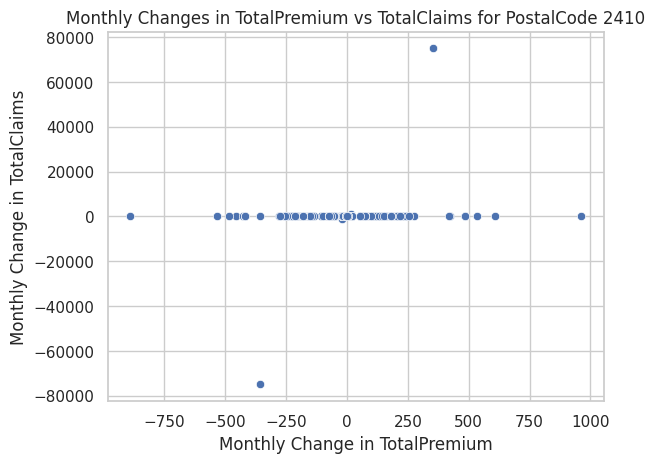

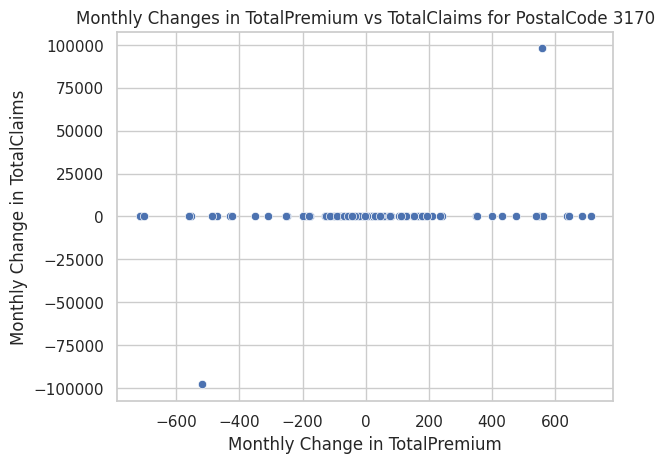

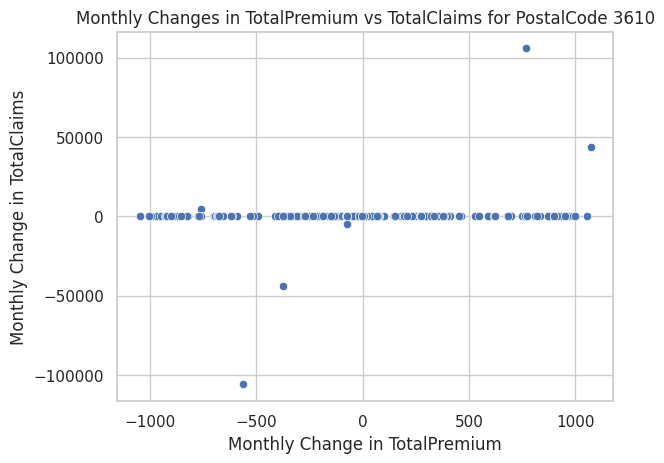

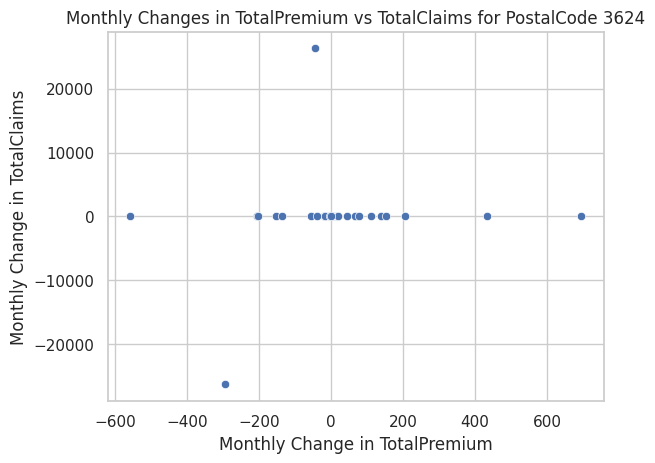

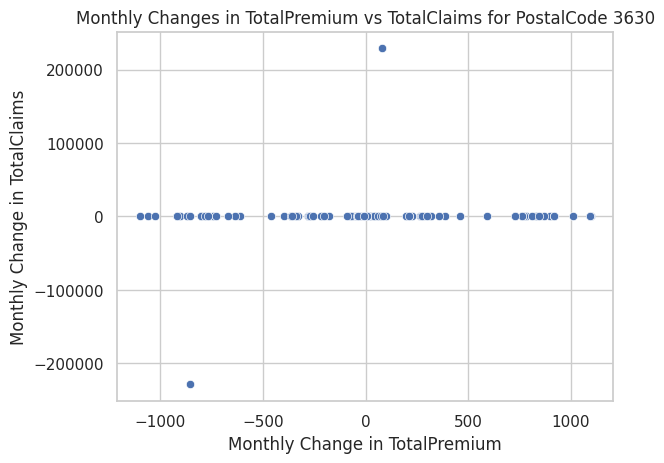

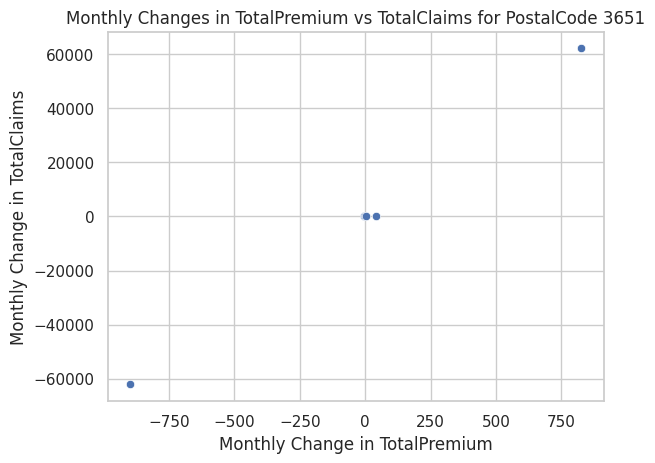

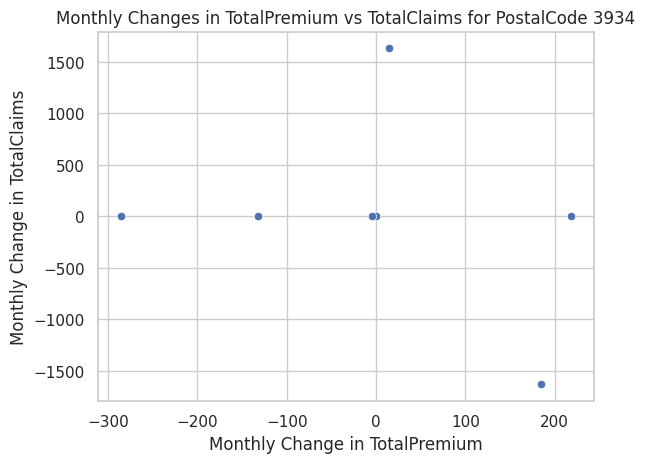

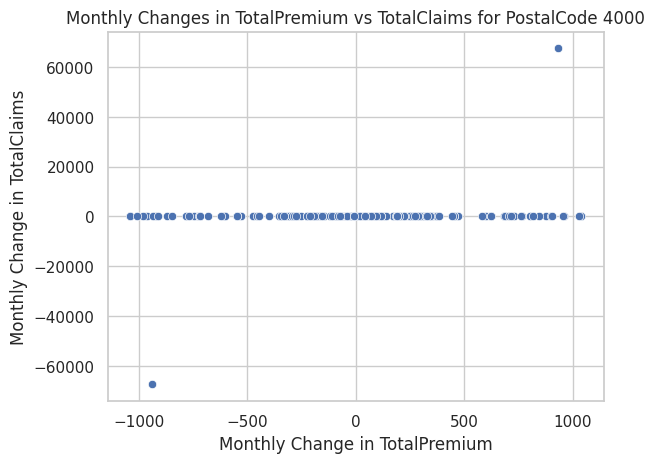

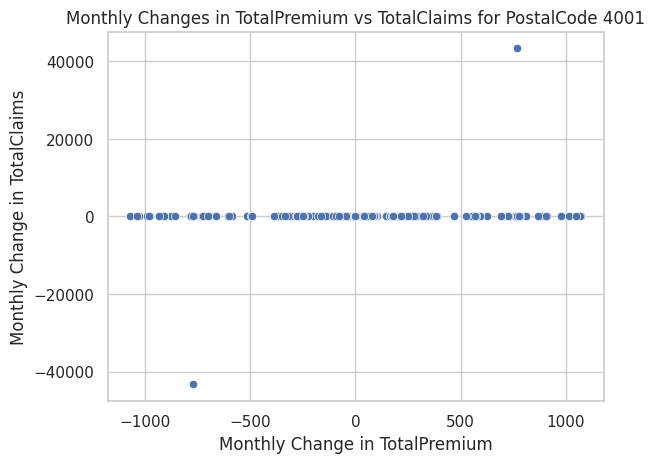

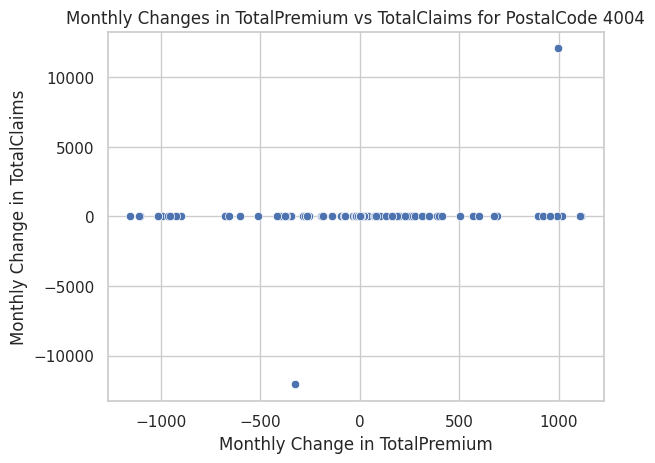

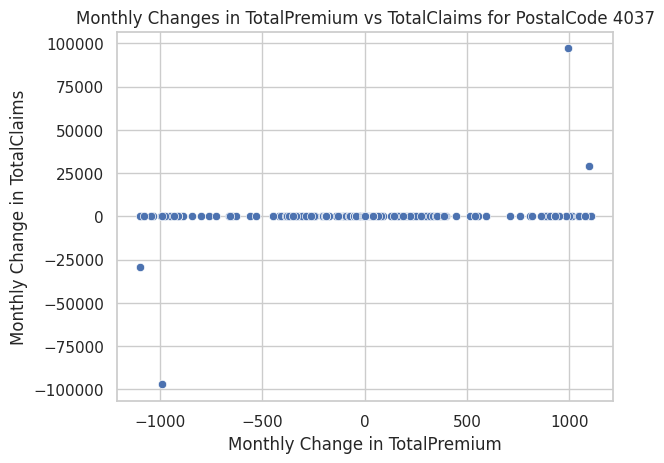

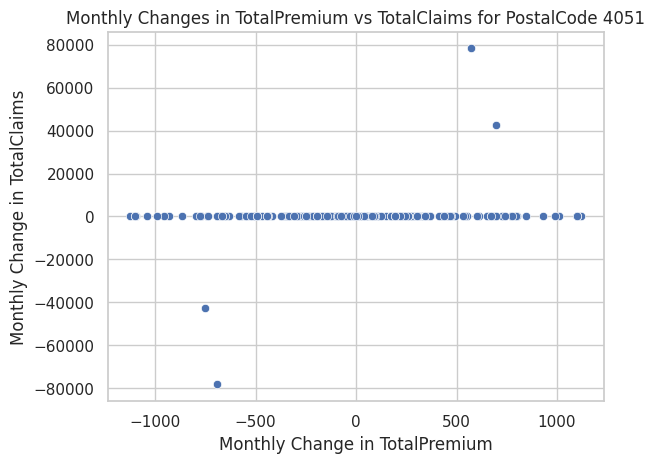

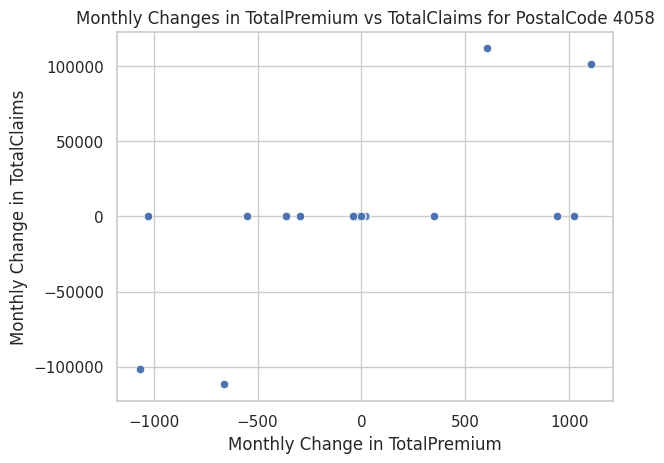

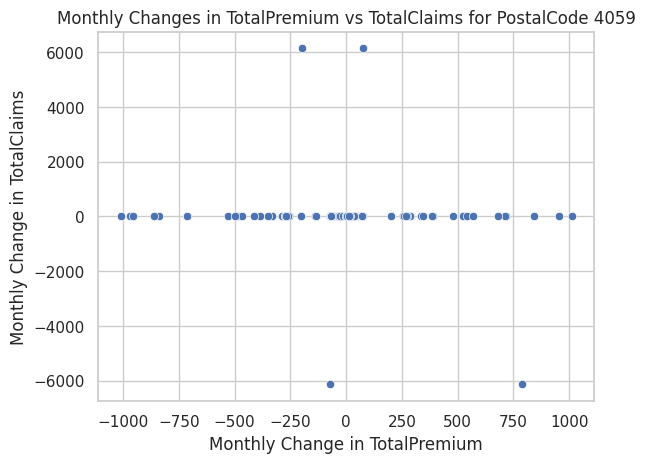

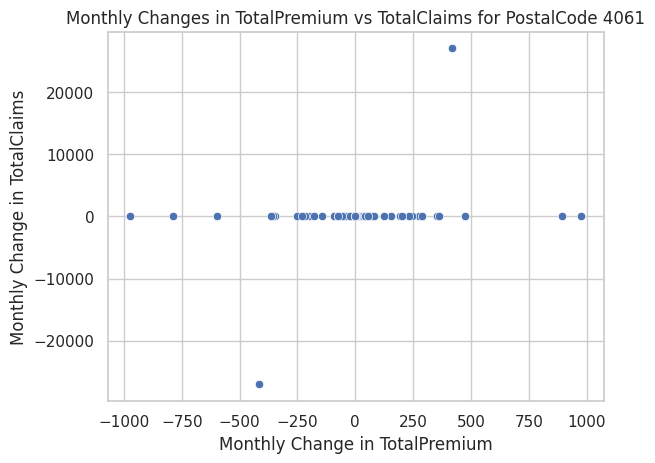

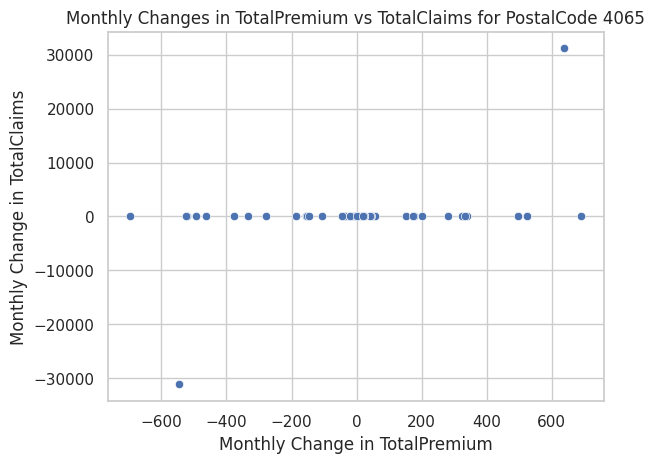

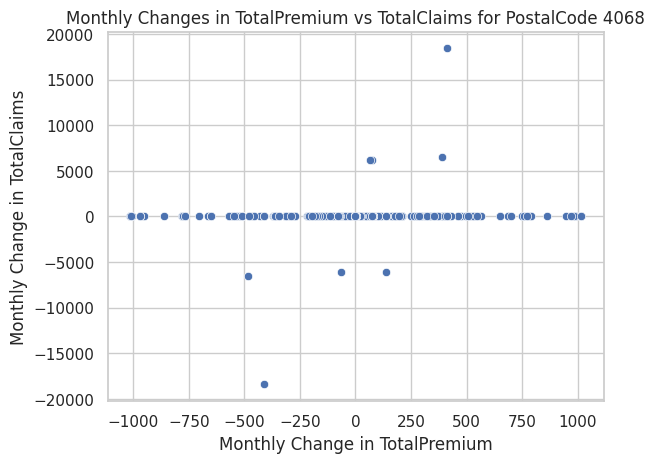

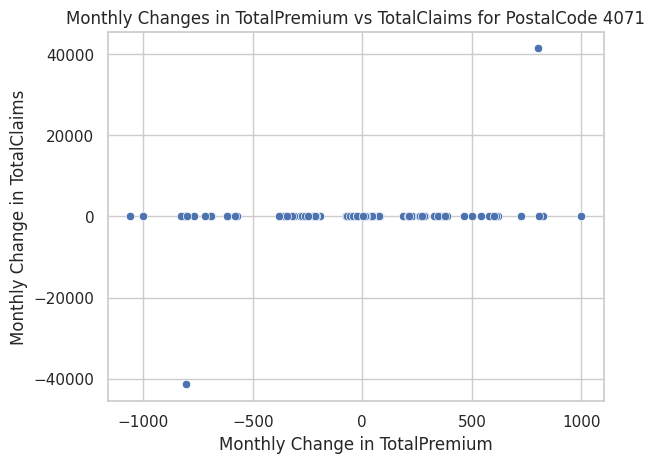

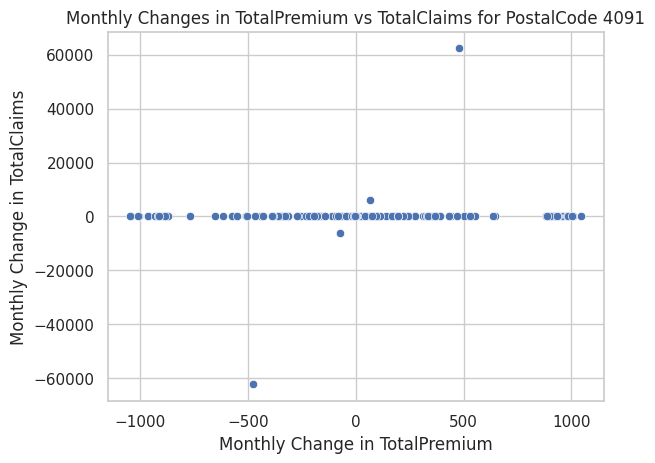

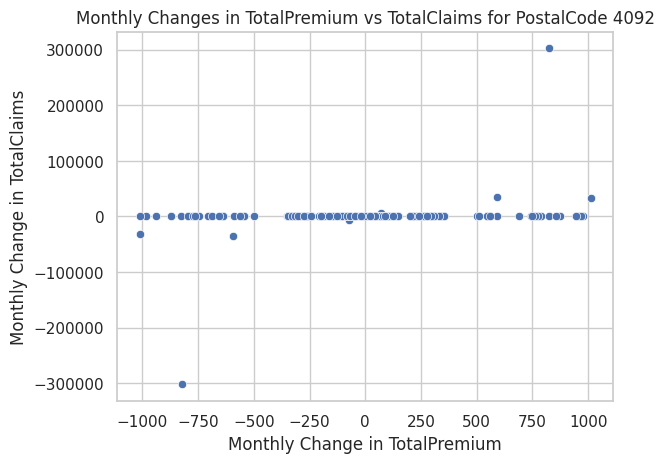

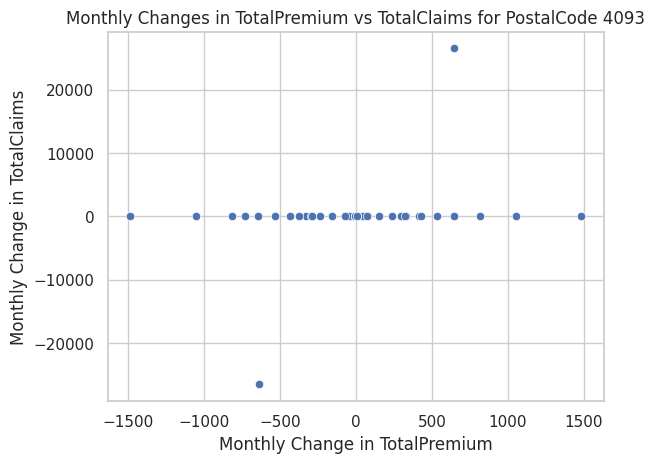

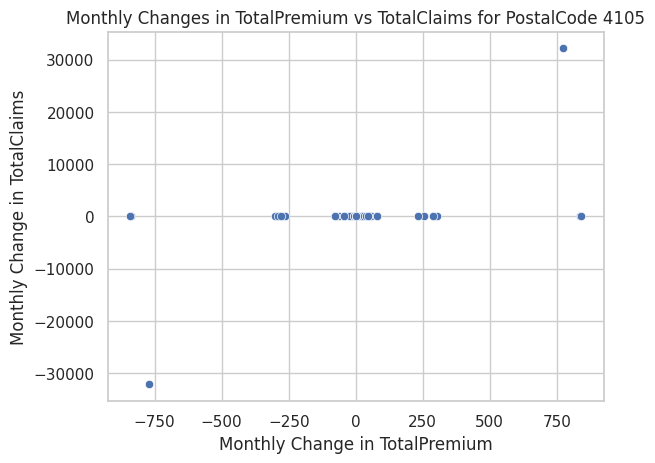

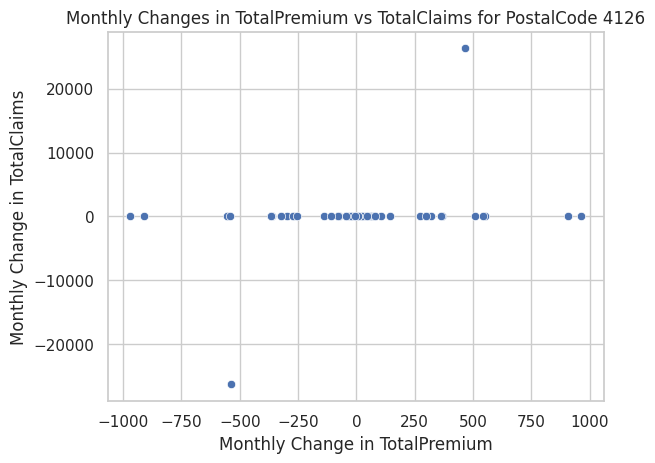

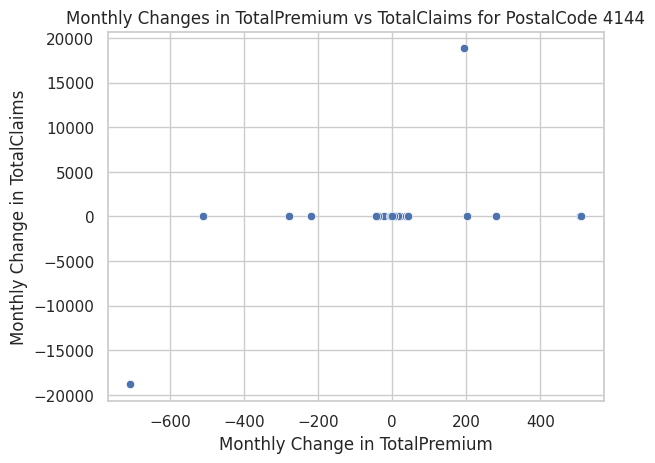

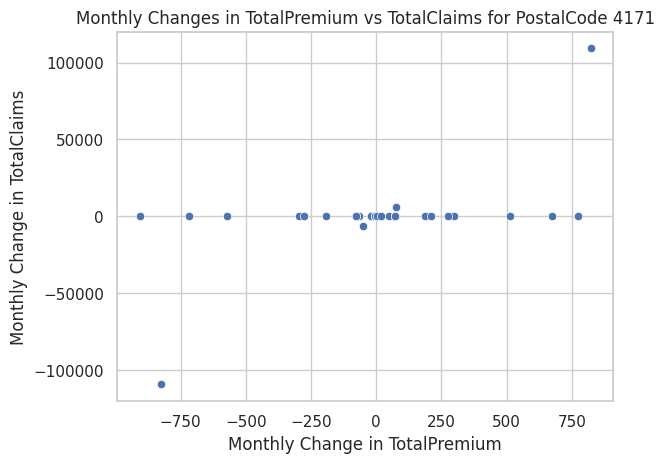

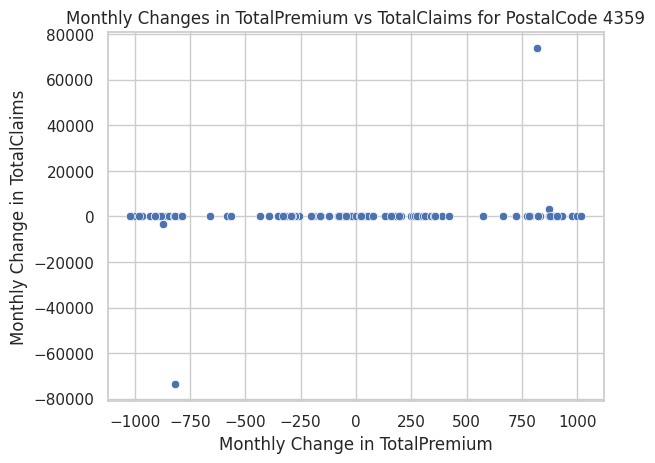

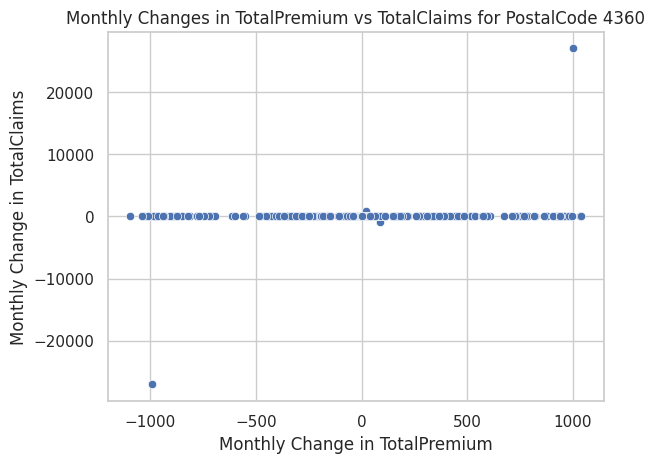

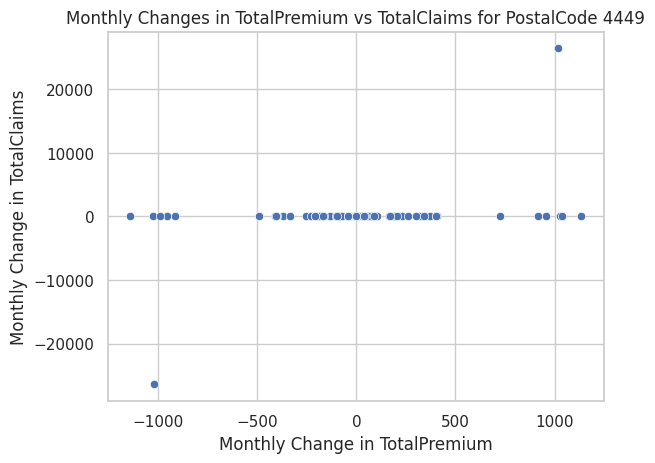

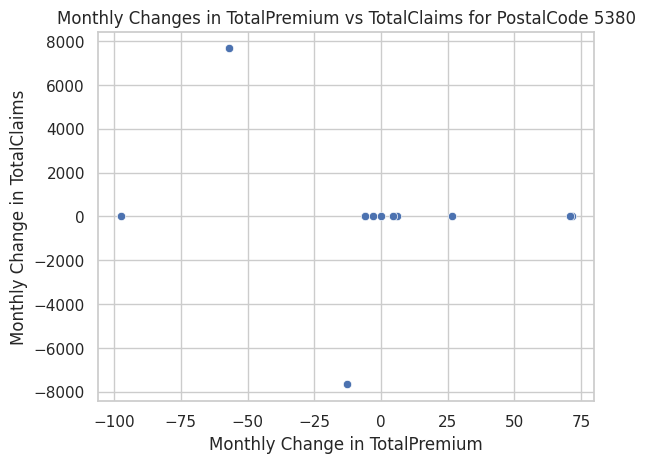

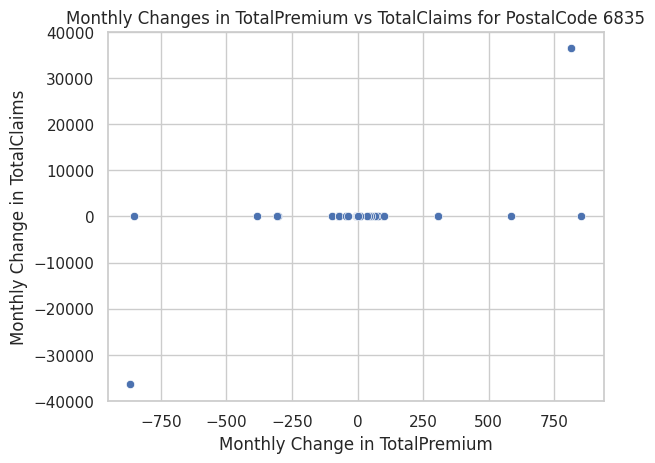

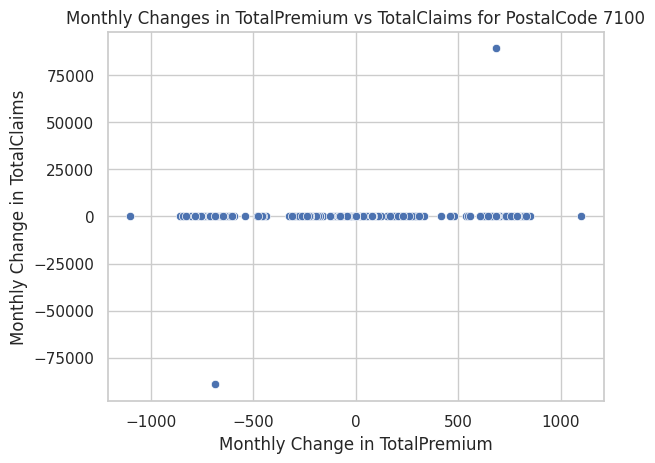

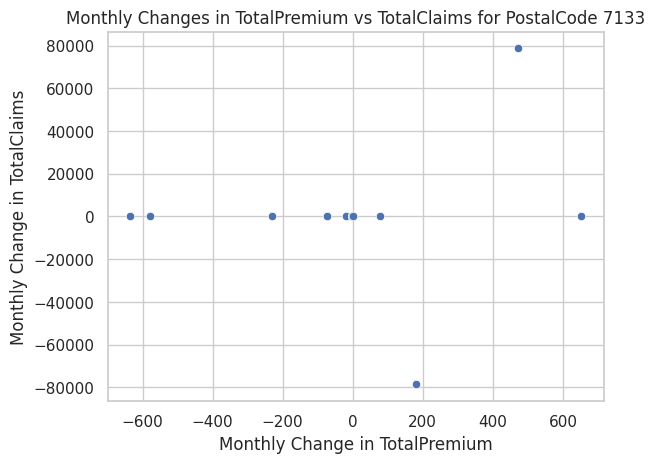

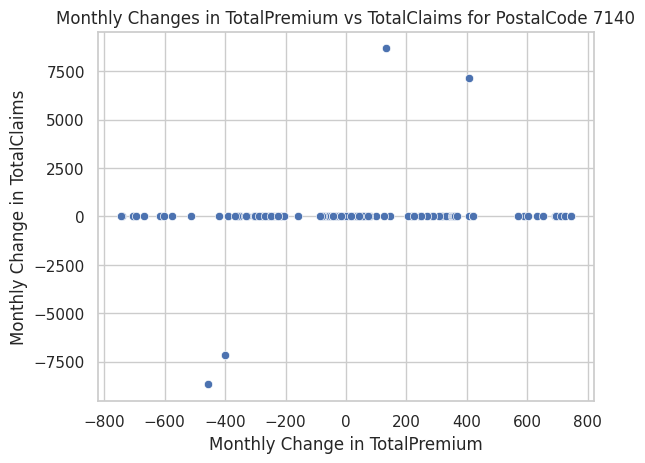

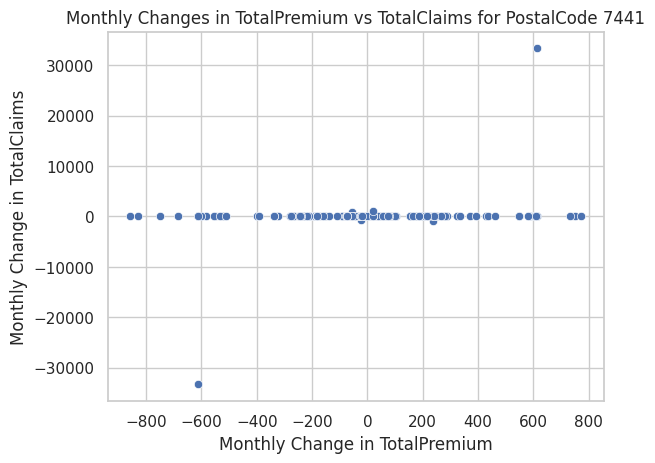

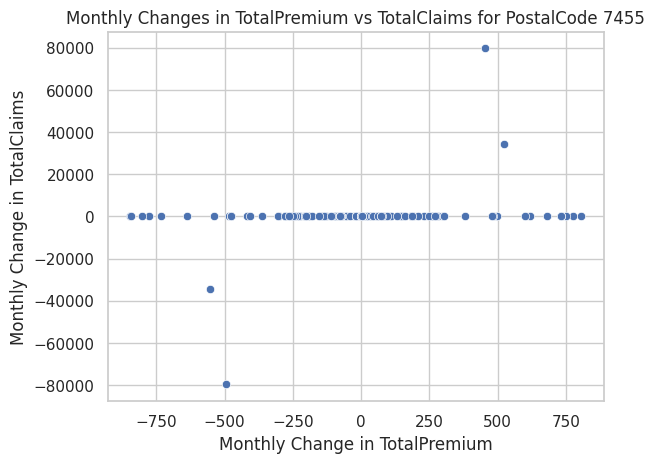

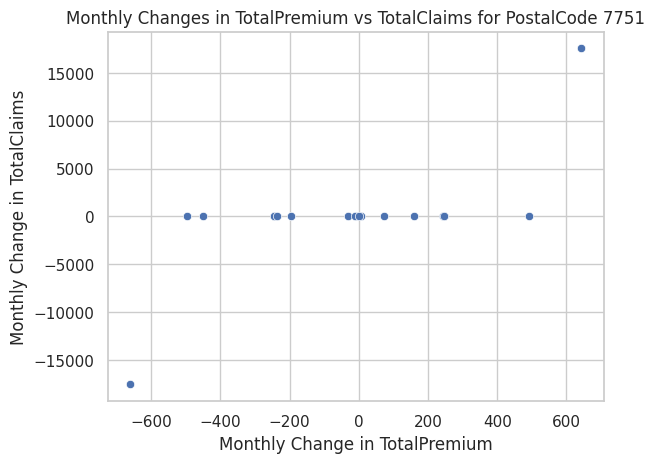

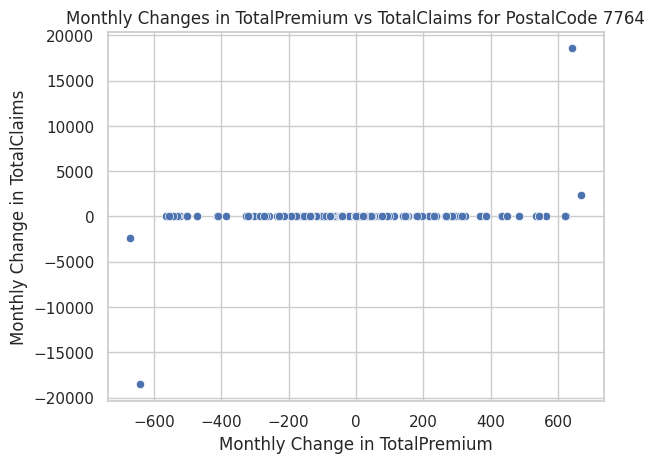

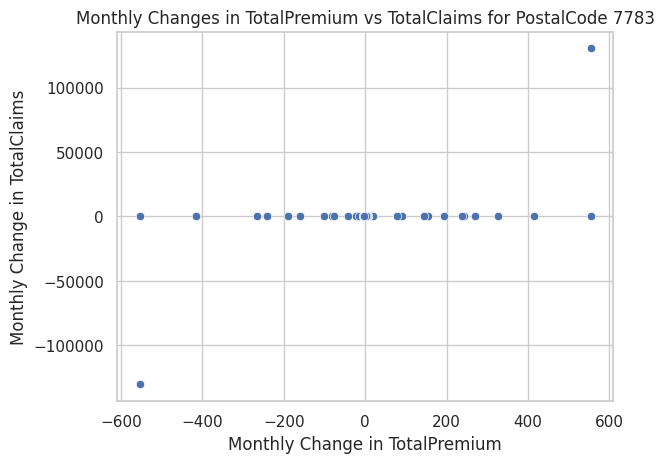

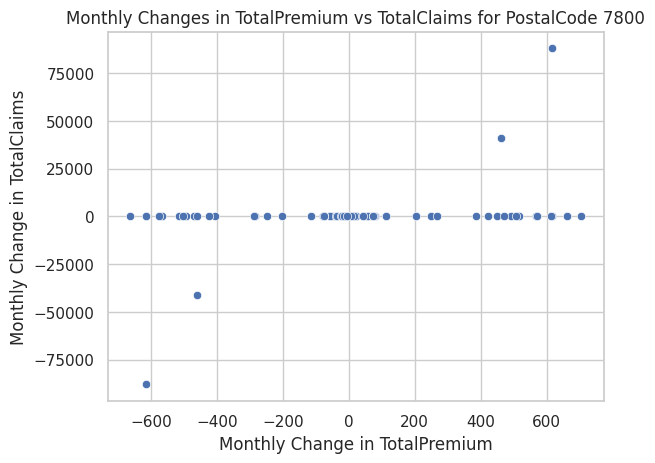

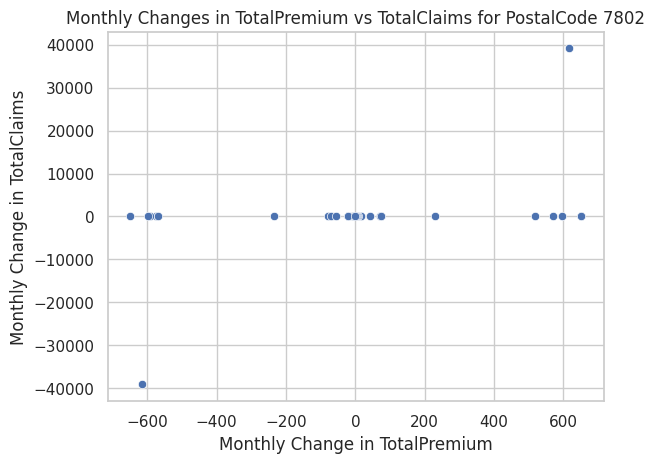

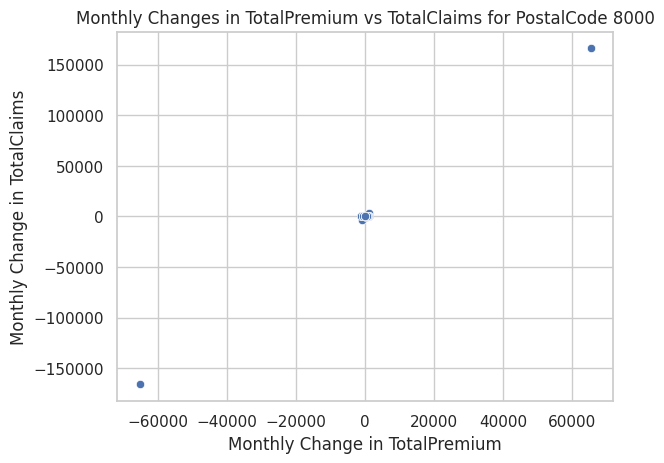

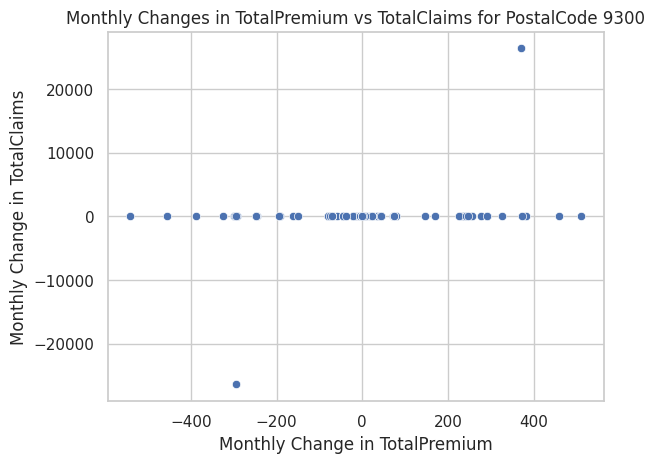

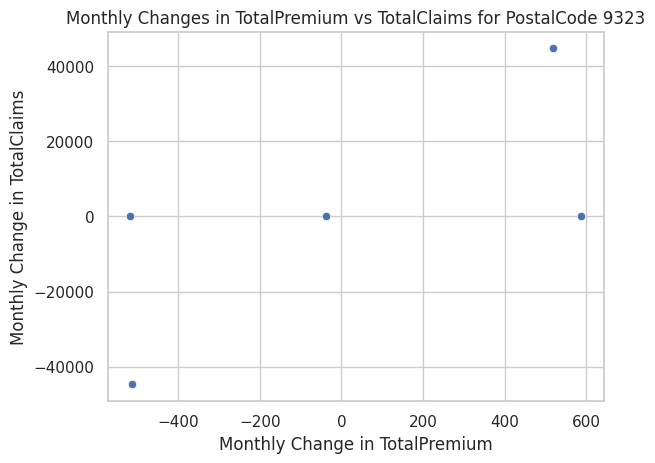

In [98]:
for postalcode in significant_postalcodes:
  if postalcode in scatter_plot_data_by_postalcode:
    data = scatter_plot_data_by_postalcode[postalcode]
    scatter_plot_data_for_signigicant_postalcodes.append(data)
    scatter_plot = sns.scatterplot(x='TotalPremium_MonthlyChange', y='TotalClaims_MonthlyChange', data=data)
    plt.title(f'Monthly Changes in TotalPremium vs TotalClaims for PostalCode {postalcode}')
    plt.xlabel('Monthly Change in TotalPremium')
    plt.ylabel('Monthly Change in TotalClaims')
    # plt.savefig(f'PostalCode{postalcode}.png')
    # files.download(f'PostalCode{postalcode}.png')  # Download the file
    plt.show()

In [99]:
scatter_plot_data_for_signigicant_postalcodes

[        TotalPremium_MonthlyChange  TotalClaims_MonthlyChange
 290487                    0.000000                        0.0
 609231                  -74.561404                        0.0
 454622                    0.000000                        0.0
 624019                    0.000000                        0.0
 807377                    0.000000                        0.0
 ...                            ...                        ...
 548137                   52.631579                        0.0
 521243                  -74.561404                        0.0
 115917                    6.265088                        0.0
 529382                   -6.265088                        0.0
 943033                    0.000000                        0.0
 
 [533 rows x 2 columns],
         TotalPremium_MonthlyChange  TotalClaims_MonthlyChange
 420665                    0.000000                   0.000000
 453923                    0.000000                   0.000000
 429049                    0

**Analysis and Insights from correlation matrix**
1. **High Correlation**: ZipCodes 8000 (0.985) and 4087 (0.920) show very strong positive correlations, indicating stable and predictable insurance behaviors.
2. **Moderate Correlation**: ZipCodes 7700 (0.527) and 7947 (0.514) show moderate positive correlations, suggesting regions with somewhat predictable claims patterns.
3. **Low/Negative Correlation**: ZipCodes 5670 (-0.129) and 3934 (-0.496) show negative correlations, indicating potential irregular patterns or risk factors.
**Recommendations**:
- **Premium Adjustments**: Review premium structures in high correlation areas to ensure they accurately reflect the risk.
Risk Management: Investigate low/negative correlation areas to understand underlying factors and mitigate potential risks.
- **Targeted Marketing**: Focus marketing efforts on regions with moderate correlations to attract new customers with tailored insurance products.

**Conclusion**
Understanding the correlation between TotalPremium and TotalClaims by ZipCode is crucial for effective decision-making. The insights gained from this analysis can help optimize premium structures, manage risks, and develop targeted marketing strategie

**Overall Analysis**

Based on the findings of the analysis, several key observations and implications can be drawn:

1. **Correlation between TotalPremium and TotalClaims**:
   - The analysis revealed significant correlations between TotalPremium and TotalClaims for multiple ZipCodes. This suggests that changes in TotalPremium tend to be associated with changes in TotalClaims within these specific geographic areas.

2. **Marketing Strategy Optimization**:
   - By identifying ZipCodes with significant correlations, insurance companies can optimize their marketing strategy to target these areas more effectively. They can allocate resources such as advertising budgets and sales efforts to areas where the potential for attracting new clients is higher.

3. **Risk Assessment and Premium Adjustment**:
   - The analysis also identified "low-risk" targets where premiums could potentially be reduced. Insurance companies can leverage this insight to adjust premiums for customers in these ZipCodes, making their offerings more competitive and attractive to potential clients.

4. **Balancing Profitability and Attractiveness**:
   - While reducing premiums in "low-risk" areas may attract new clients, it's essential to balance this with maintaining profitability. Insurance companies should carefully assess the impact of premium adjustments on their overall financial performance and risk exposure.

5. **Further Analysis and Action**:
   - The analysis provides a foundation for further investigation and action. Insurance companies can delve deeper into the characteristics of the identified ZipCodes to understand the underlying factors driving the correlations. They can also consider implementing targeted marketing campaigns and product enhancements to capitalize on the insights gained.

In conclusion, the findings of the analysis offer valuable insights for optimizing marketing strategies, reducing risk, and attracting new clients in the insurance industry. By leveraging the correlations between TotalPremium and TotalClaims at the ZipCode level, insurance companies can make informed decisions to enhance their competitiveness and profitability.

## Data Comparison

In [100]:
comparison_plots = []

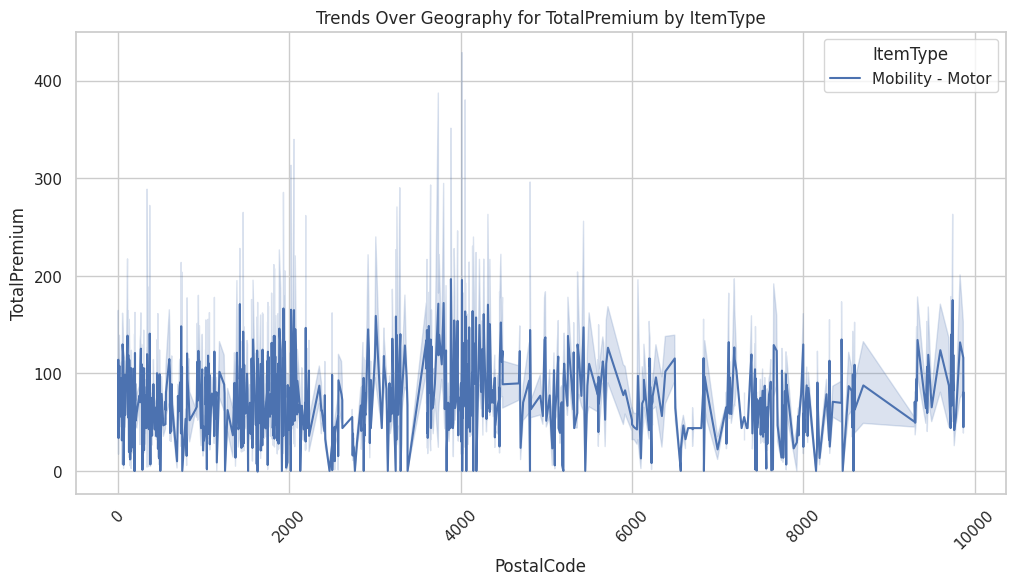

In [101]:
# Example: Trends Over Geography for TotalPremium, AutoMake, etc.
plt.figure(figsize=(12, 6))
sns.lineplot(x='PostalCode', y='TotalPremium', hue='ItemType', data=df)
plt.title('Trends Over Geography for TotalPremium by ItemType')
plt.xticks(rotation=45)
comparison_plots.append(plt.gcf())

## Outlier Detection

In [102]:
outlier_plots = []
outlier_columns = []

In [103]:
def has_outliers(series, k=1.5):
  q1 = series.quantile(0.25)
  q3 = series.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - k * iqr
  upper_bound = q3 + k * iqr
  return any((series < lower_bound) | (series > upper_bound))


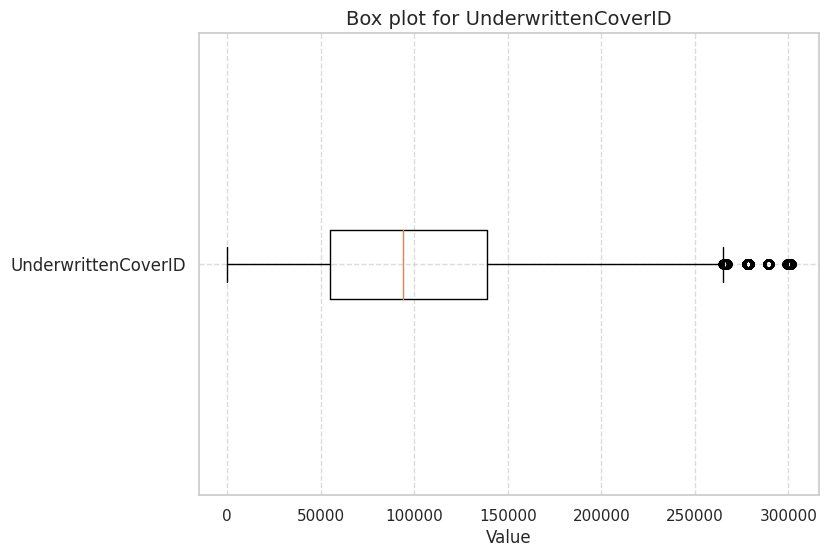

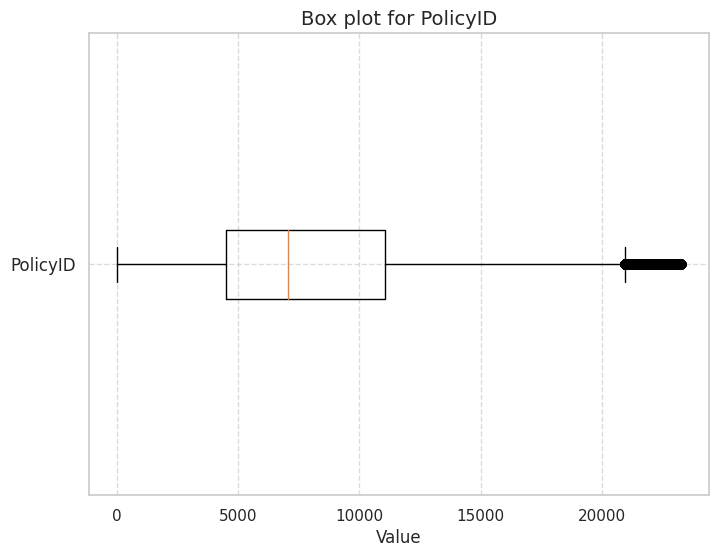

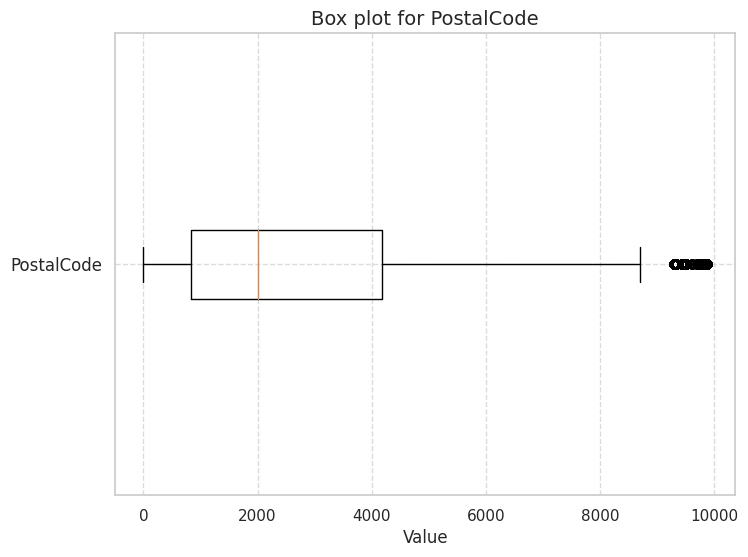

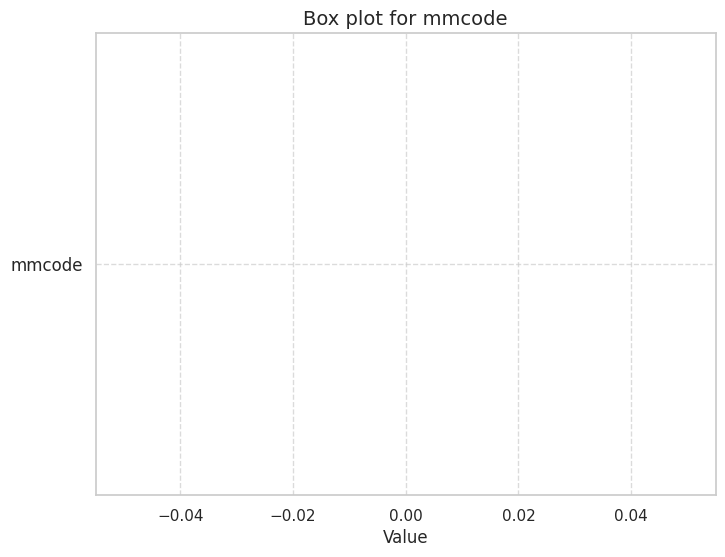

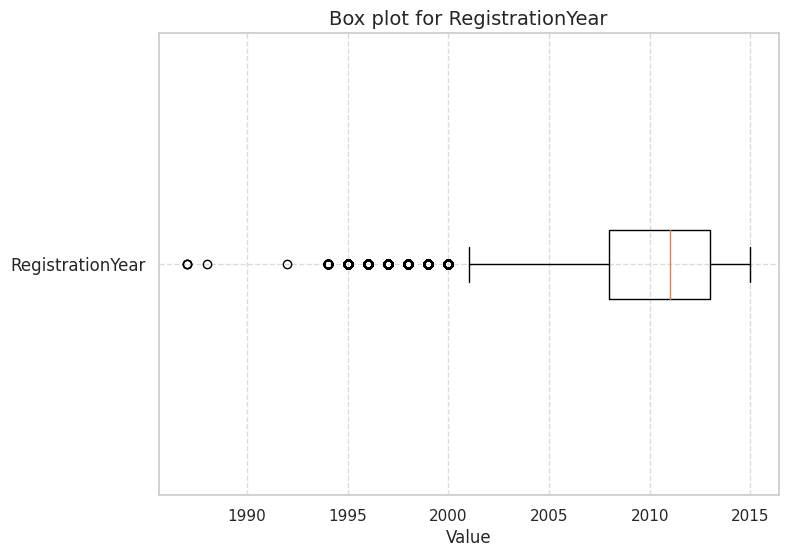

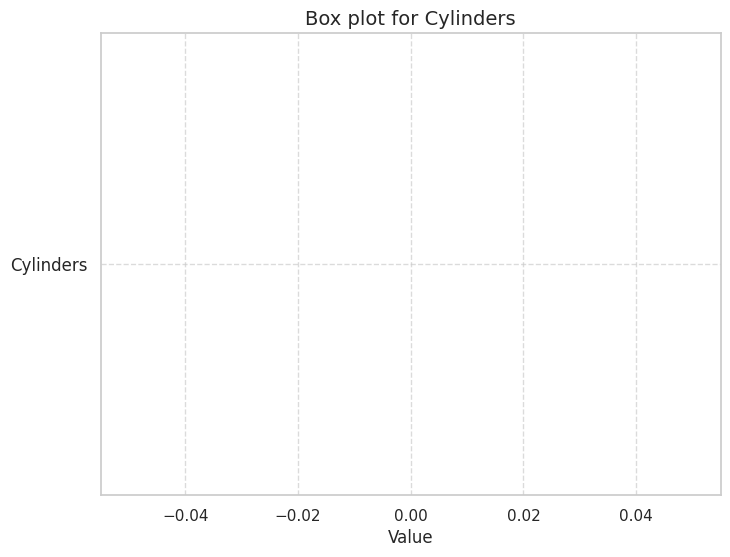

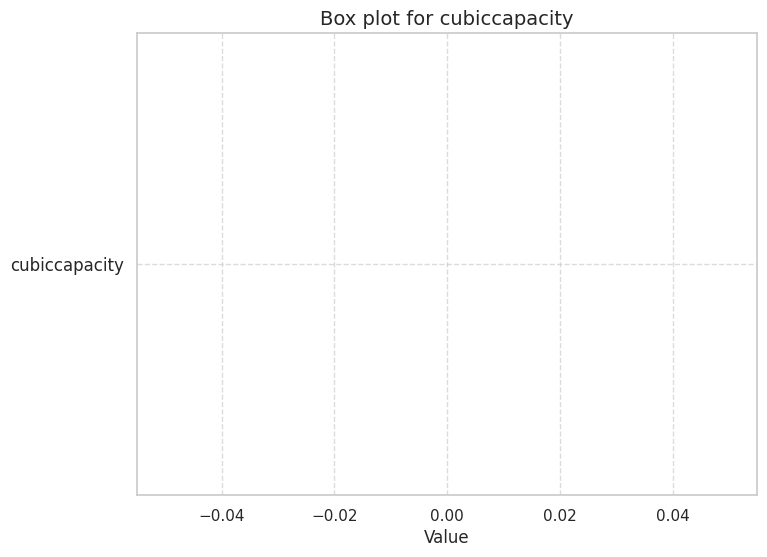

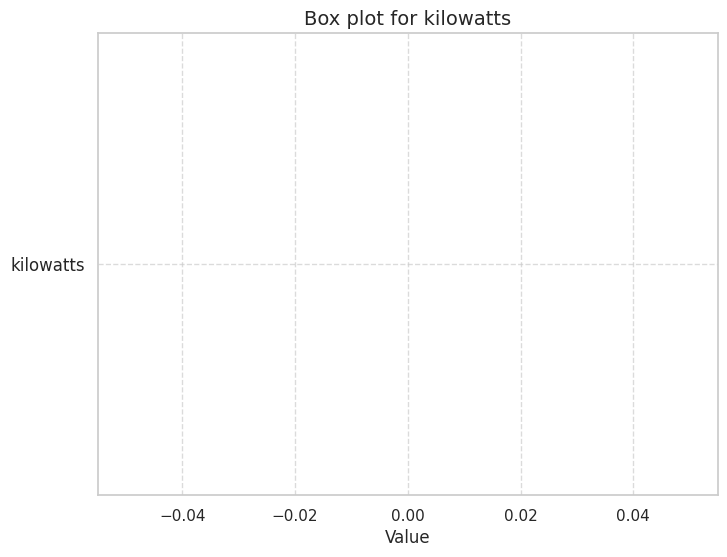

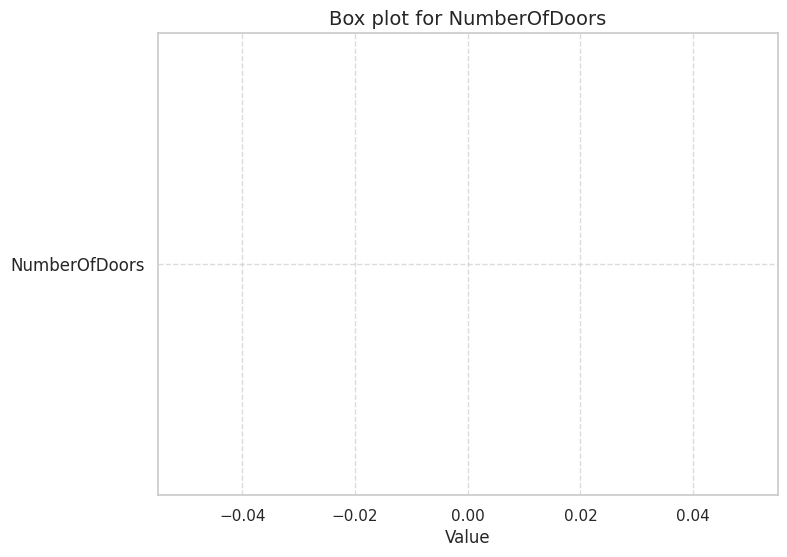

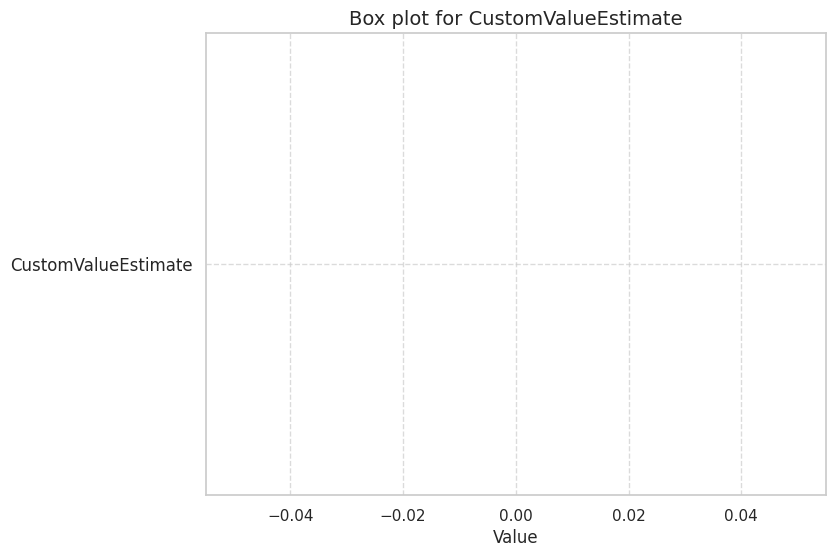

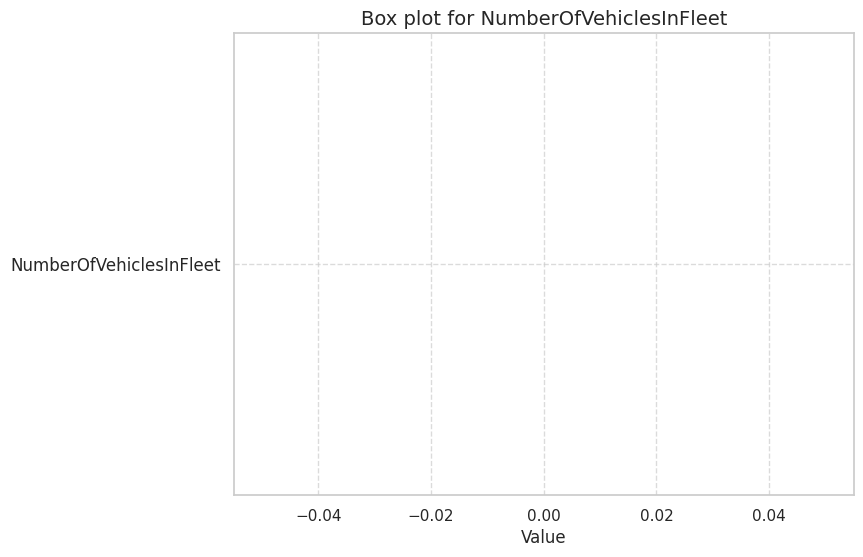

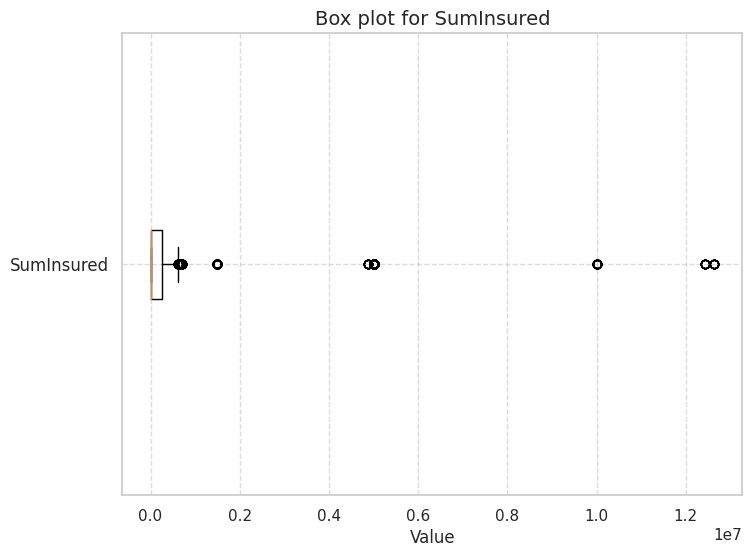

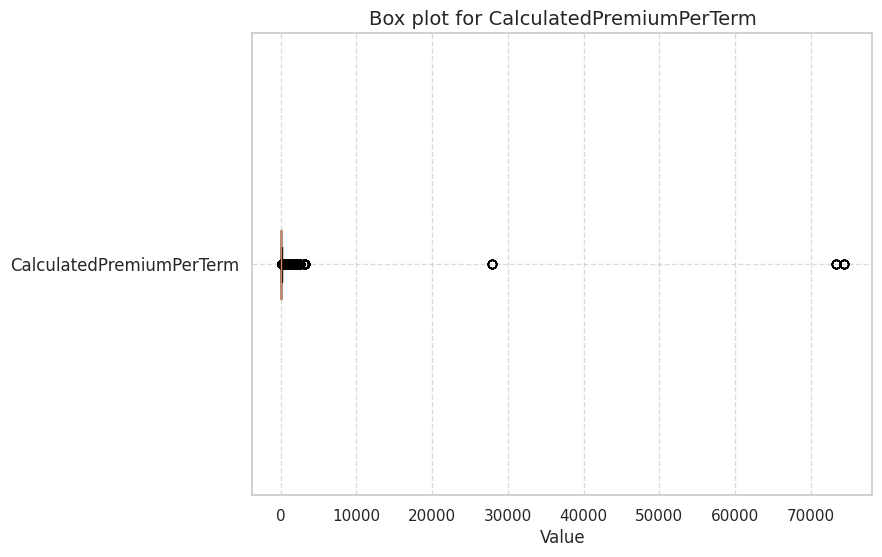

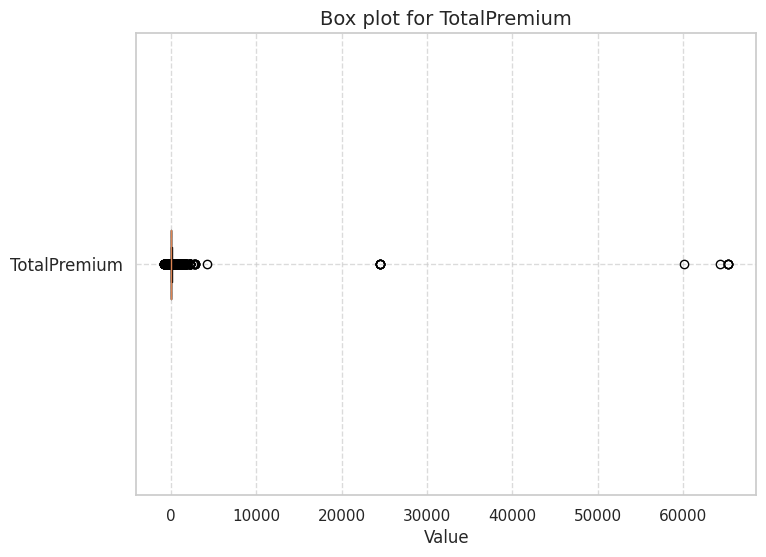

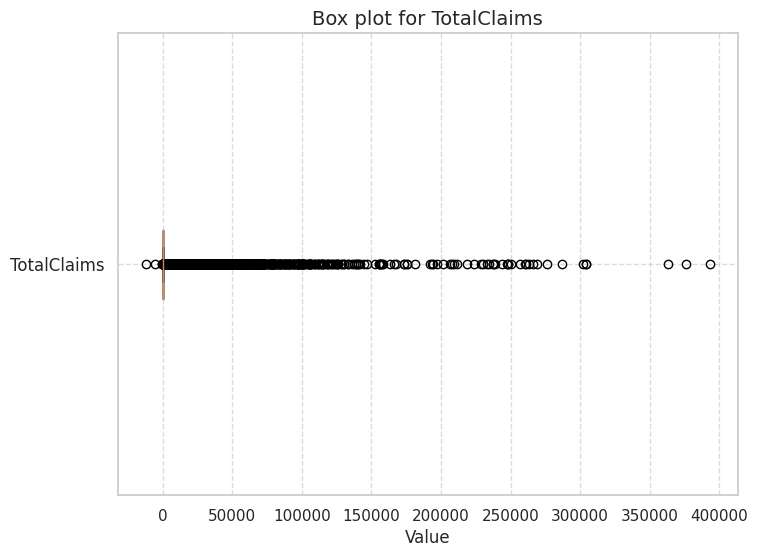

In [104]:
for column in df.select_dtypes(include=['int64', 'float64']):
  fig, ax = plt.subplots(figsize=(8, 6))
  ax.boxplot(df[column], vert=False)
  ax.set_title(f'Box plot for {column}', fontsize=14)
  ax.set_xlabel('Value', fontsize=12)
  ax.set_yticklabels([column], fontsize=12)
  ax.grid(True, linestyle='--', alpha=0.7)
  plt.show()
  outlier_plots.append(column)
  # Check for outliers and store column name if outliers are found
  if has_outliers(df[column]):
    outlier_columns.append(column)

In [106]:
outlier_columns

['UnderwrittenCoverID',
 'PolicyID',
 'PostalCode',
 'mmcode',
 'RegistrationYear',
 'Cylinders',
 'cubiccapacity',
 'kilowatts',
 'NumberOfDoors',
 'CustomValueEstimate',
 'SumInsured',
 'CalculatedPremiumPerTerm',
 'TotalPremium',
 'TotalClaims',
 'UnderwrittenCoverID',
 'PolicyID',
 'PostalCode',
 'mmcode',
 'RegistrationYear',
 'Cylinders',
 'cubiccapacity',
 'kilowatts',
 'NumberOfDoors',
 'CustomValueEstimate',
 'SumInsured',
 'CalculatedPremiumPerTerm',
 'TotalPremium',
 'TotalClaims']

**Outlier Detection Analysis Summary**

Based on the outlier detection analysis using box plots, the following columns in our dataset have been identified as containing outliers:

1. **UnderwrittenCoverID**
2. **PolicyID**
3. **PostalCode**
4. **mmcode**
5. **RegistrationYear**
6. **Cylinders**
7. **cubiccapacity**
8. **kilowatts**
9. **NumberOfDoors**
10. **CustomValueEstimate**
11. **SumInsured**
12. **CalculatedPremiumPerTerm**
13. **TotalPremium**
14. **TotalClaims**

### Interpretation and Possible Actions:

#### 1. Review Data Entry for Errors:
- **UnderwrittenCoverID, PolicyID, PostalCode, mmcode**: These columns might contain unique identifiers or categorical data where outliers could indicate data entry errors or anomalies. It's essential to investigate these columns to ensure the values are correct and consistent.

#### 2. Investigate Unusual Values:
- **RegistrationYear, Cylinders, cubiccapacity, kilowatts, NumberOfDoors**: These numerical columns might represent atypical or extreme values that warrant further investigation. For instance, unusually high or low registration years or engine capacities might need validation to ensure they are accurate and not the result of data entry errors.

#### 3. Financial Impact Analysis:
- **CustomValueEstimate, SumInsured, CalculatedPremiumPerTerm, TotalPremium, TotalClaims**: These columns are financial metrics where outliers could significantly impact business decisions. Analyzing these outliers is crucial to understand if they represent legitimate extreme cases or if they result from errors or potential fraud.

#### 4. Adjustments and Mitigations:
- **Legitimate Outliers**: If outliers are found to be legitimate, consider how they might affect analyses and models. For example, adjustments in risk assessments or premium calculations might be necessary to account for these extreme values.
- **Errors**: If outliers are due to errors, it's important to clean the data by correcting or removing these values to ensure accuracy in subsequent analyses.

#### 5. Risk and Claims Analysis:
- **TotalClaims**: Outliers in this column could indicate unusually high claim amounts, which might need further investigation for potential fraud or anomalies in the claims process.
- **CalculatedPremiumPerTerm and TotalPremium**: Outliers in these columns could affect our pricing strategy. Understanding why certain policies have extreme values will help in refining our pricing models to ensure they are accurate and fair.

### Conclusion:
Identifying and addressing outliers is crucial for maintaining data integrity and ensuring accurate analysis. By investigating and understanding the reasons behind these outliers, we can improve data quality, refine our models, and make more informed business decisions.

## Visualization

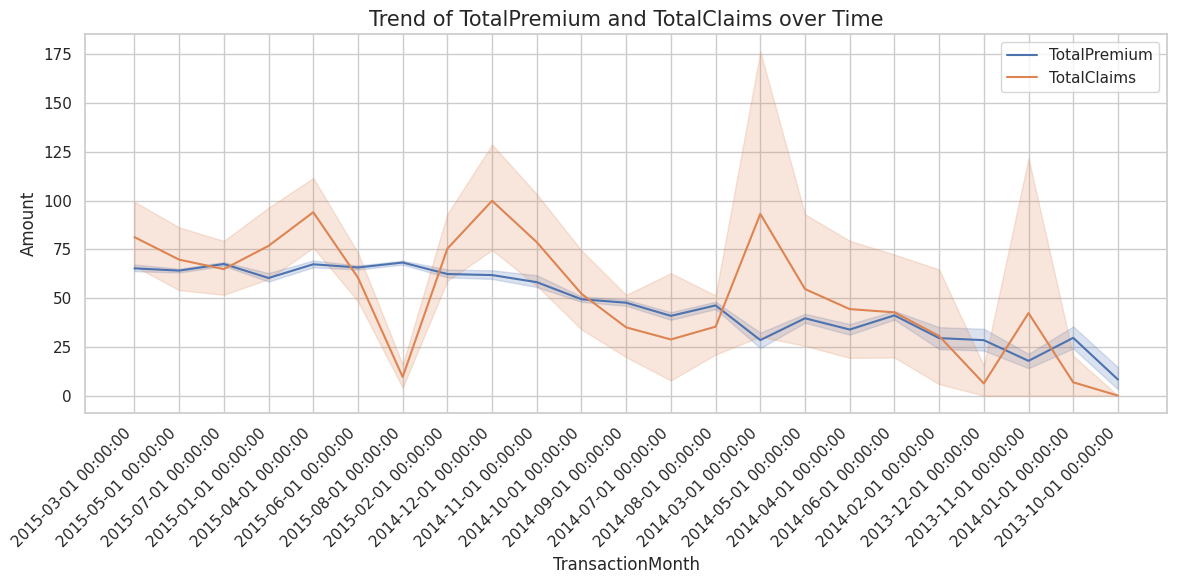

In [107]:
# Trend of TotalPremium and TotalClaims over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionMonth', y='TotalPremium', data=df, label='TotalPremium')
sns.lineplot(x='TransactionMonth', y='TotalClaims', data=df, label='TotalClaims')
plt.title('Trend of TotalPremium and TotalClaims over Time', fontsize=15)
plt.xlabel('TransactionMonth', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# plt.savefig('TotalPremium_TotalClaims_Trend.png')
# plt.close()

Text(0, 0.5, 'TotalClaims')

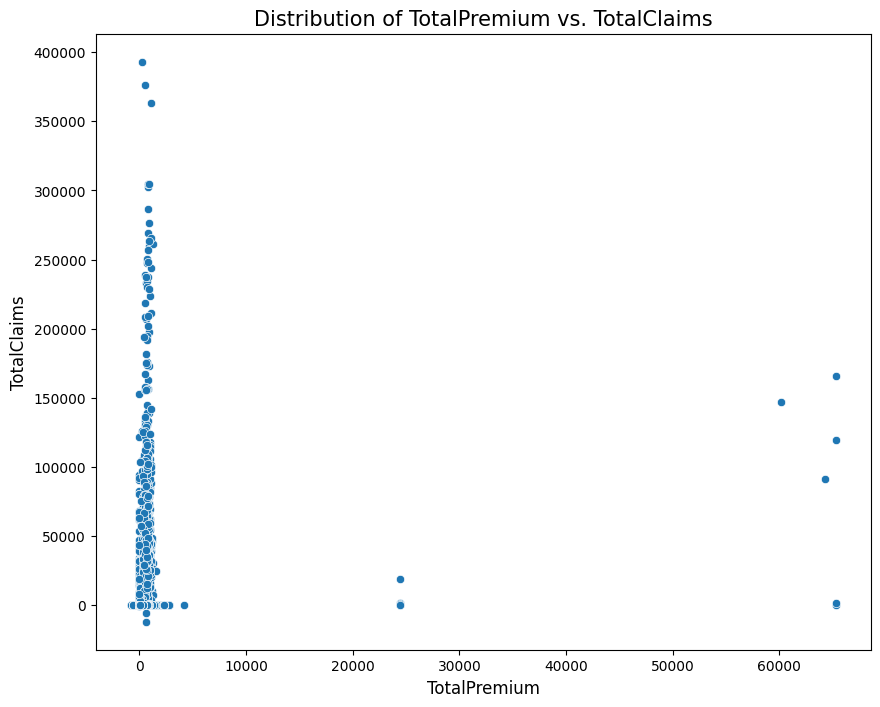

In [ ]:
# Distribution of TotalPremium vs. TotalClaims
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=df)
plt.title('Distribution of TotalPremium vs. TotalClaims', fontsize=15)
plt.xlabel('TotalPremium', fontsize=12)
plt.ylabel('TotalClaims', fontsize=12)
#plt.savefig('TotalPremium_TotalClaims_Distribution.png')
#plt.close()



Text(0.5, 1.0, 'Correlation Heatmap')

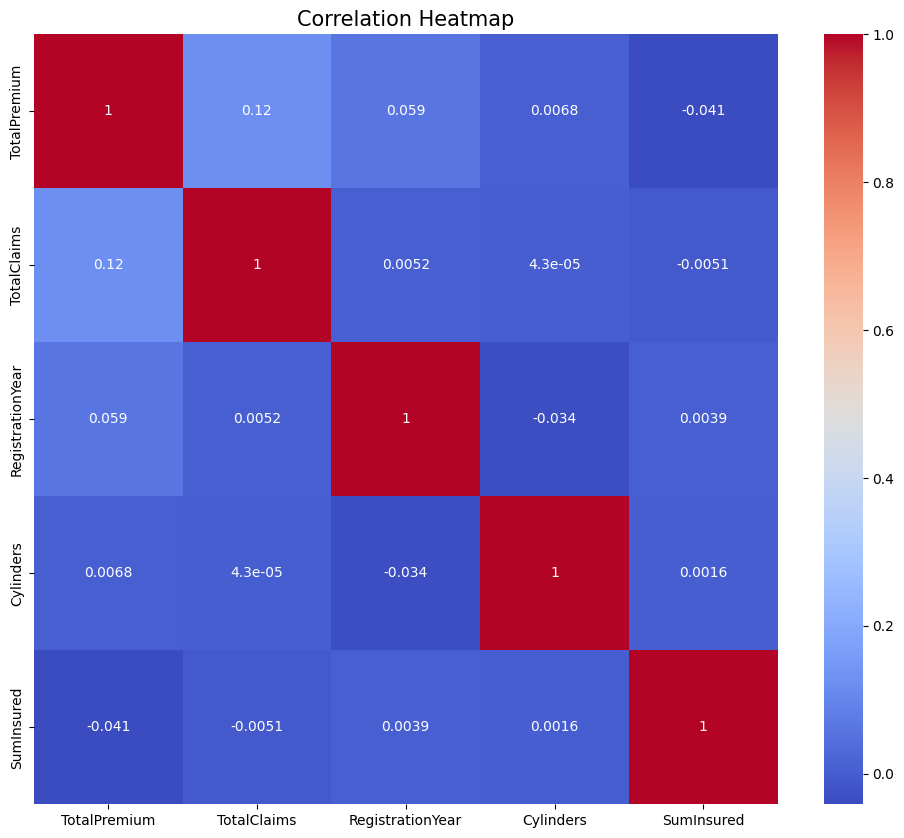

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[['TotalPremium', 'TotalClaims', 'RegistrationYear', 'Cylinders', 'SumInsured']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=15)
#plt.savefig('Correlation_Heatmap.png')
#plt.close()

In [ ]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')